In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows',10000)
pd.set_option('display.min_rows',2000)
pd.set_option('display.column_space',30)
pd.set_option('display.max_colwidth',150)
pd.set_option('display.expand_frame_repr',True)

_end_dates    = pd.Series(pd.date_range(start="2020-10-08", end="2021-03-31", freq="D", tz='America/New_York'))
_start_dates  = _end_dates - pd.Timedelta(days=7)
_center_dates = _end_dates - pd.Timedelta(days=3.5)
end_dates     = _end_dates.apply(lambda x: x.timestamp())
center_dates  = _center_dates.apply(lambda x: x.timestamp())
start_dates   = _start_dates.apply(lambda x: x.timestamp())
_end_dates    = _end_dates.apply(lambda x:str(x).split(' ')[0])
_center_dates = _center_dates.apply(lambda x:str(x).split(' ')[0])
_start_dates  = _start_dates.apply(lambda x:str(x).split(' ')[0])

id_l = '/home/casonk/path/mmani_root/mmani0/shared_data/hot/push_file/IDL/'

j=1
k=21
r=1

In [2]:
def plotter(r,n):
    conspiracy_tl = []
    conspiracy_ei = []
    conspiracy_dt = []
    for date in _center_dates:
        ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
        # top_50 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(50)
        top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
        comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
        # top_ns_50 = comm_sub_pairs.loc[top_50.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
        top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
        # coms = top_ns_50.index.get_level_values(0)
        coms = top_ns_75.index.get_level_values(0)
        # subs = top_ns_50.index.get_level_values(1)
        subs = top_ns_75.index.get_level_values(1)
        dekka = pd.DataFrame({'com':coms, 'sub':subs})
        insubs = ['conspiracy']
        match = dekka[dekka['sub'].isin(insubs)]
        if len(match['com'].unique()) == 1:
            incom = int(match['com'].unique()[0])
            conspiracy_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
            conspiracy_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
            conspiracy_dt += [date]
    conservative_tl = []
    conservative_ei = []
    conservative_dt = []
    
    for date in _center_dates:
        ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
        # top_50 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(50)
        top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
        comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
        # top_ns_50 = comm_sub_pairs.loc[top_50.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
        top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
        # coms = top_ns_50.index.get_level_values(0)
        coms = top_ns_75.index.get_level_values(0)
        # subs = top_ns_50.index.get_level_values(1)
        subs = top_ns_75.index.get_level_values(1)
        dekka = pd.DataFrame({'com':coms, 'sub':subs})
        insubs = ['conservative']
        match = dekka[dekka['sub'].isin(insubs)]
        if len(match['com'].unique()) == 1:
            incom = int(match['com'].unique()[0])
            conservative_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
            conservative_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
            conservative_dt += [date]

    fig = plt.figure(figsize=(35,10))
    plt.scatter(y=[0 for _ in _center_dates], x=_center_dates, s=0, alpha=0, c='w')
    plt.scatter(y=conspiracy_ei, x=conspiracy_dt, s=[s/1000 for s in conspiracy_tl], alpha=0.25, c='black', label='conspiracy')
    plt.scatter(y=conservative_ei, x=conservative_dt, s=[s/1000 for s in conservative_tl], alpha=0.25, c='r', label='conservative')
    plt.xticks(rotation=90)
    plt.plot(['2021-01-06','2021-01-06'], [-1,0], alpha=0.25, c='black', ls='--')
    plt.ylabel('EI - Index')
    plt.xlabel('Date')
    plt.legend()

In [3]:
def agg_plotter(r,n):
    tl = []
    ei = []
    dt = []
    for date in _center_dates:
        ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
        top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
        comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
        top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
        coms = top_ns_75.index.get_level_values(0)
        subs = top_ns_75.index.get_level_values(1)
        dekka = pd.DataFrame({'com':coms, 'sub':subs})

        t1 = 0
        e1 = 0

        insubs = ['conspiracy']
        match = dekka[dekka['sub'].isin(insubs)]
        if len(match['com'].unique()) == 1:
            incom = int(match['com'].unique()[0])
            t1 += ei_df.loc[incom, ['Total_Links','EI_Index']][0]
            e1 += ei_df.loc[incom, ['Total_Links','EI_Index']][1]
        insubs = ['conservative']

        t2 = 0
        e2 = 0

        match = dekka[dekka['sub'].isin(insubs)]
        if len(match['com'].unique()) == 1:
            incom = int(match['com'].unique()[0])
            t2 += ei_df.loc[incom, ['Total_Links','EI_Index']][0]
            e2 += ei_df.loc[incom, ['Total_Links','EI_Index']][1]


        tl += [(t1 + t2) / 2]
        ei += [(e1 + e2) / 2]
        dt += [date]

    

    fig = plt.figure(figsize=(35,10))

    plt.scatter(y=[0 for _ in _center_dates], x=_center_dates, s=0, alpha=0, c='w')
    plt.scatter(y=ei, x=dt, s=[s/1000 for s in tl], alpha=0.25, c='black')
    plt.xticks(rotation=90)
    plt.plot(['2021-01-06','2021-01-06'], [-1,0], alpha=0.25, c='black', ls='--')
    plt.ylabel('EI - Index')
    plt.xlabel('Date')
    plt.legend()

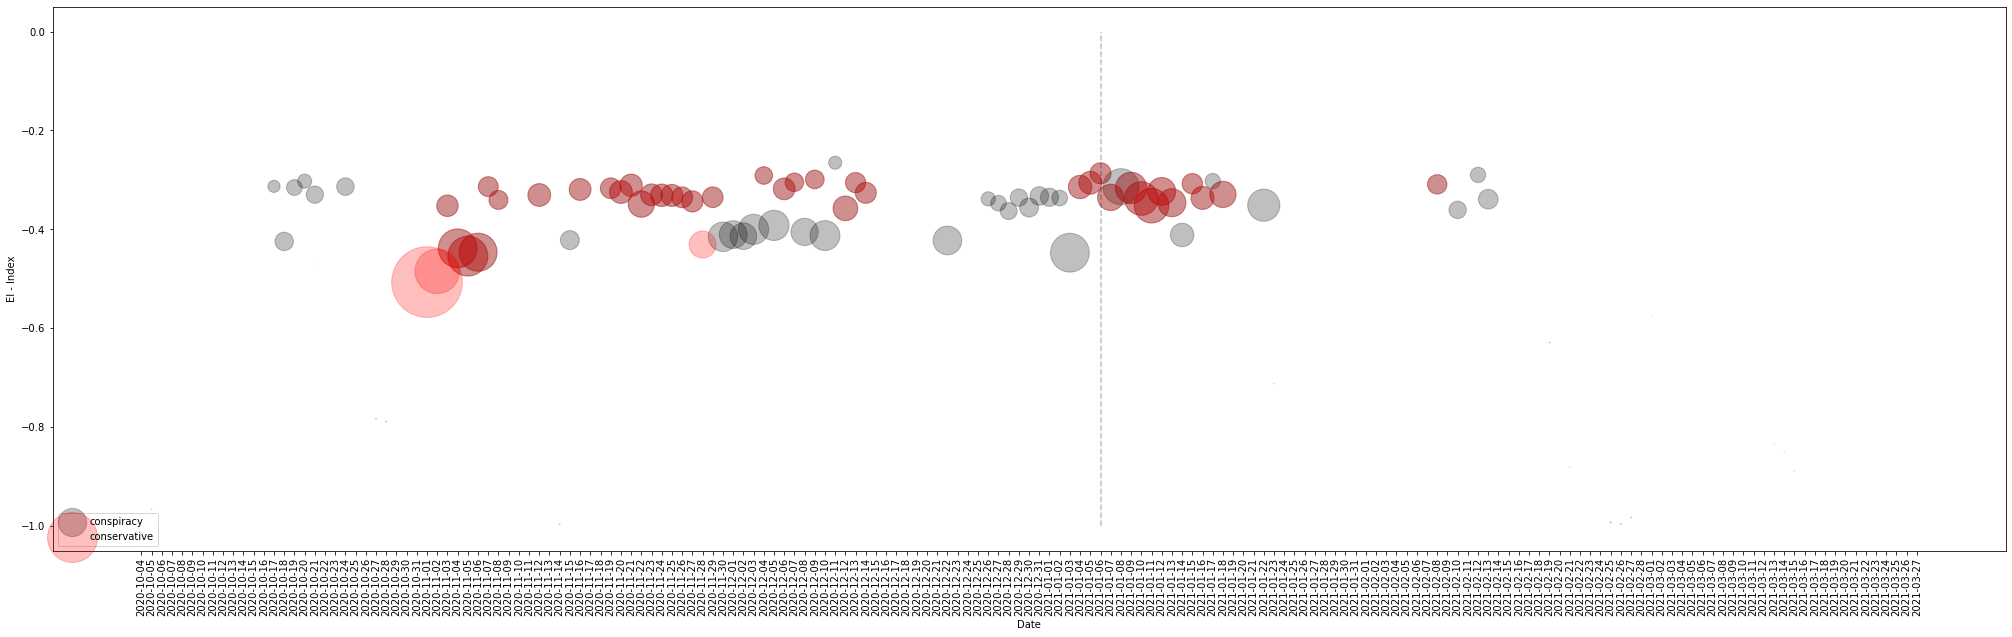

In [63]:
plotter(0.5,2)

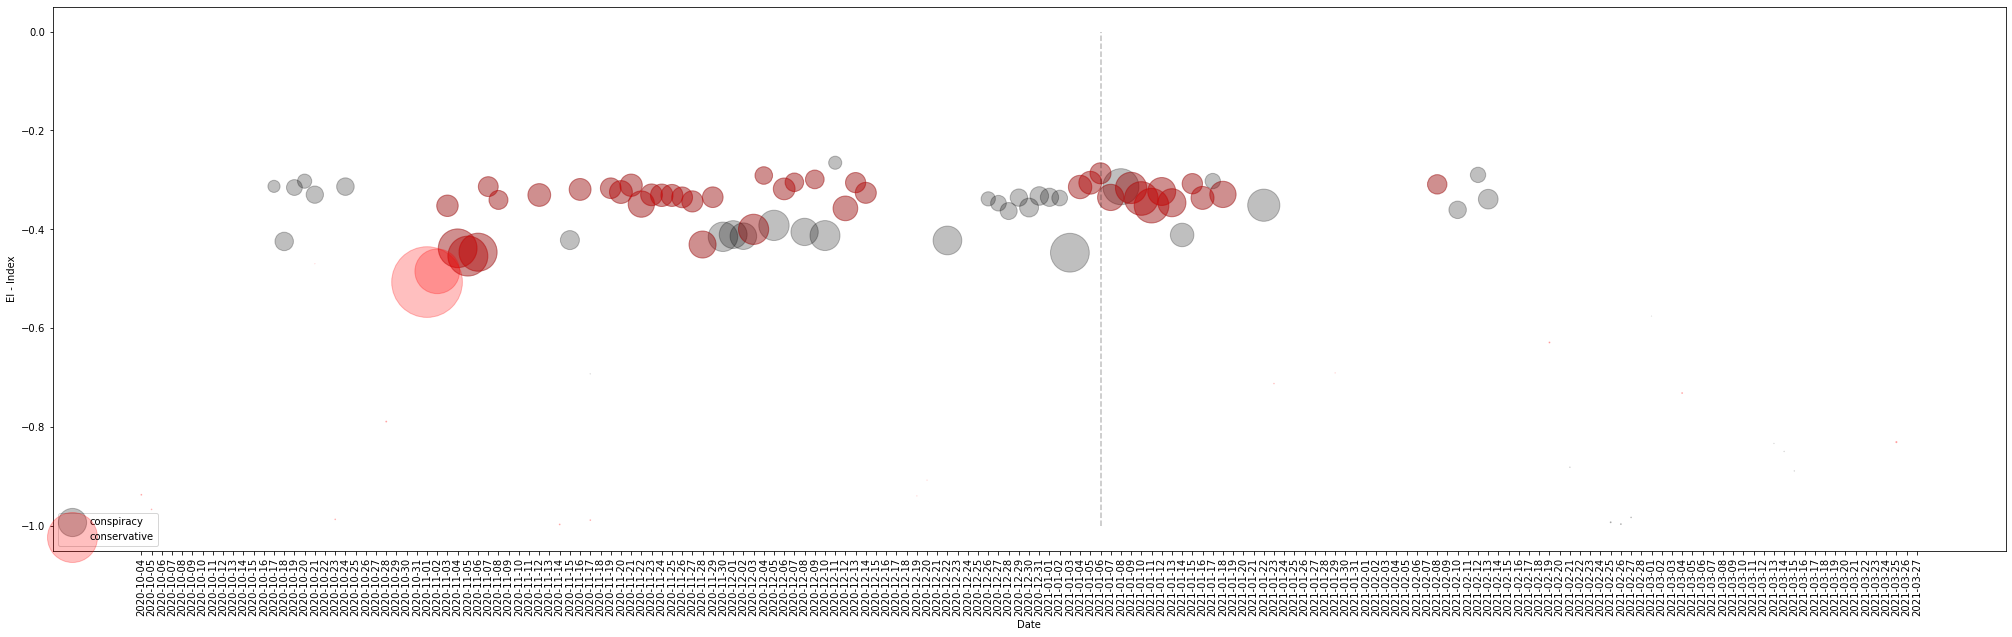

In [4]:
plotter(0.5,3)

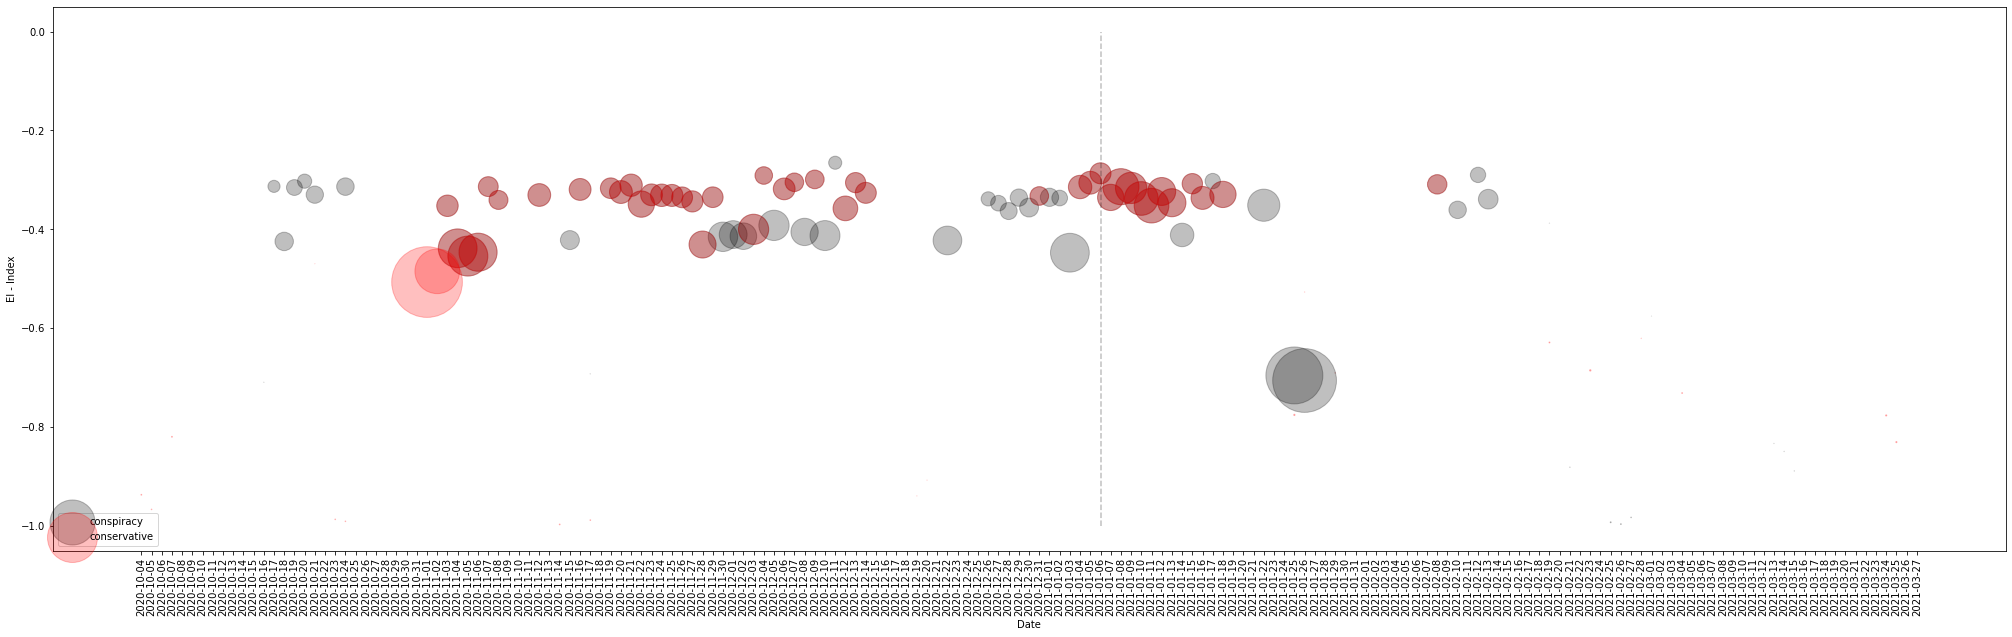

In [5]:
plotter(0.5,4)

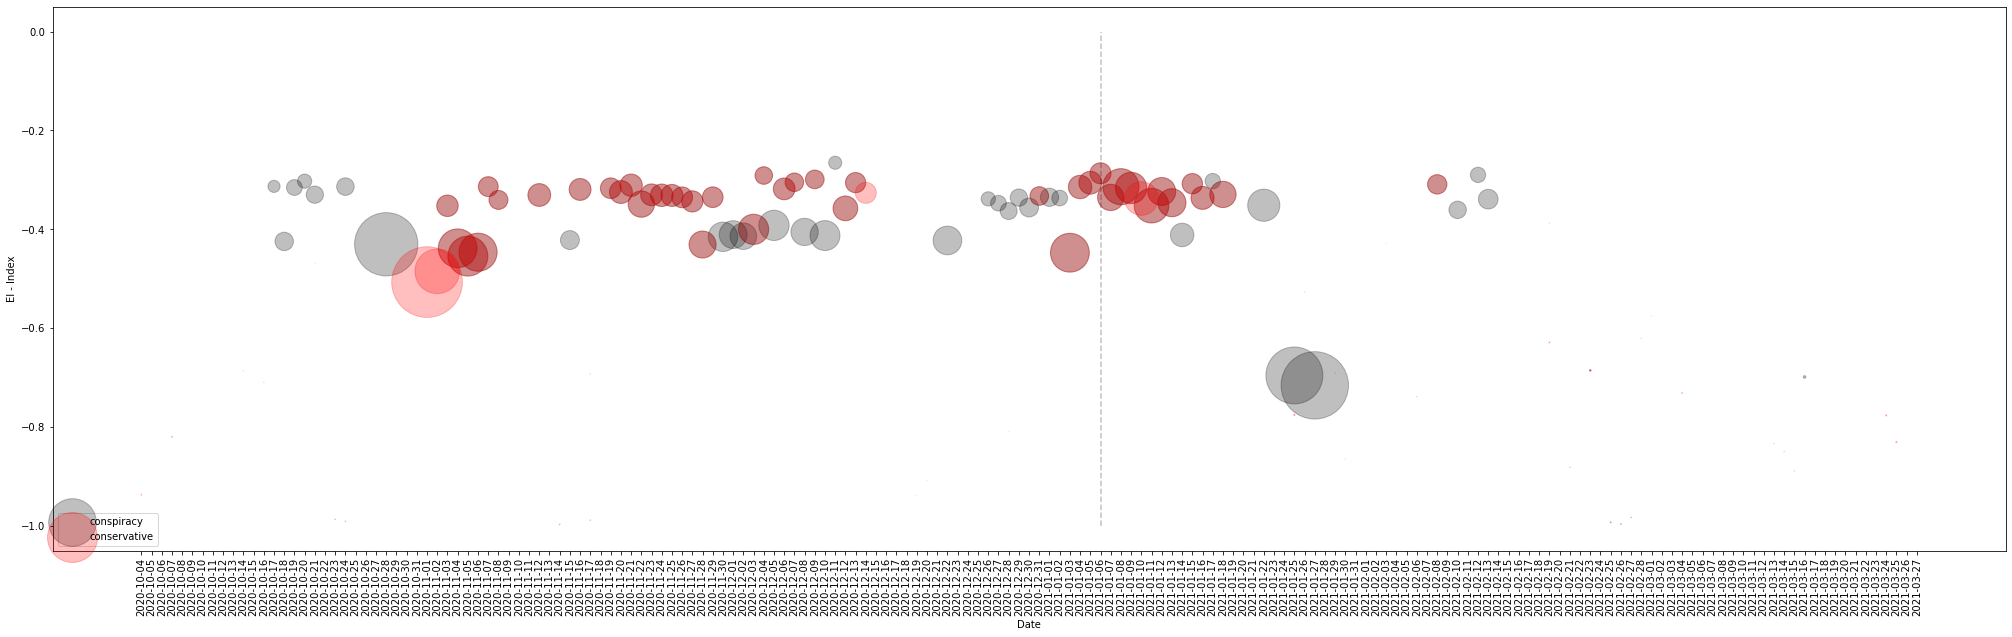

In [6]:
plotter(0.5,5)

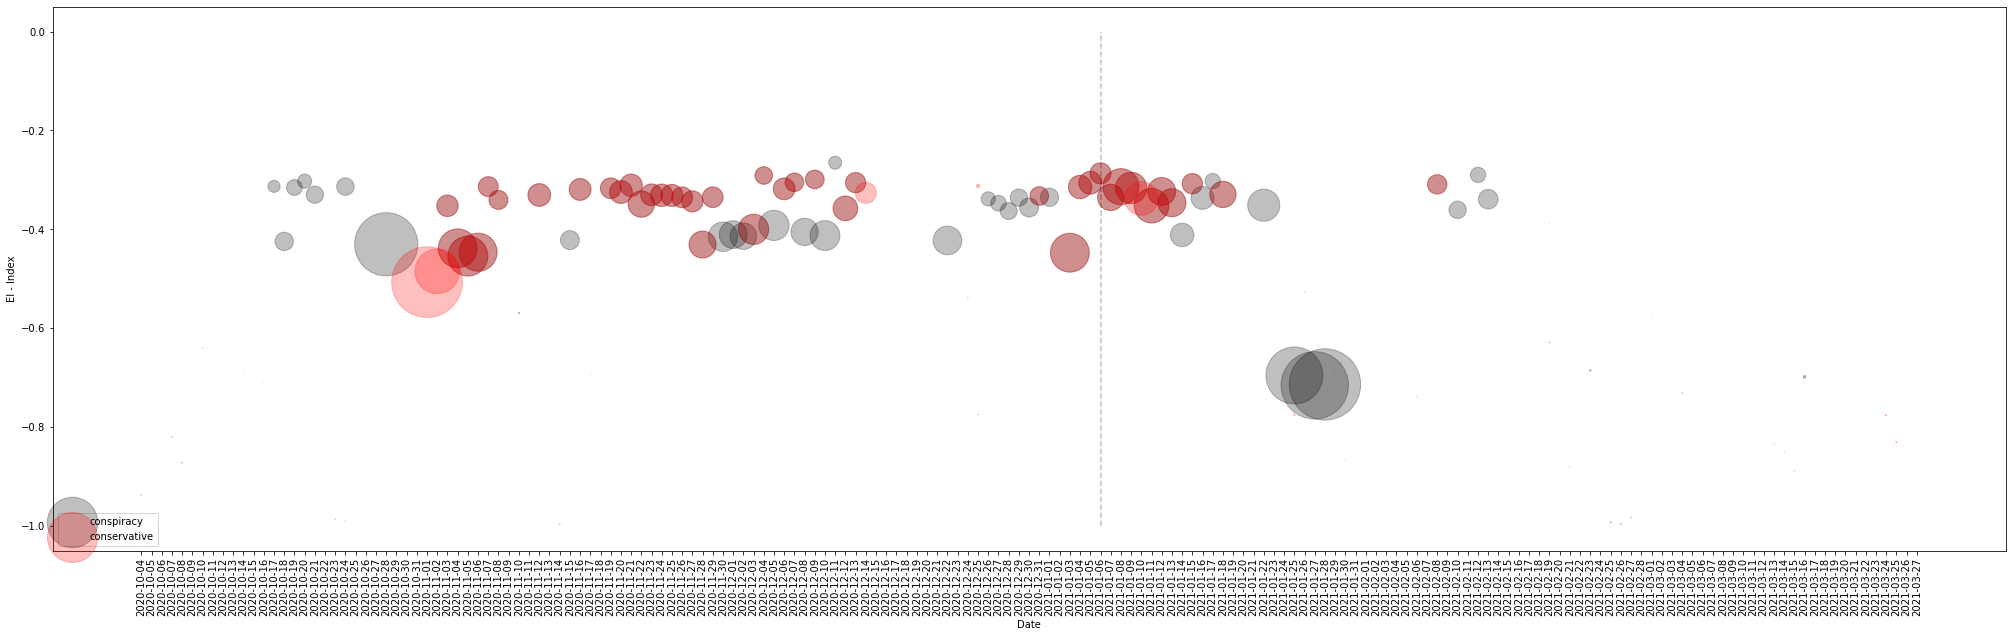

In [7]:
plotter(0.5,6)

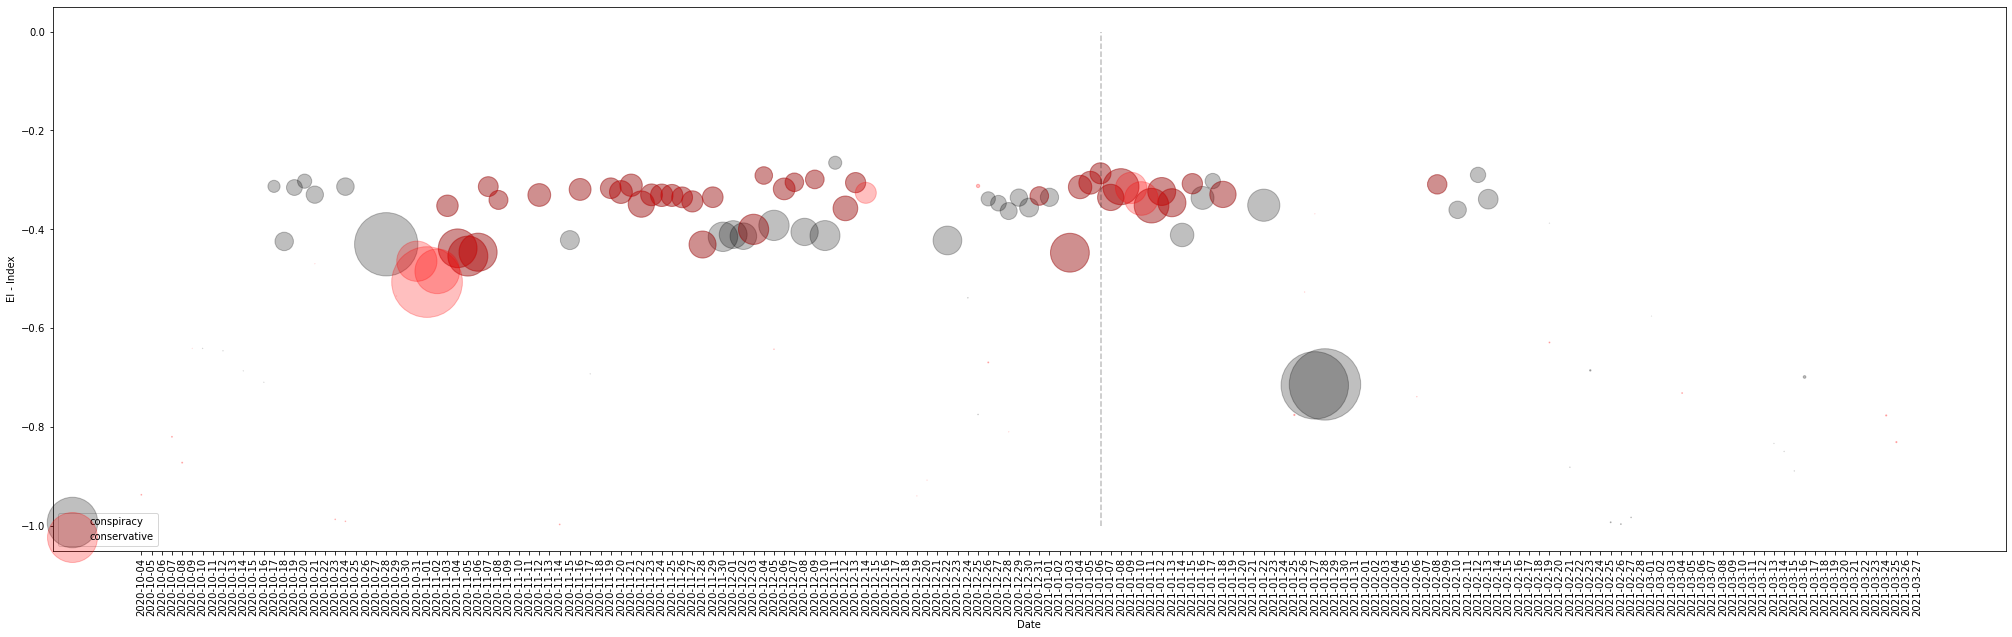

In [8]:
plotter(0.5,7)

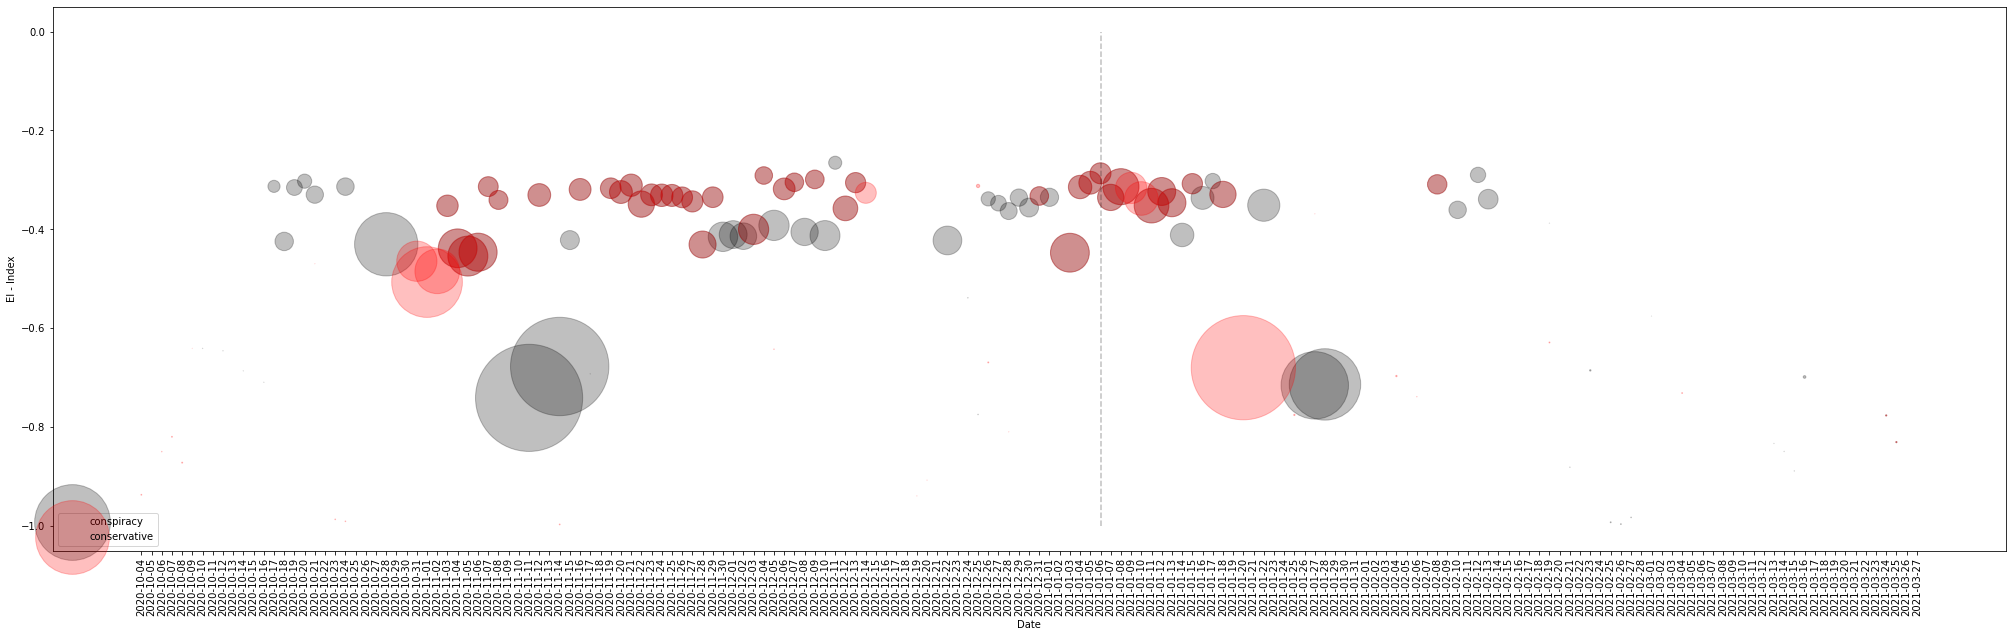

In [54]:
plotter(0.5,8)

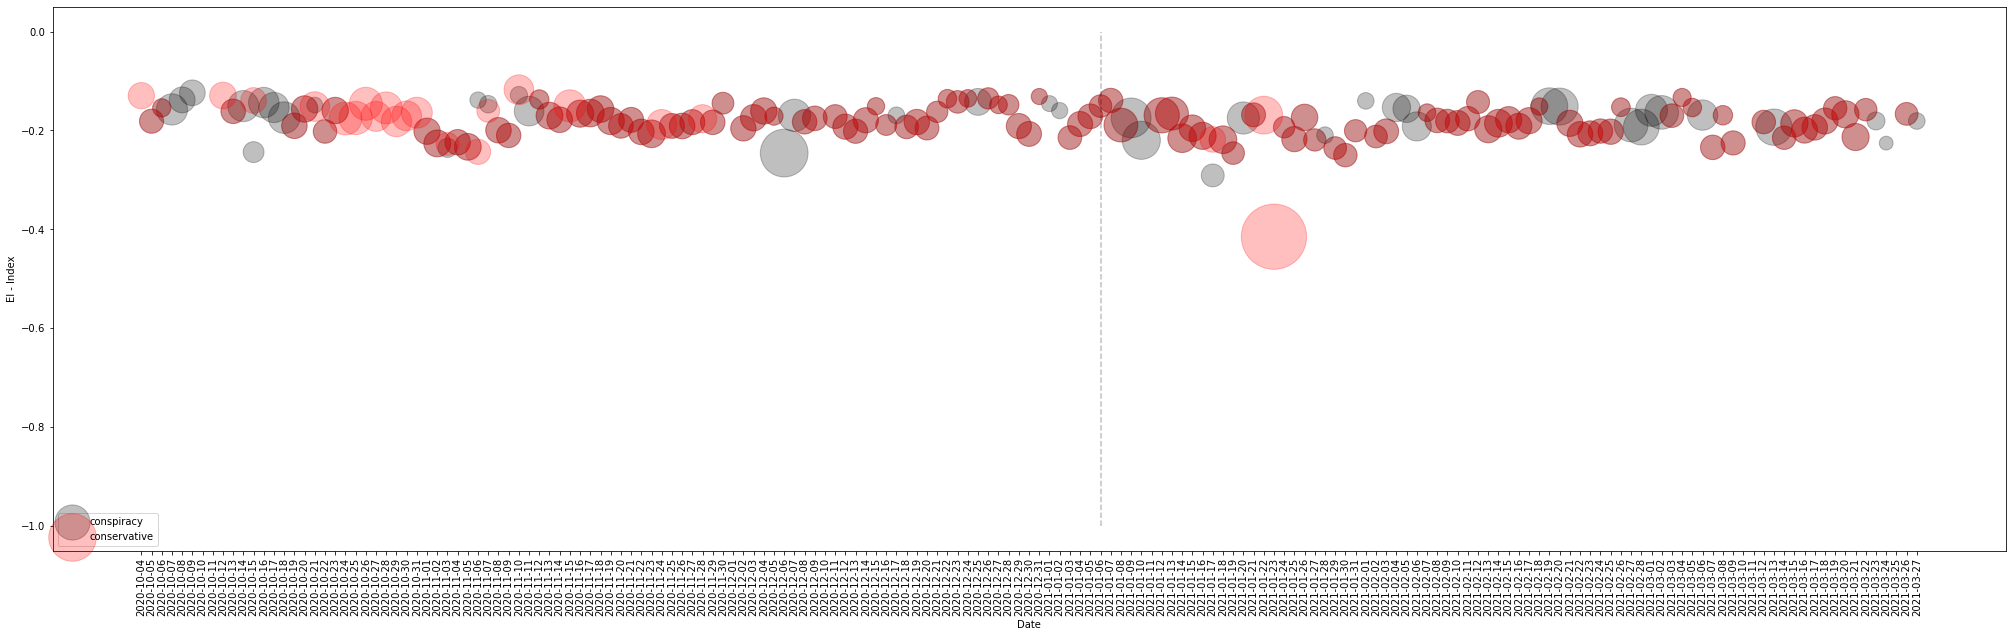

In [62]:
plotter(1,2)

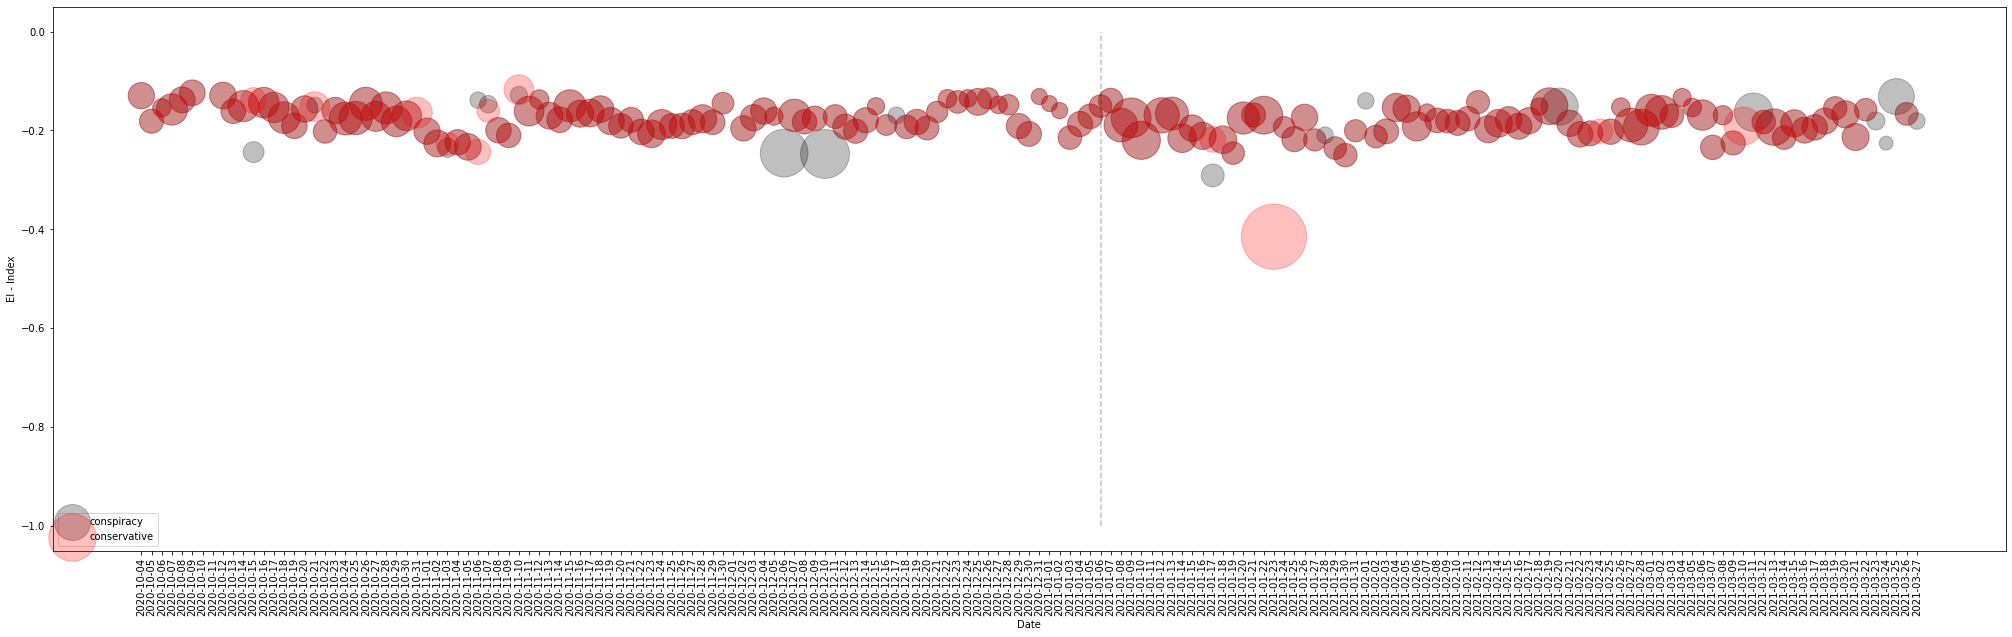

In [9]:
plotter(1,3)

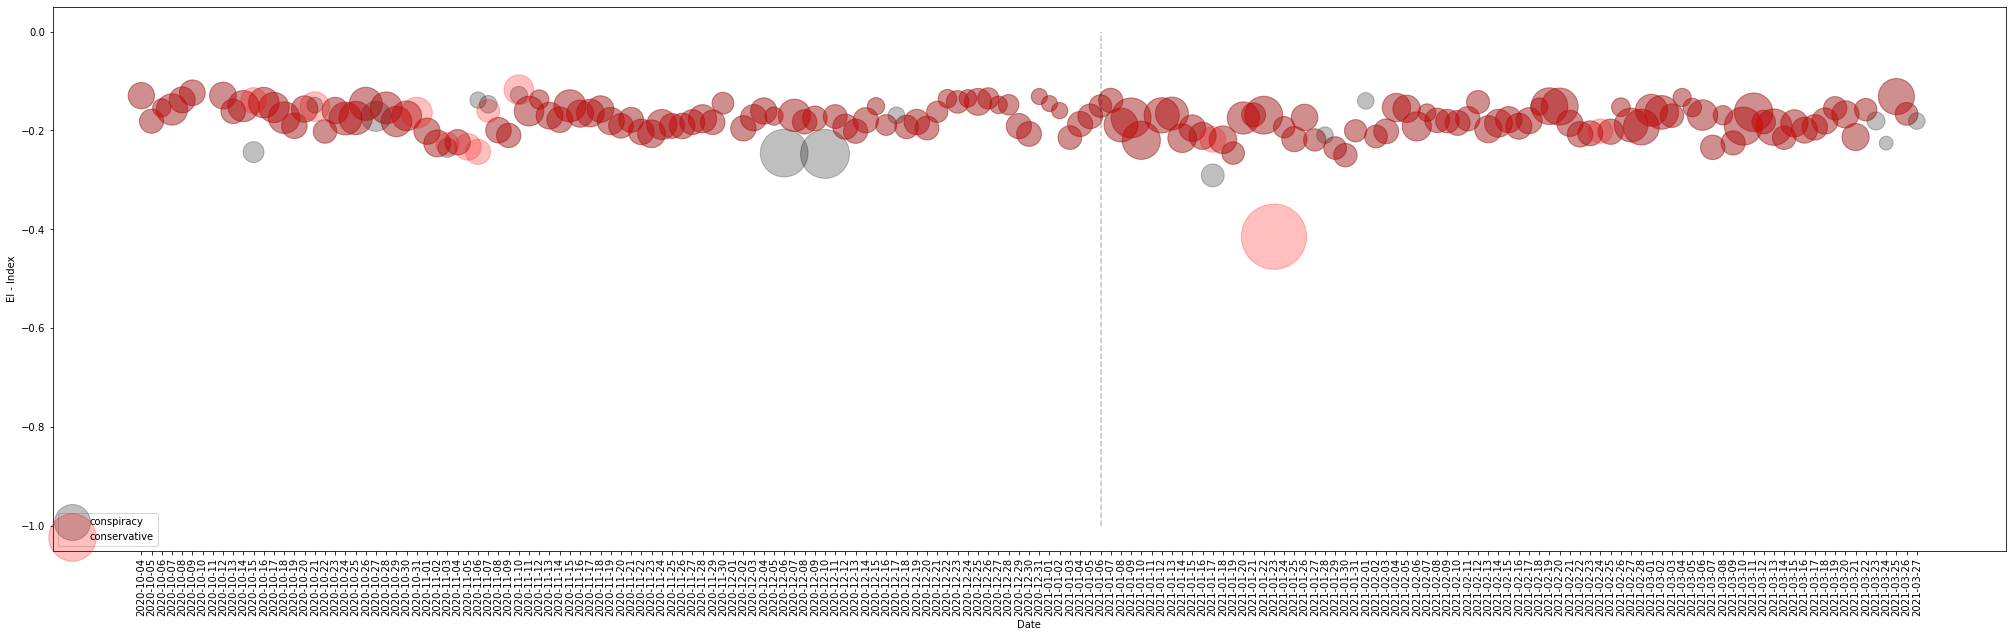

In [10]:
plotter(1,4)

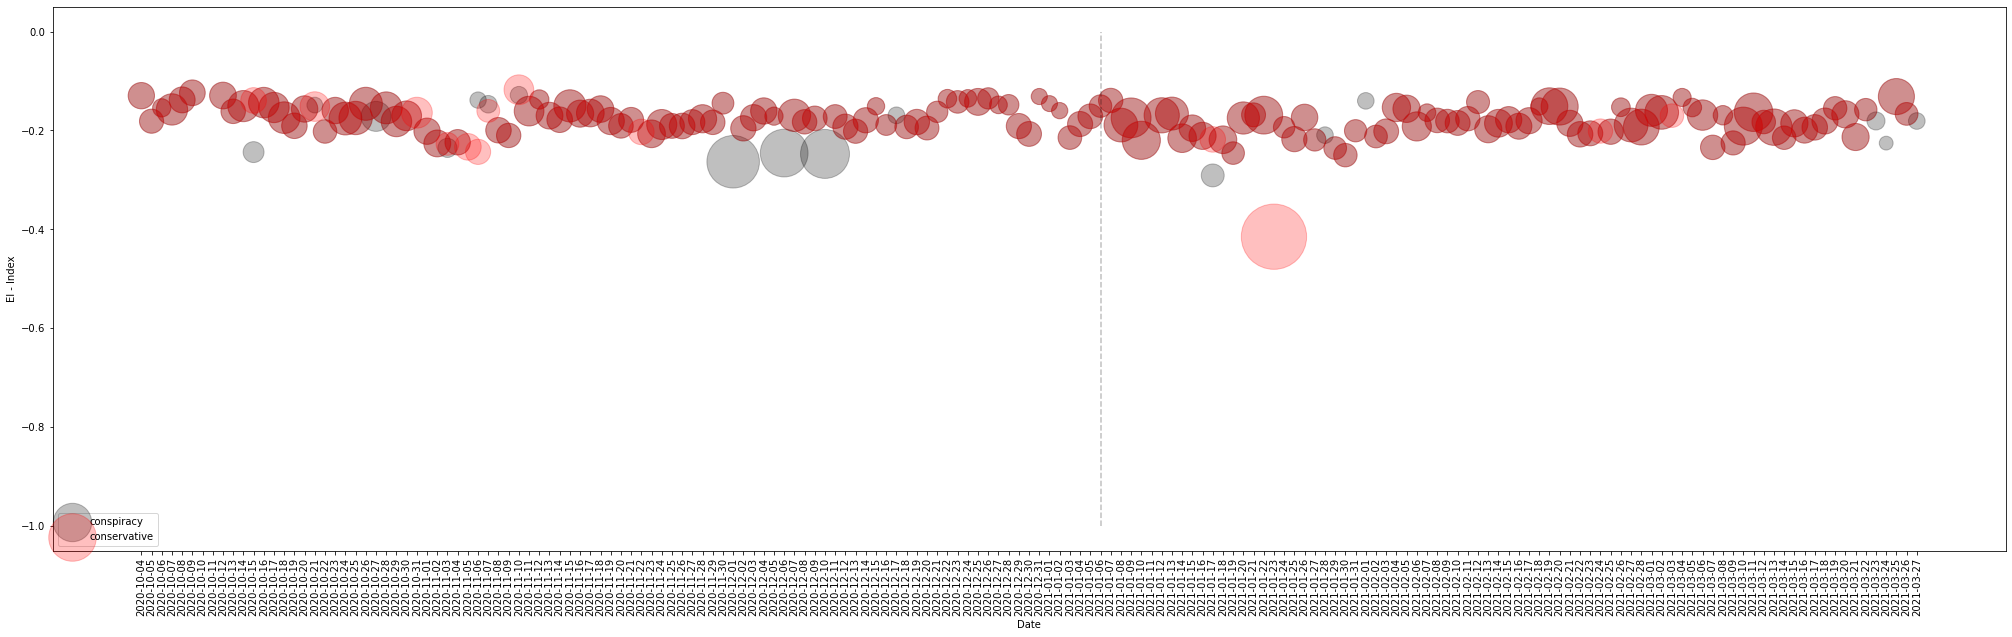

In [11]:
plotter(1,5)

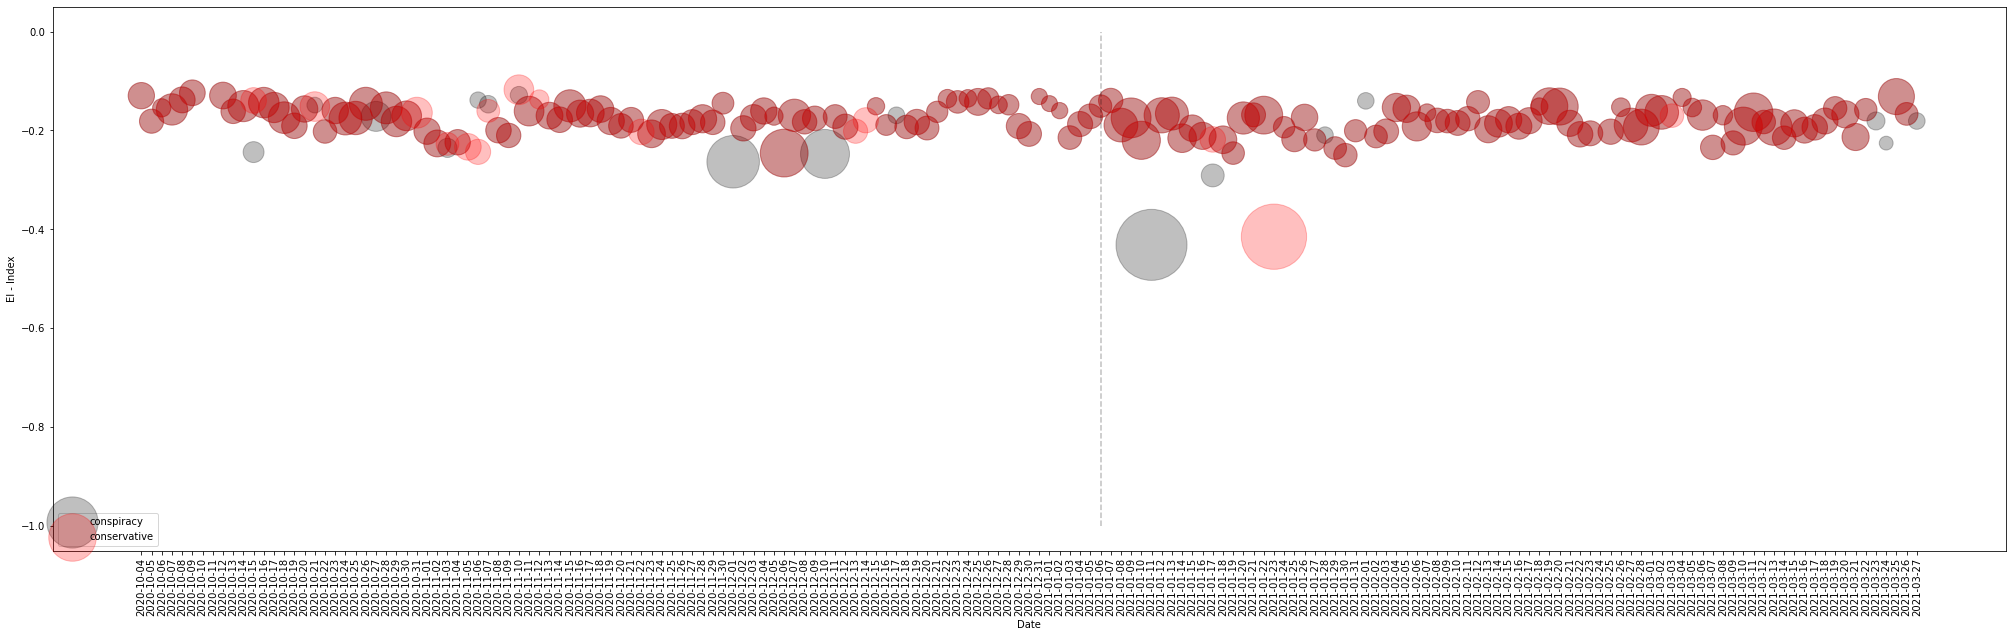

In [12]:
plotter(1,6)

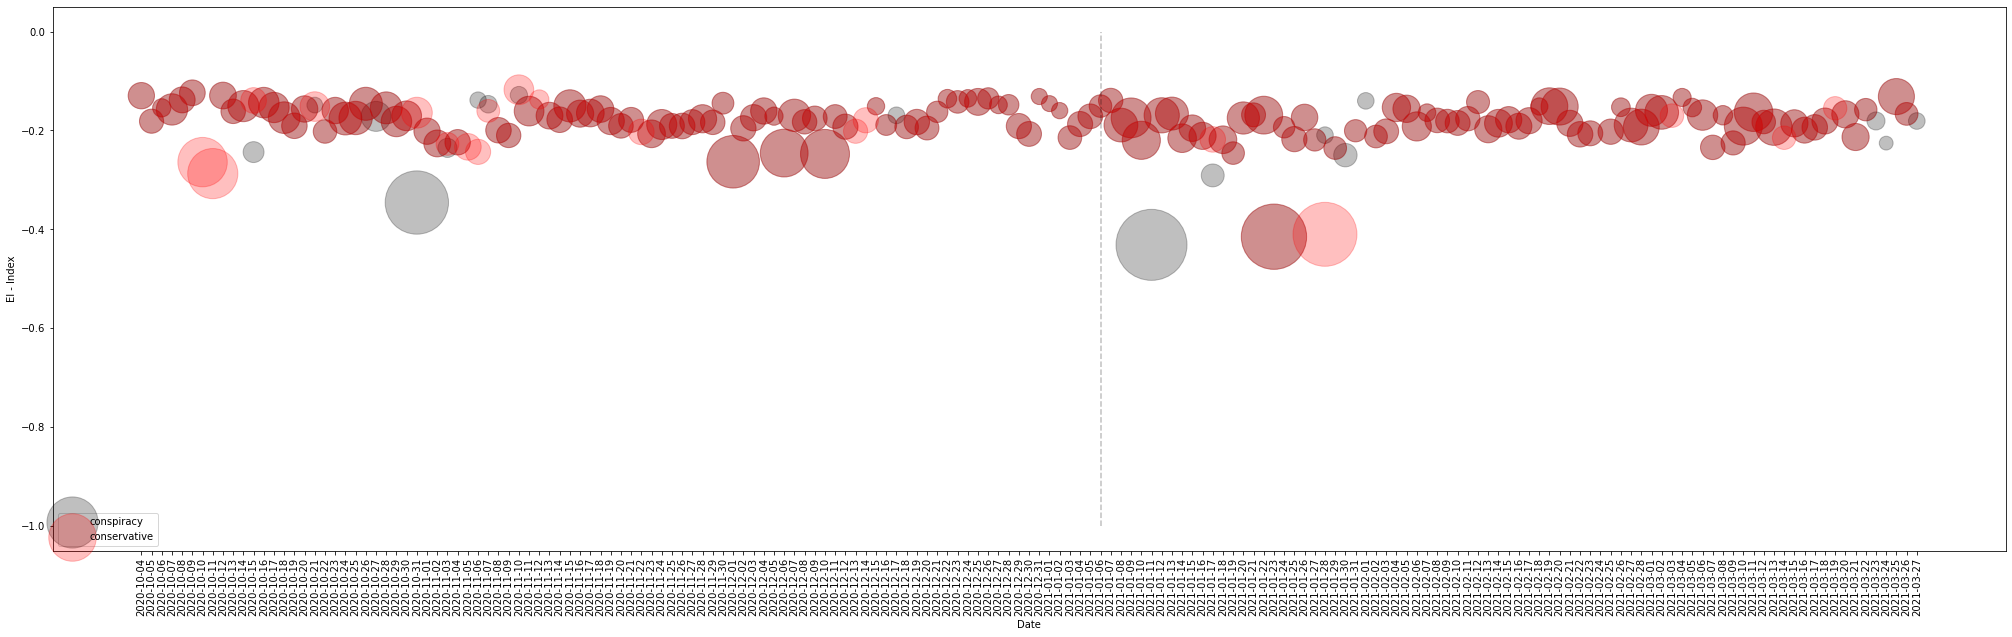

In [13]:
plotter(1,7)

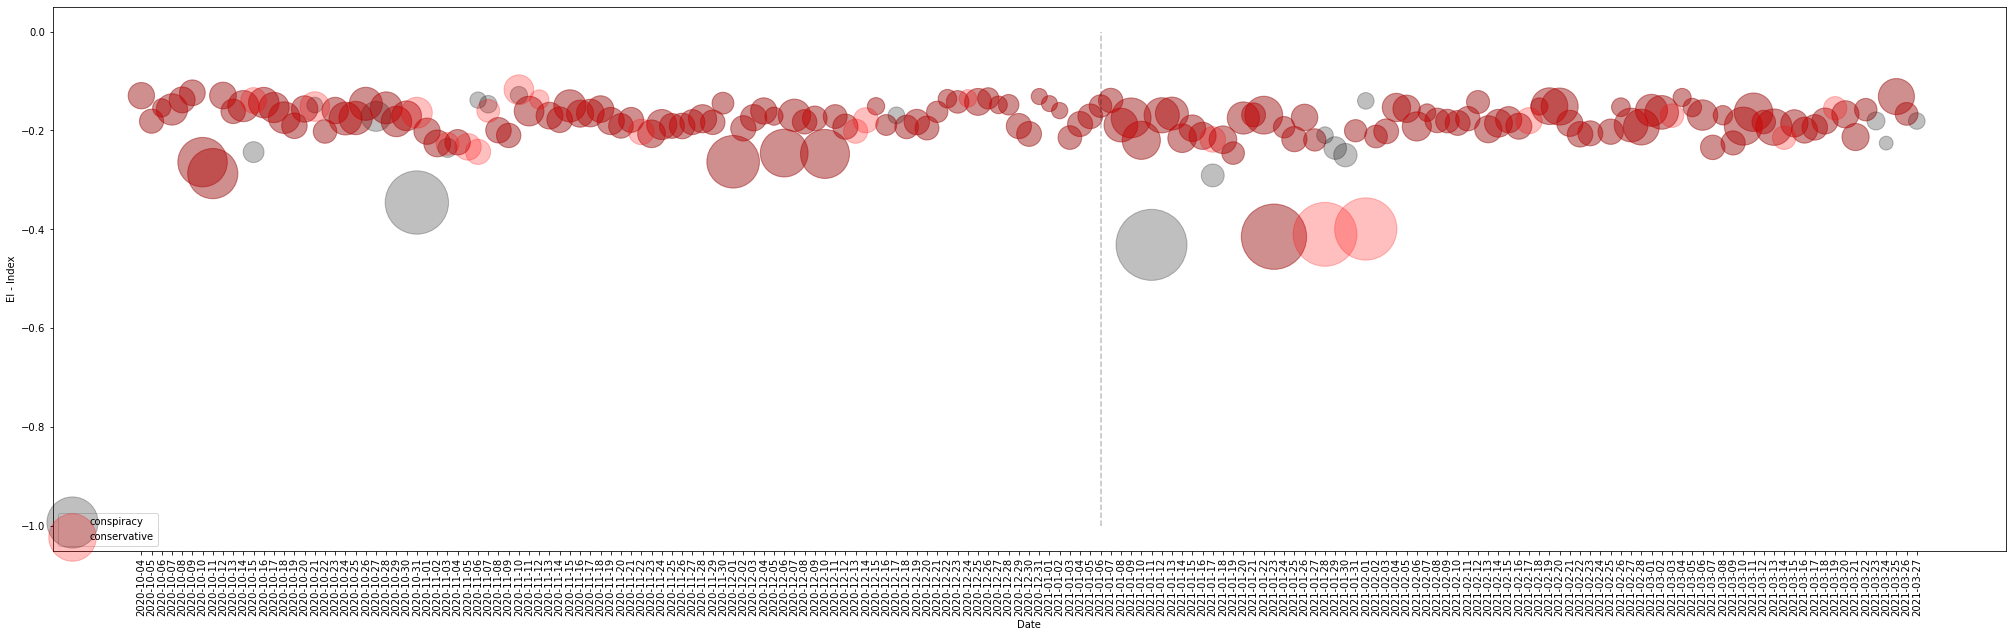

In [55]:
plotter(1,8)

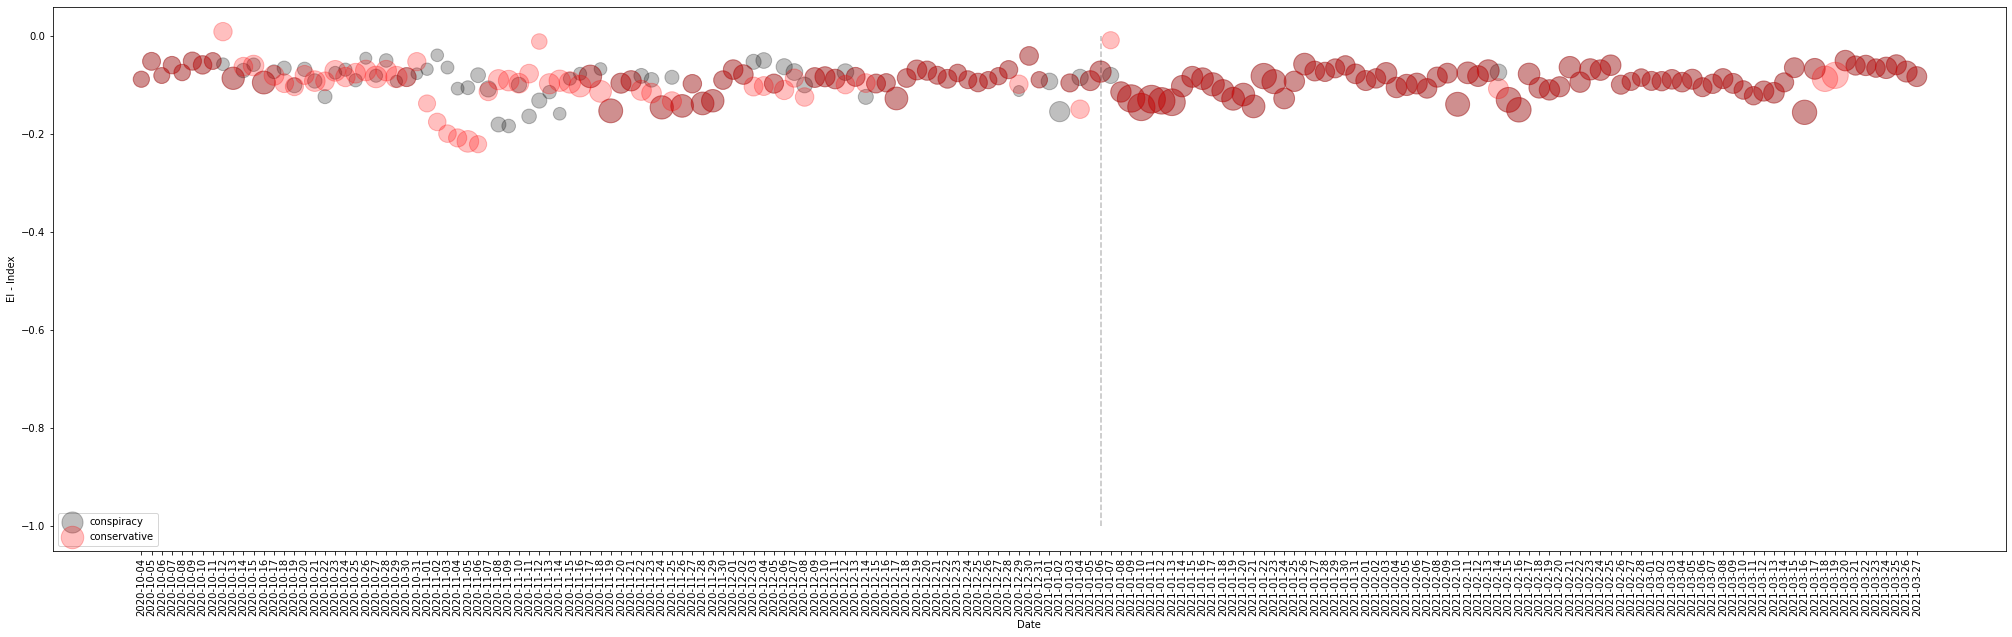

In [61]:
plotter(2,2)

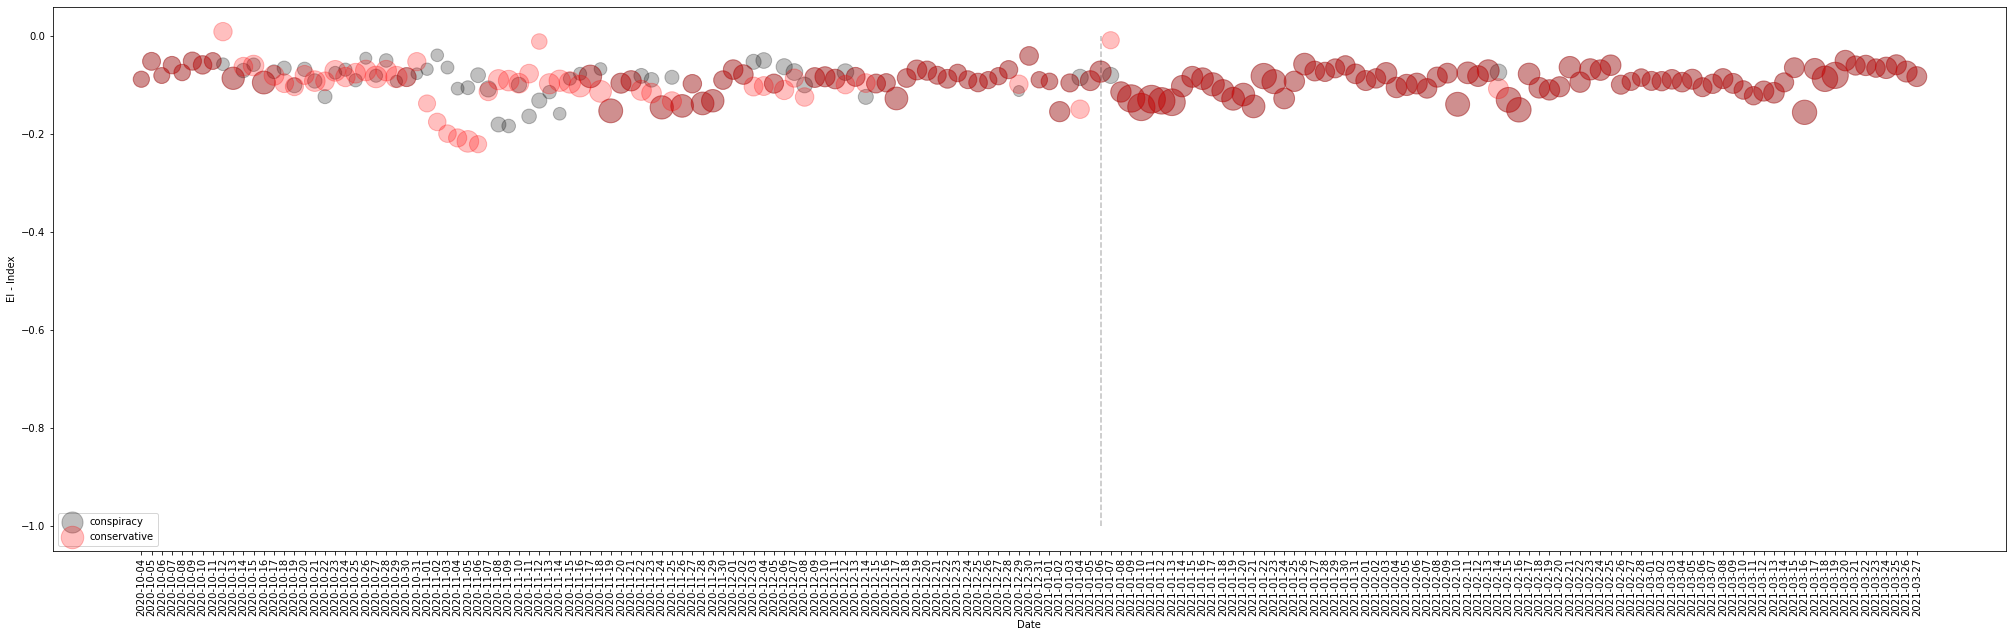

In [14]:
plotter(2,3)

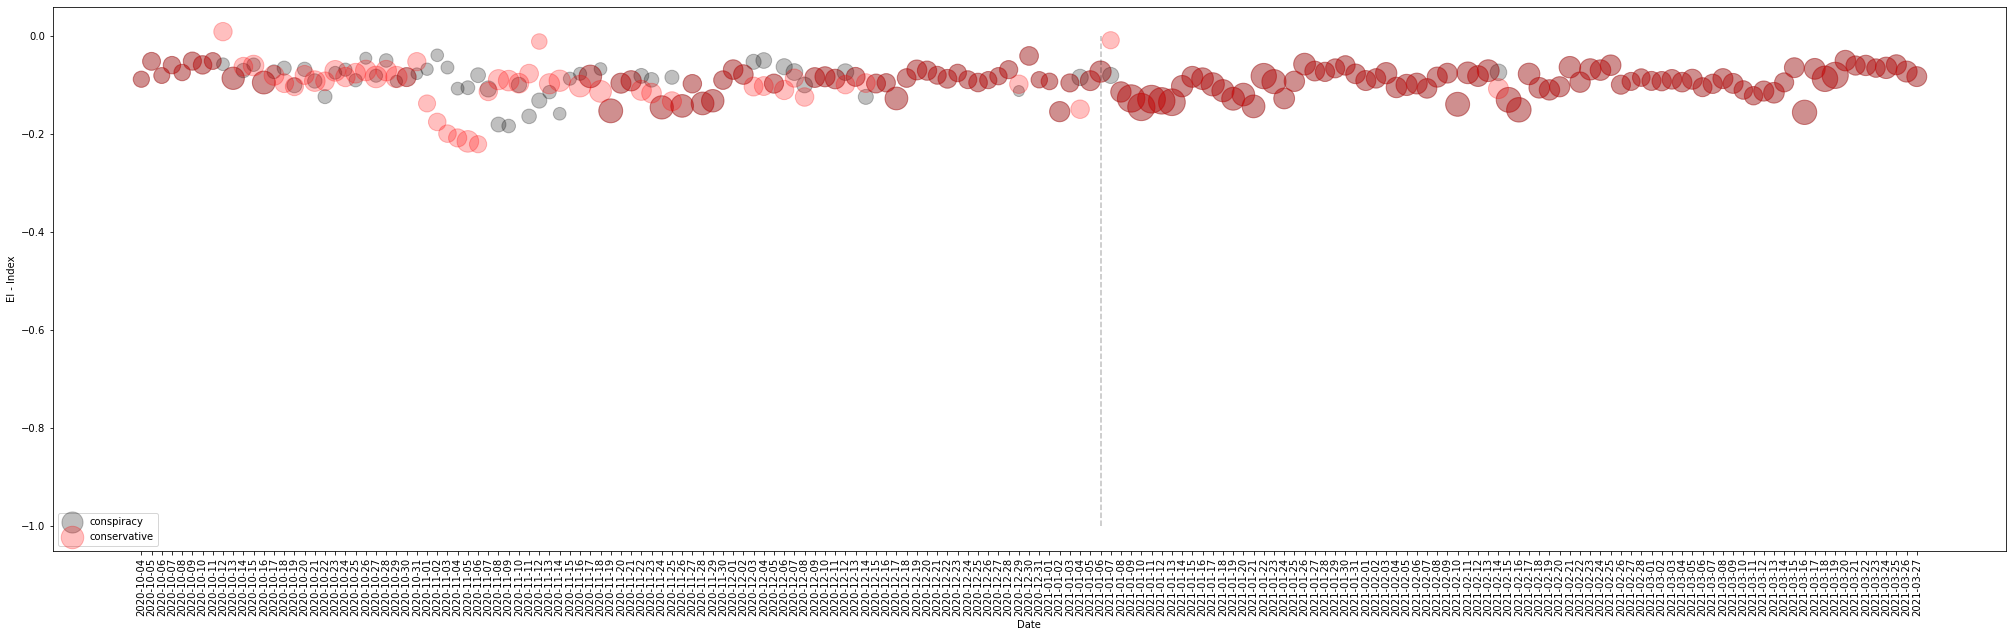

In [15]:
plotter(2,4)

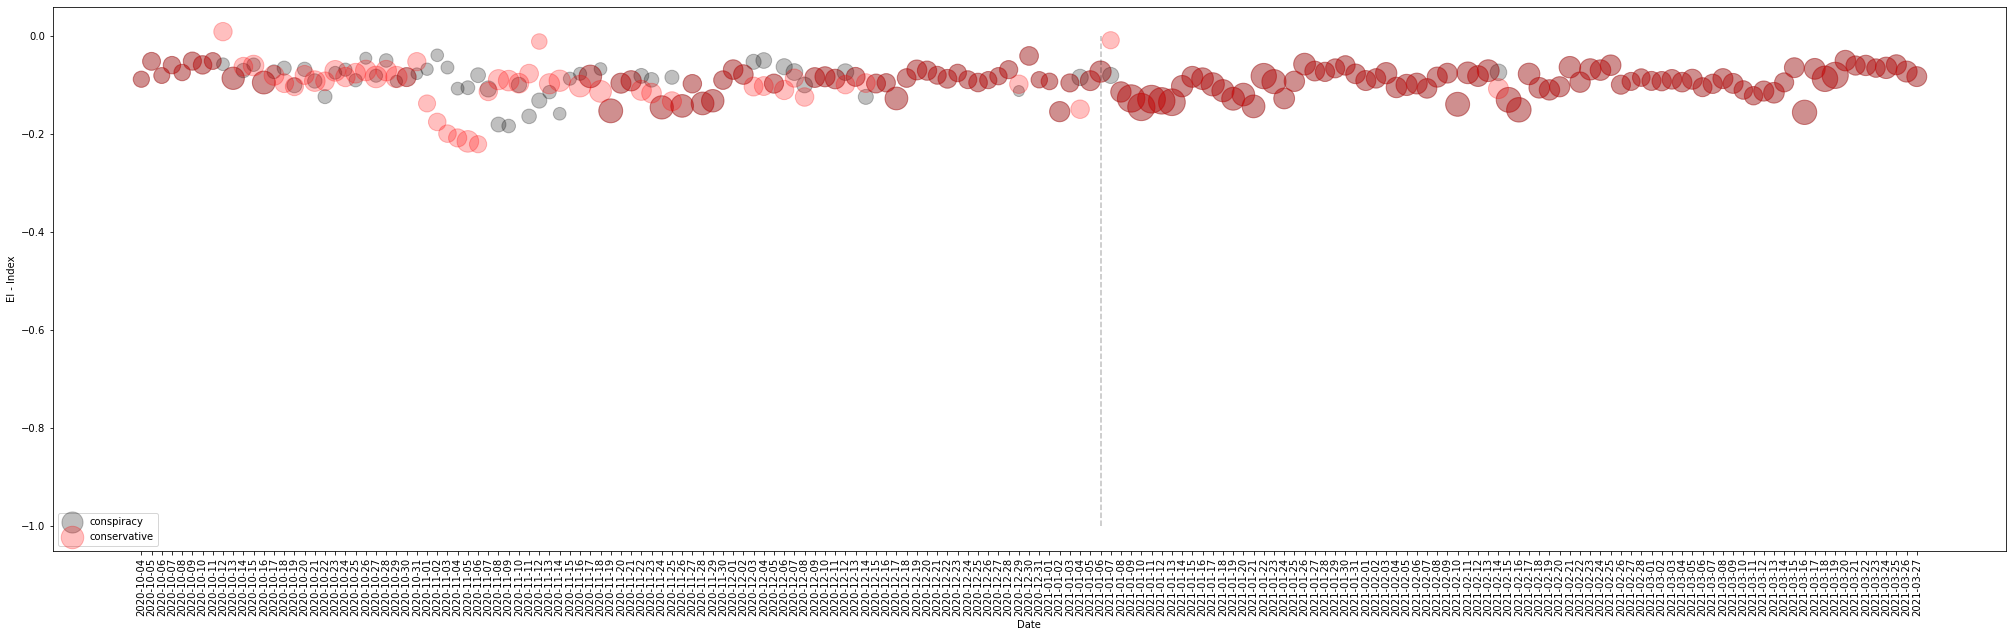

In [16]:
plotter(2,5)

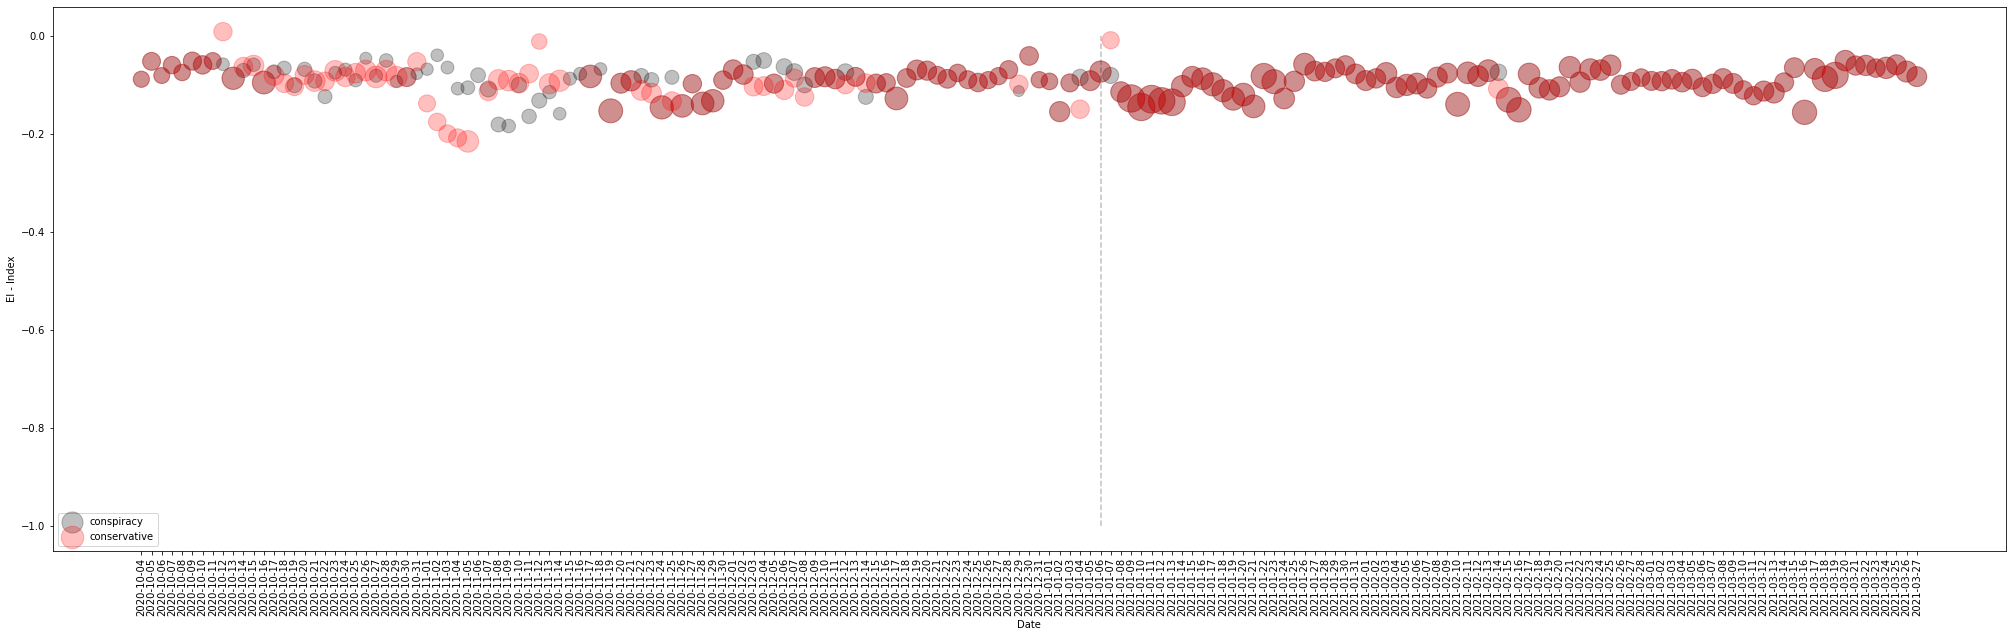

In [17]:
plotter(2,6)

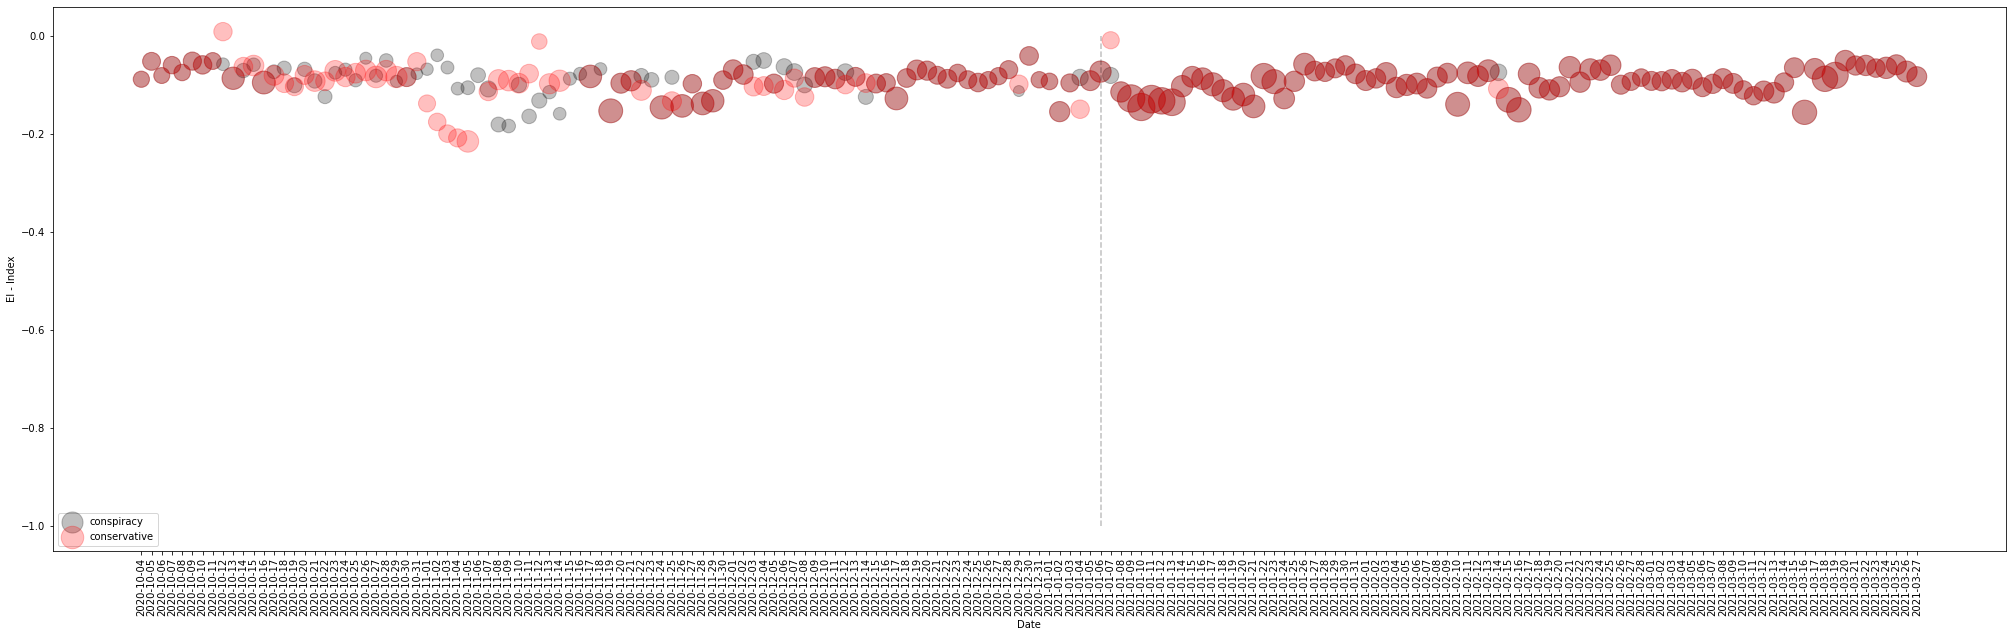

In [18]:
plotter(2,7)

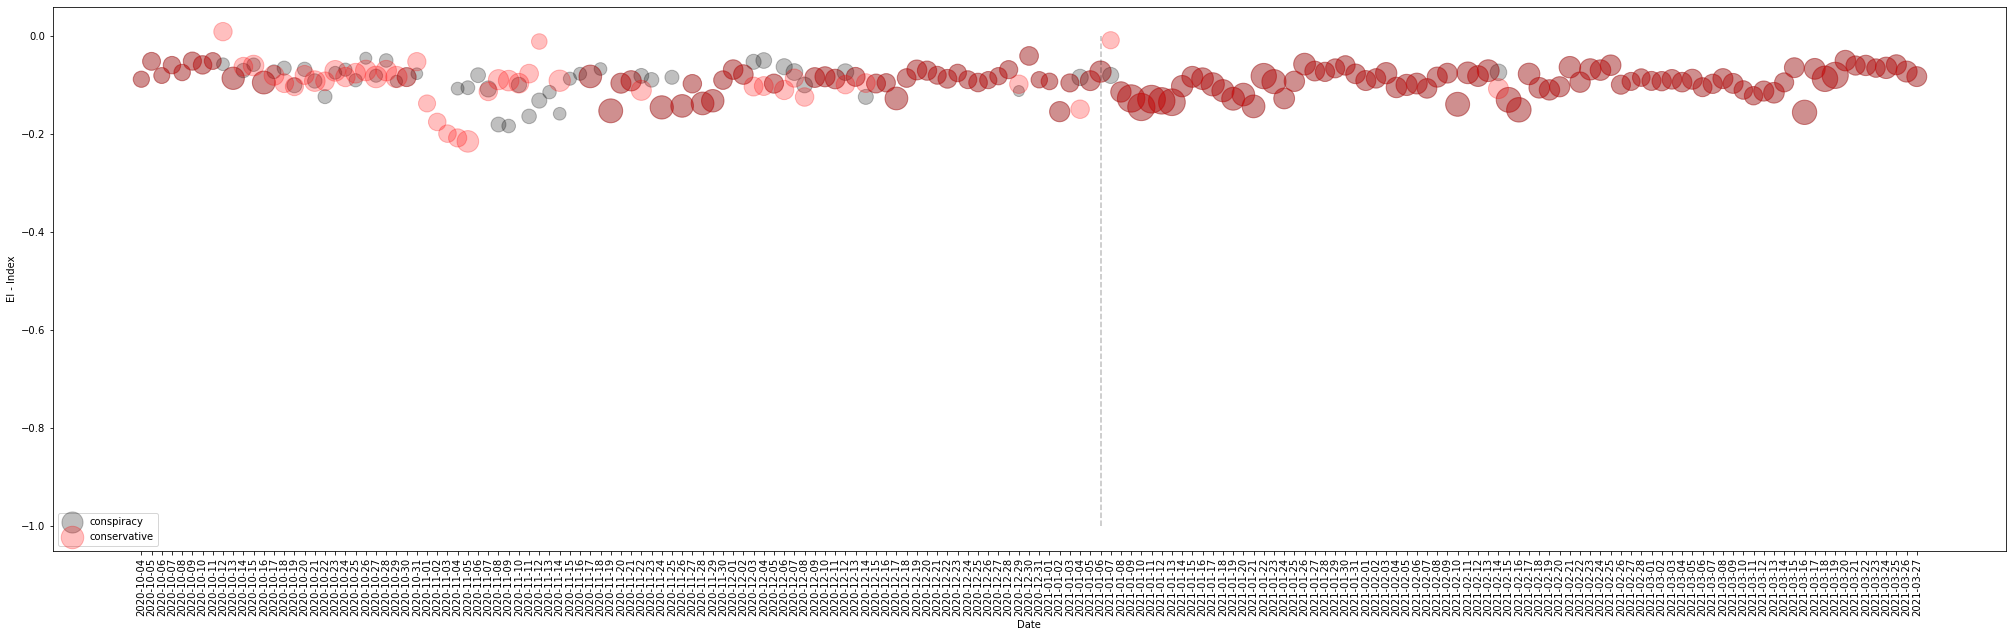

In [56]:
plotter(2,8)

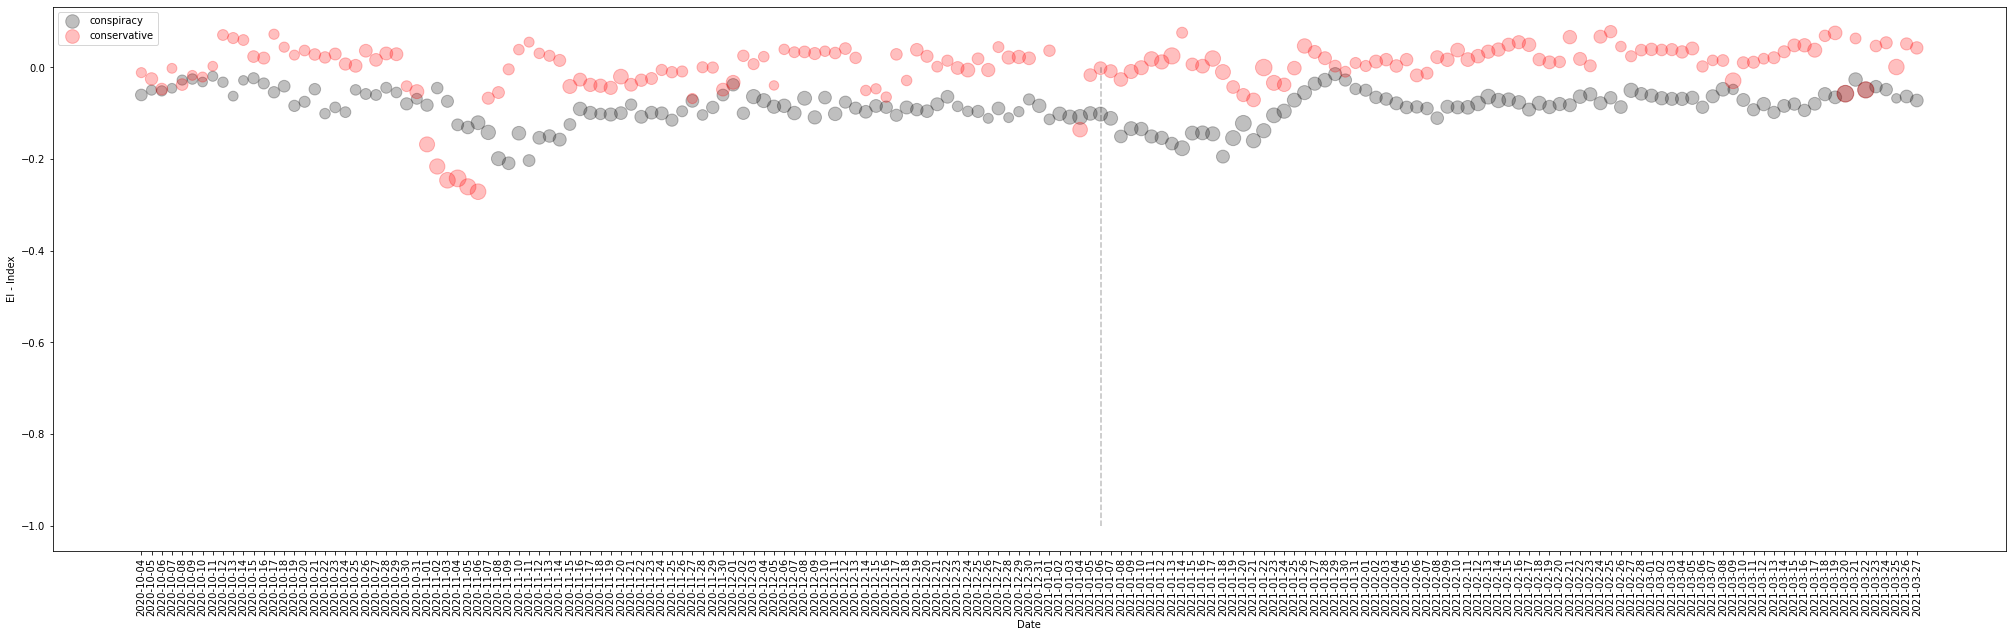

In [60]:
plotter(5,2)

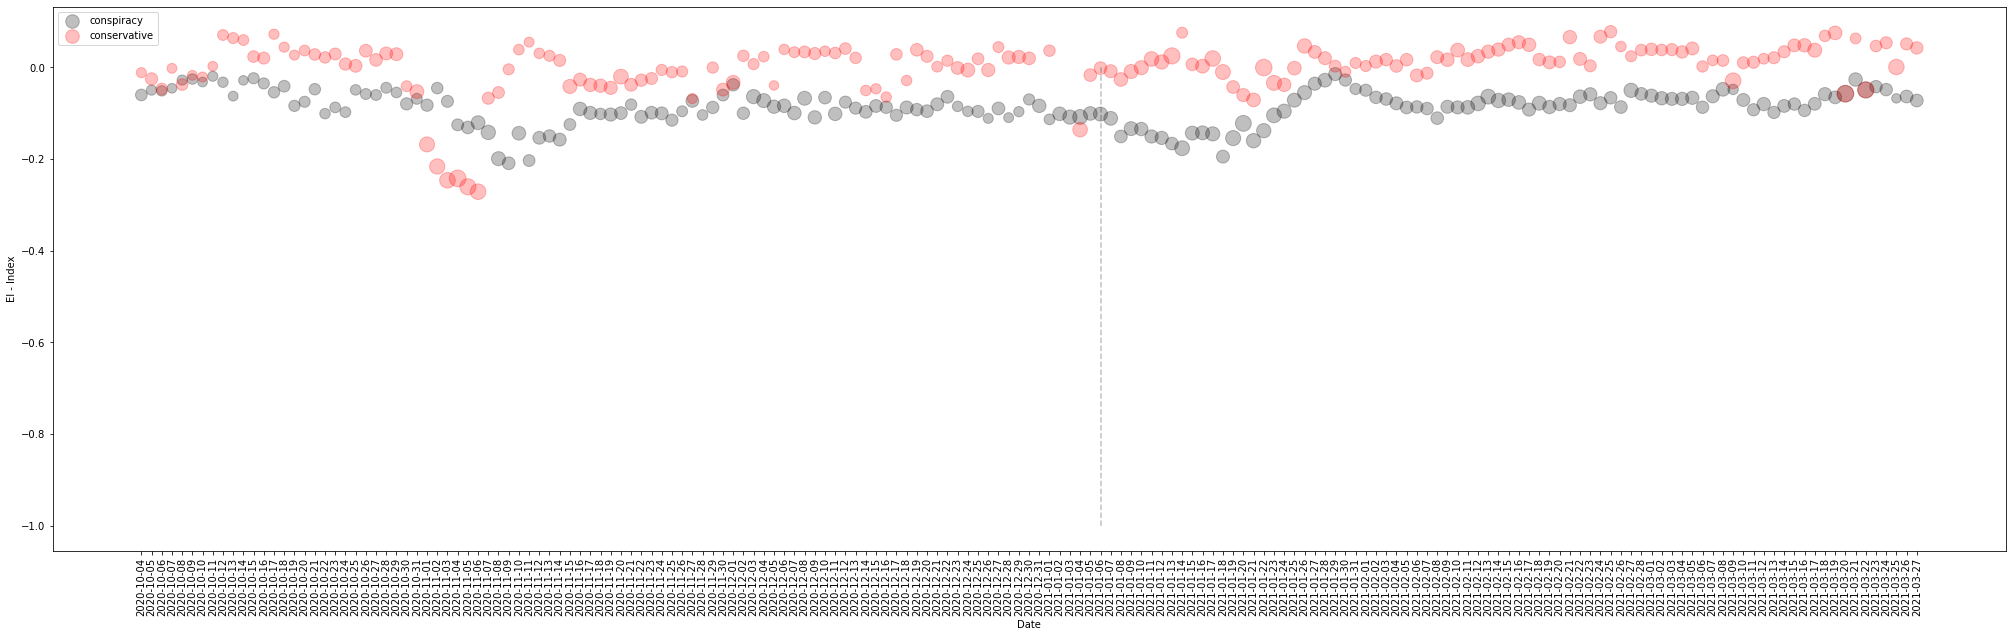

In [19]:
plotter(5,3)

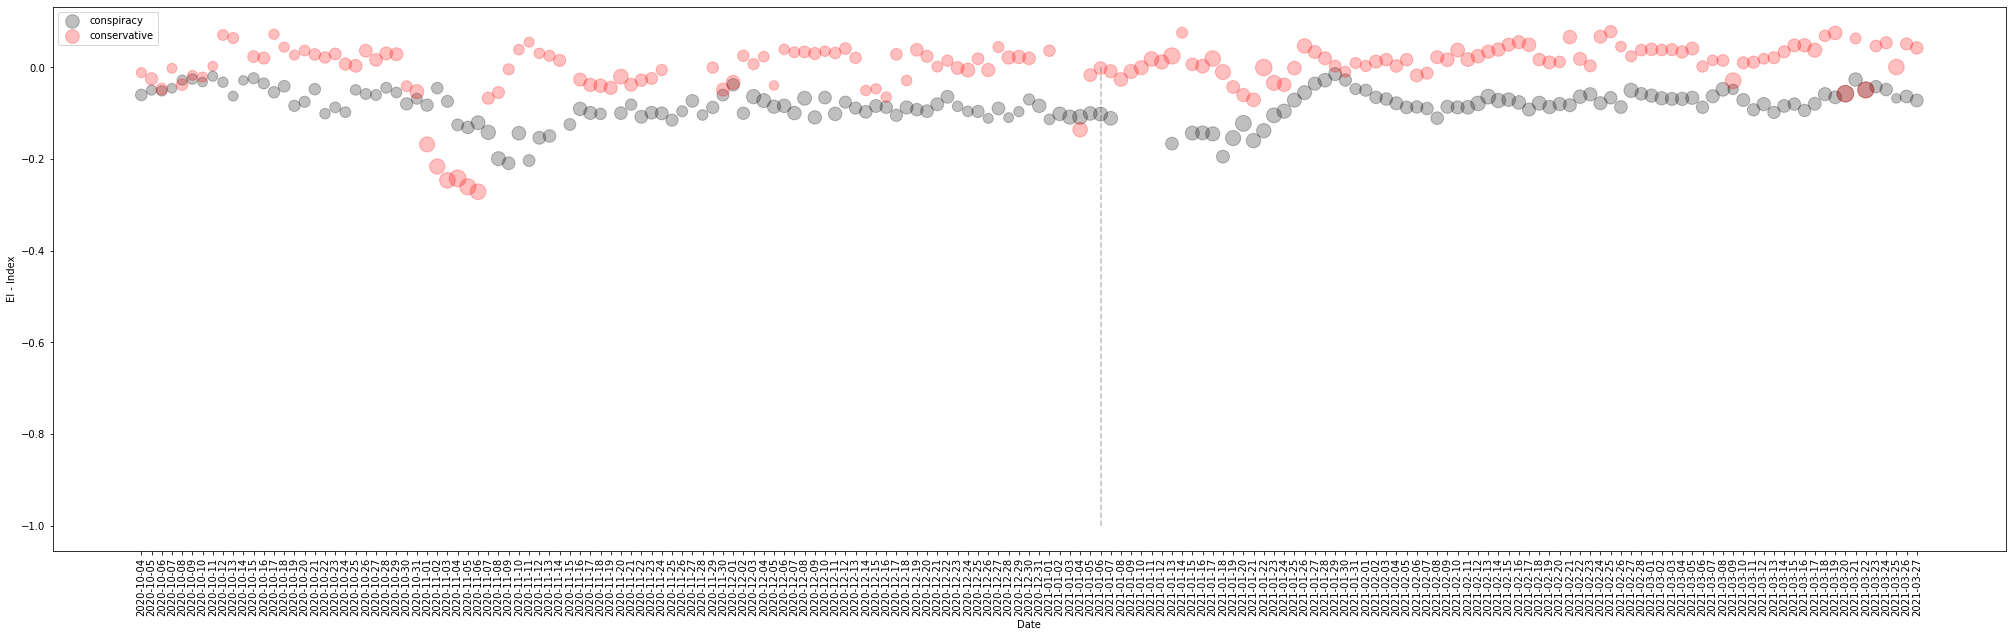

In [20]:
plotter(5,4)

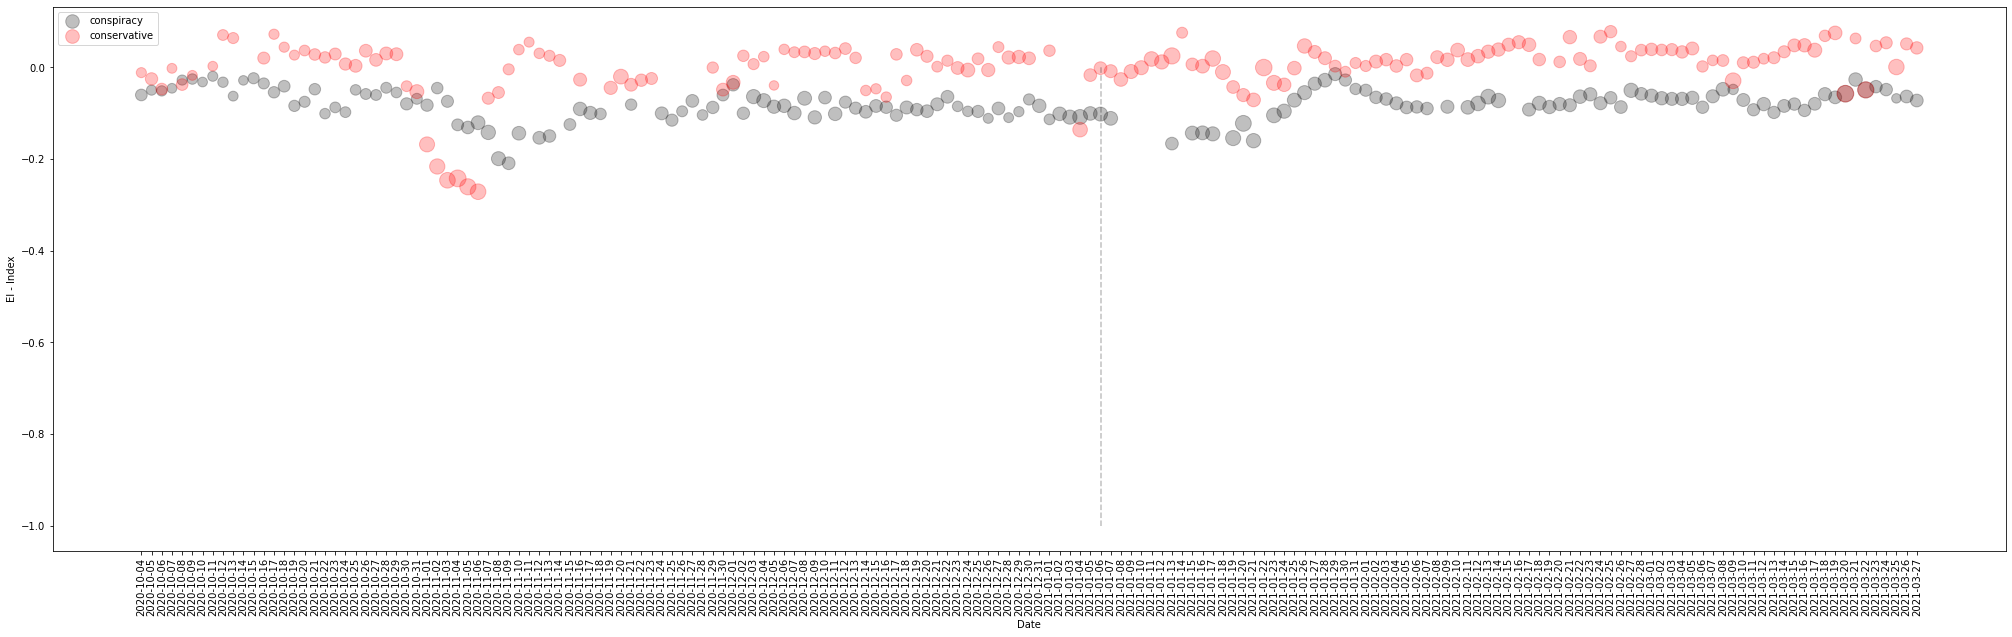

In [21]:
plotter(5,5)

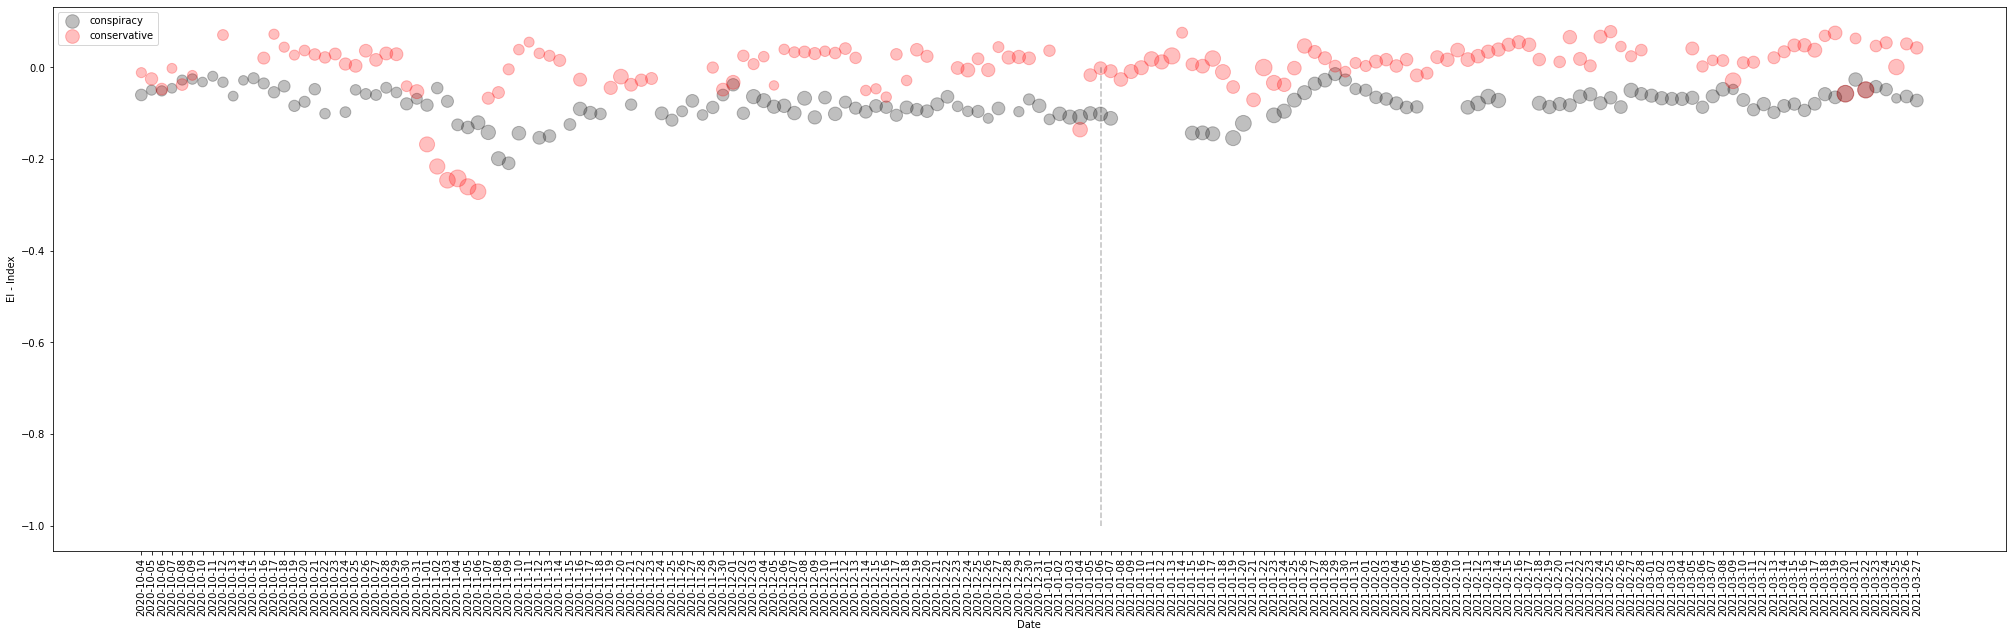

In [22]:
plotter(5,6)

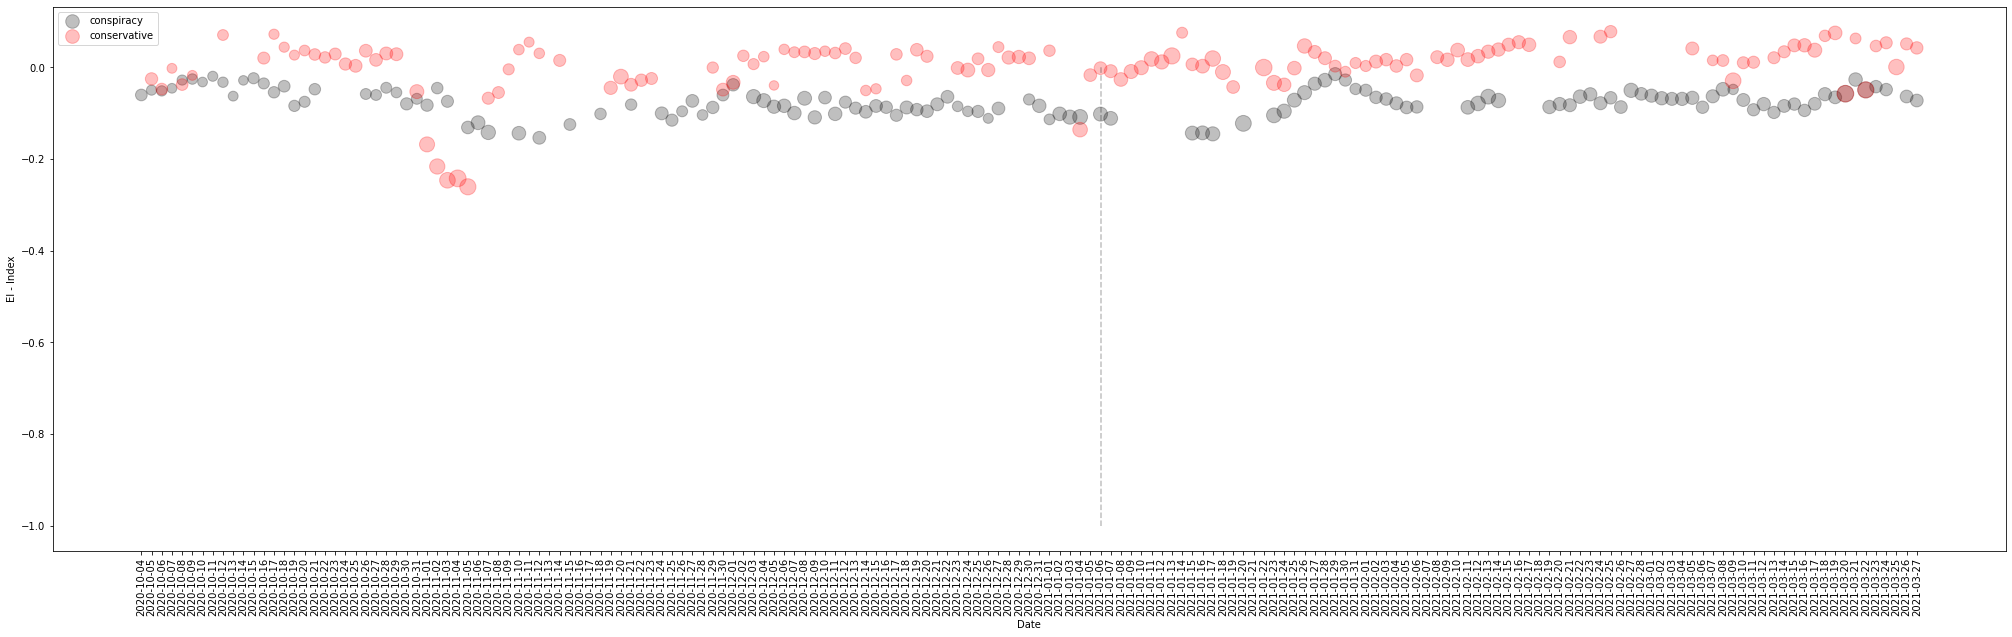

In [23]:
plotter(5,7)

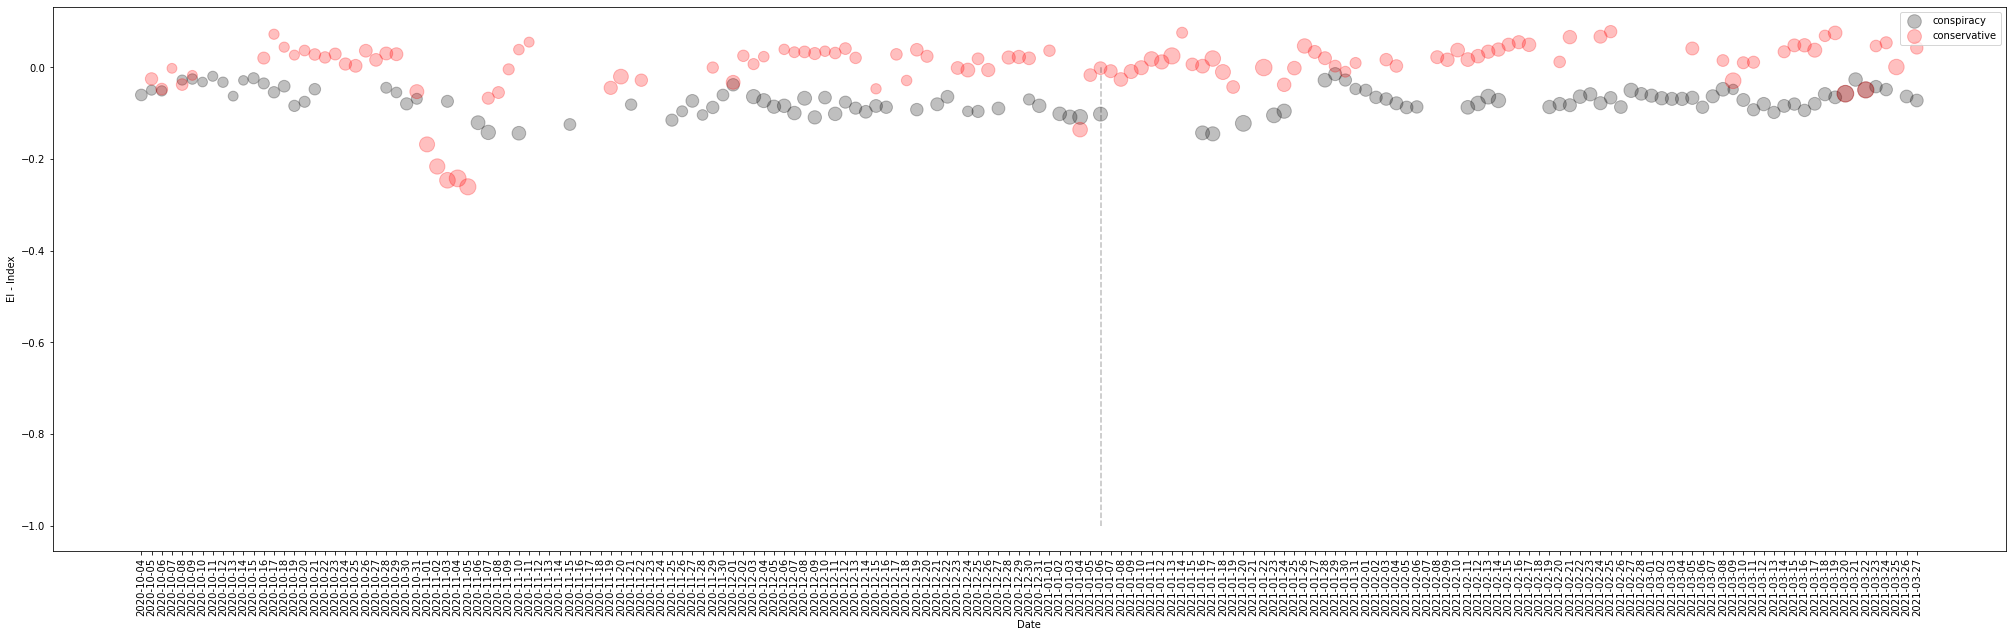

In [57]:
plotter(5,8)

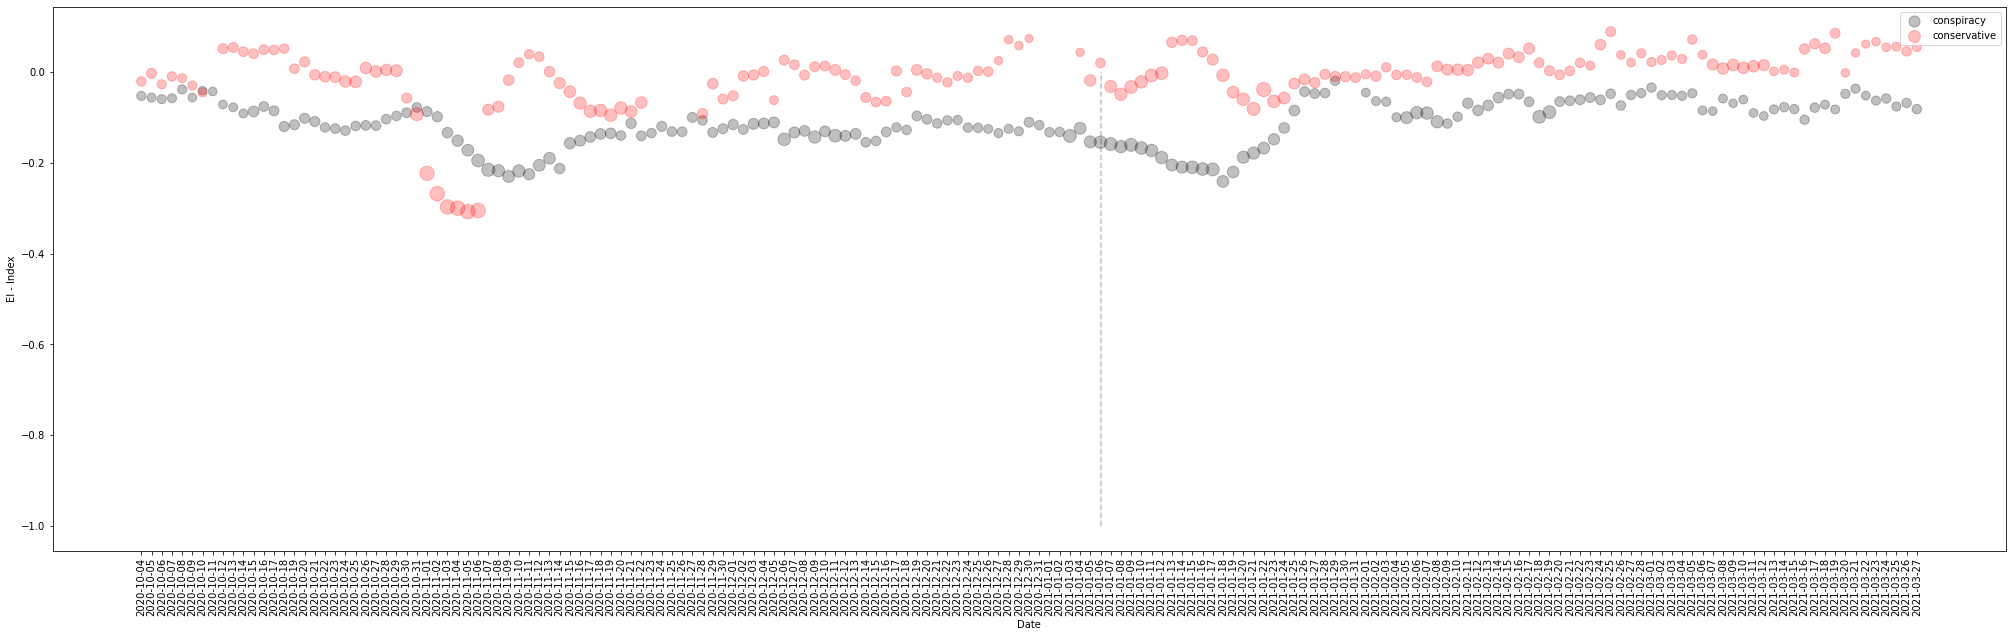

In [59]:
plotter(10,2)

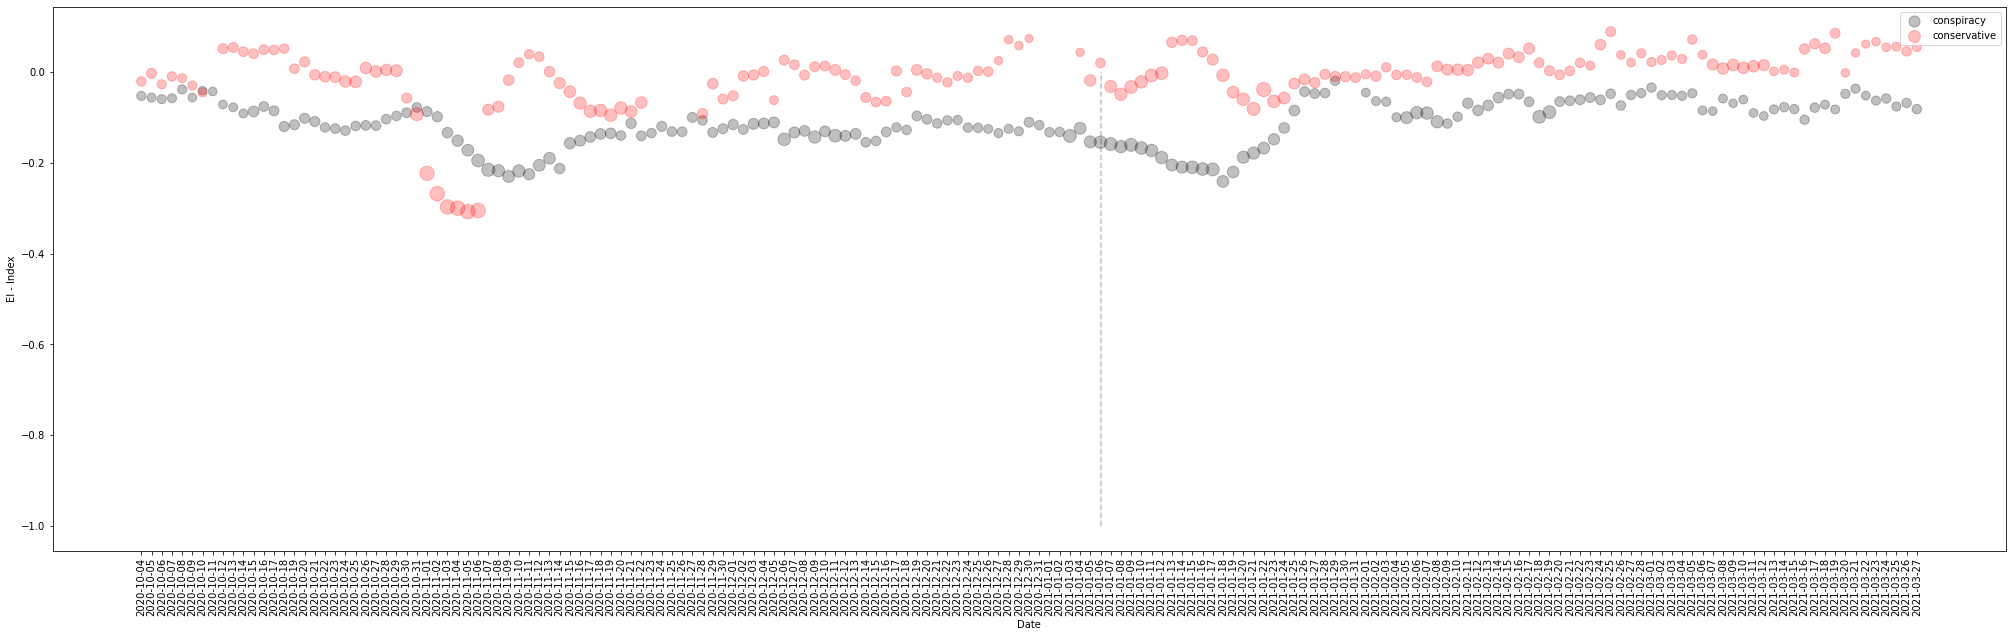

In [24]:
plotter(10,3)

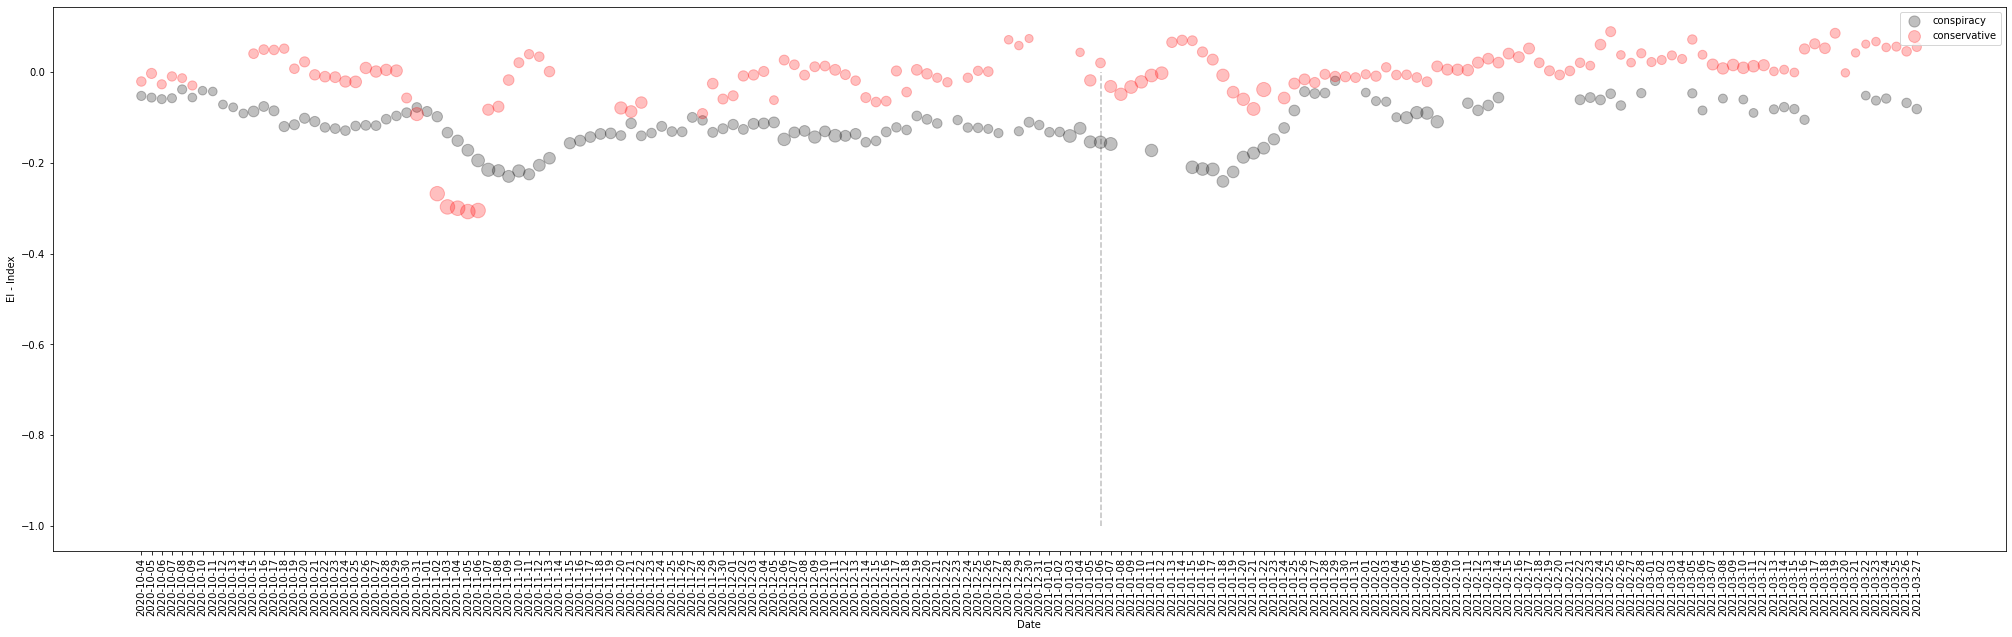

In [25]:
plotter(10,4)

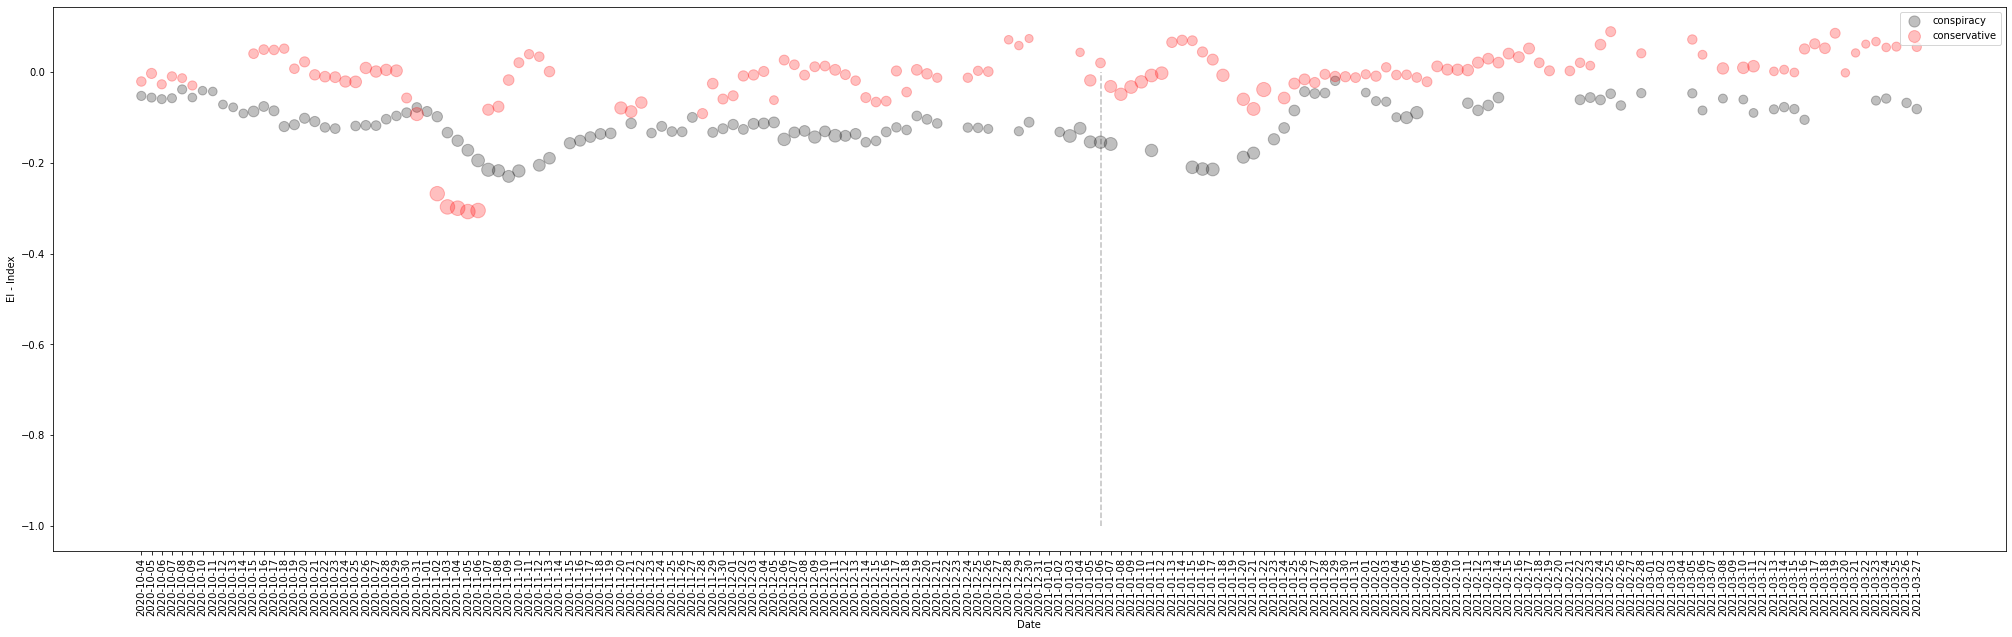

In [26]:
plotter(10,5)

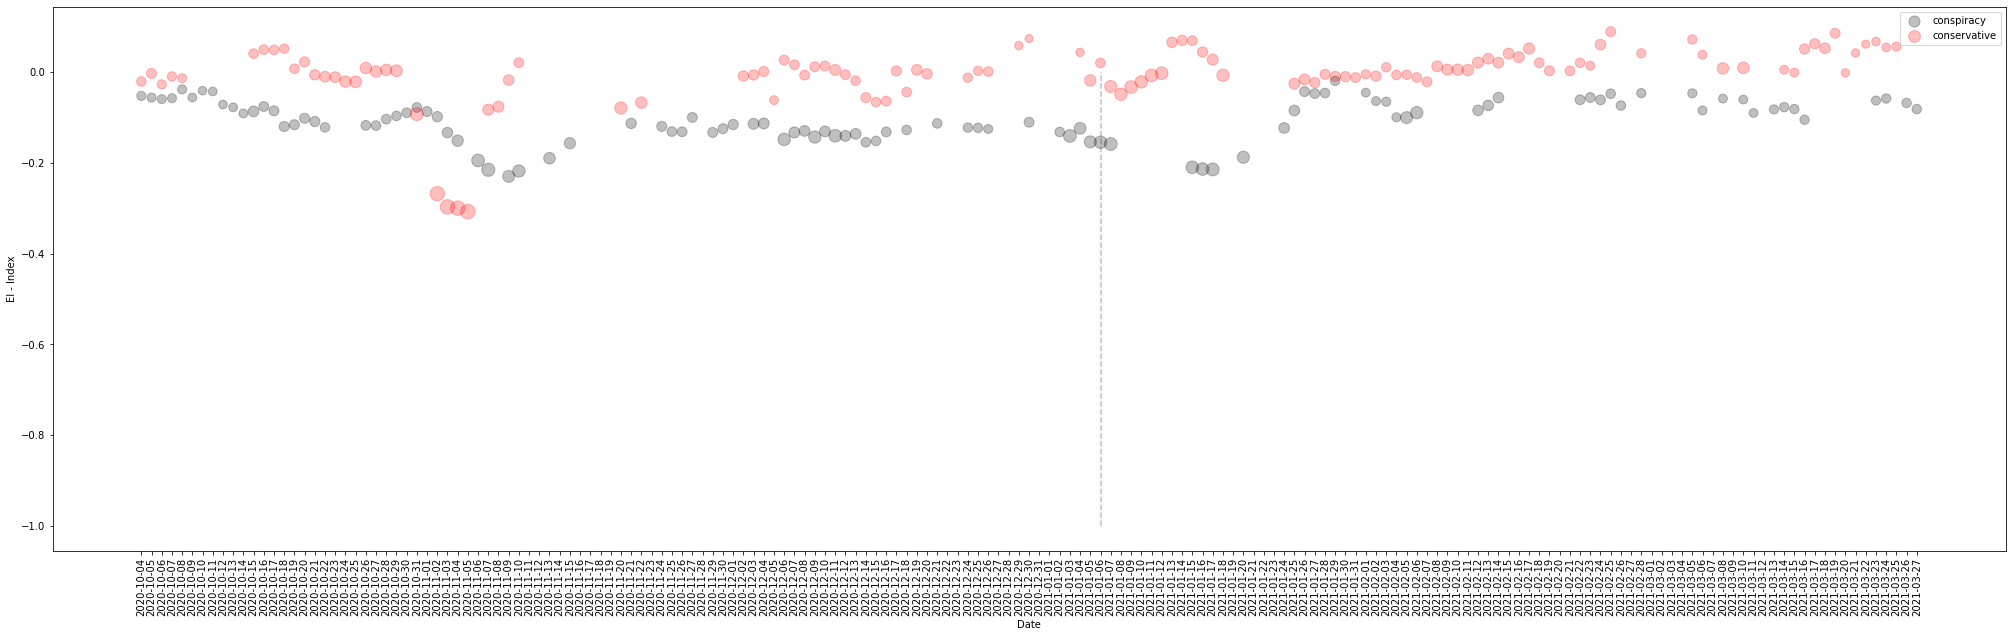

In [27]:
plotter(10,6)

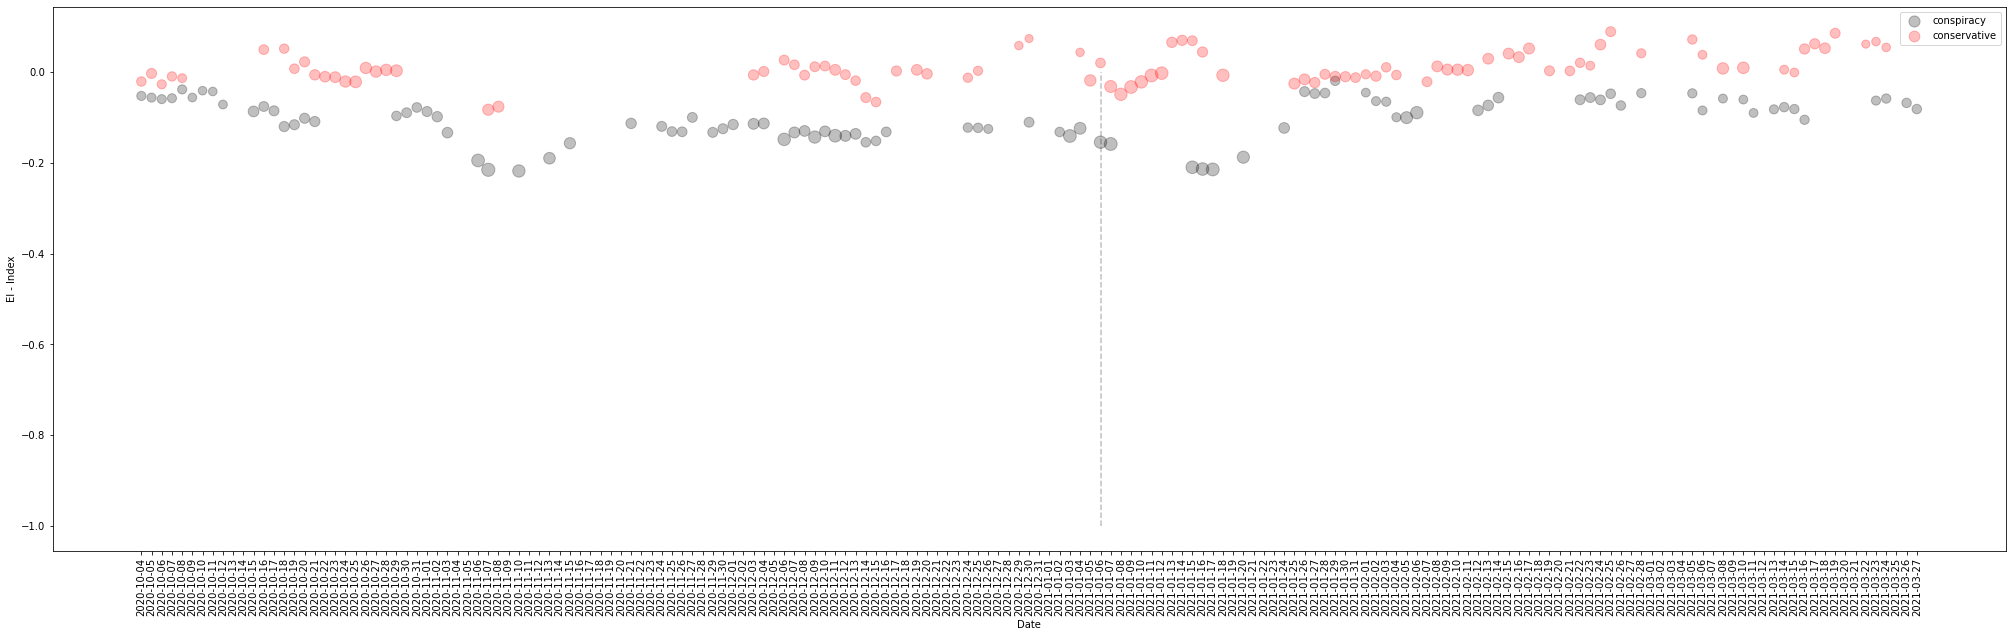

In [28]:
plotter(10,7)

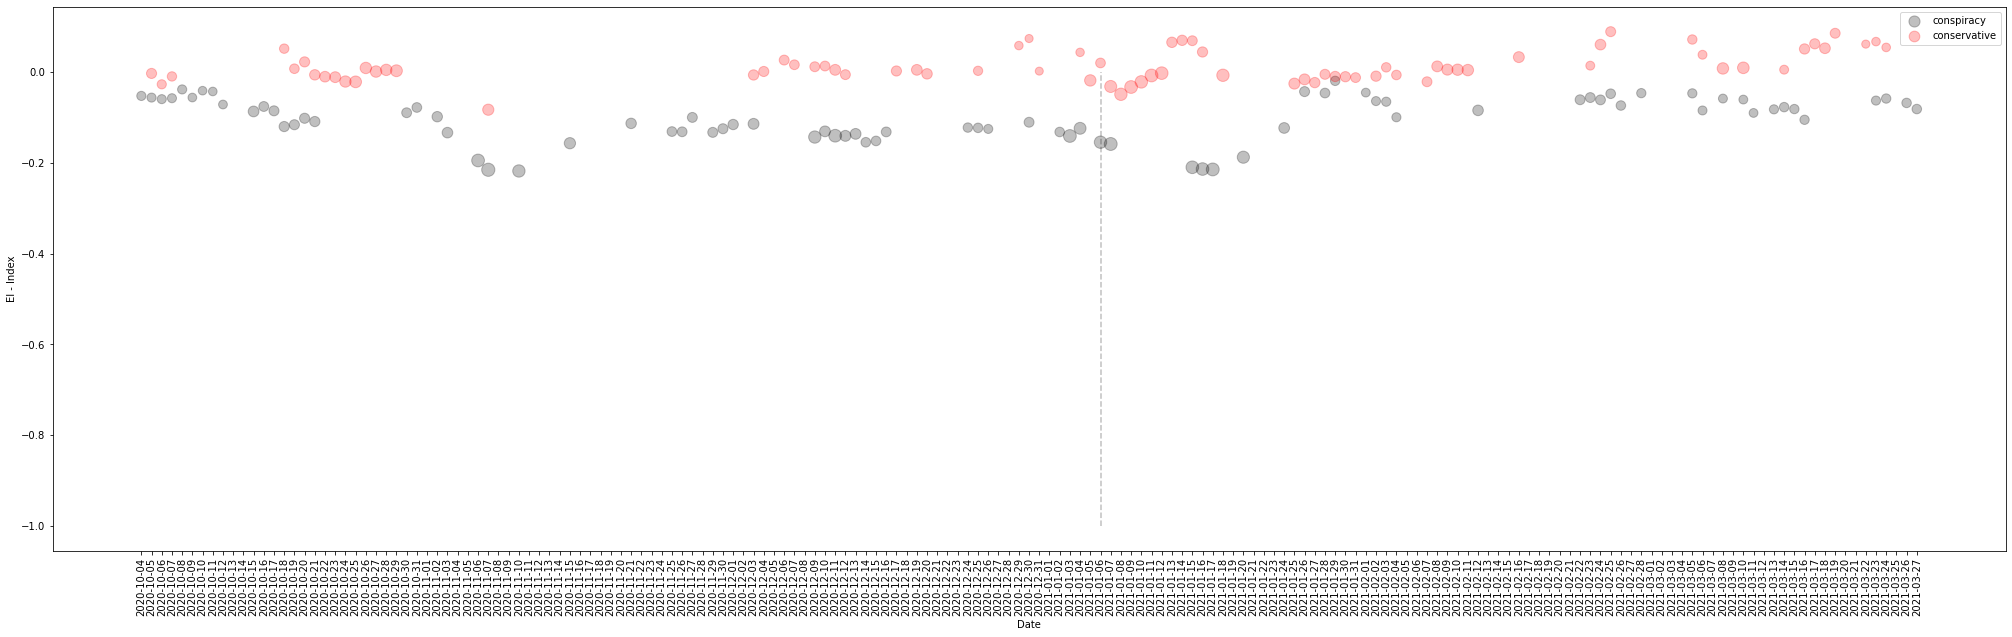

In [58]:
plotter(10,8)

No handles with labels found to put in legend.


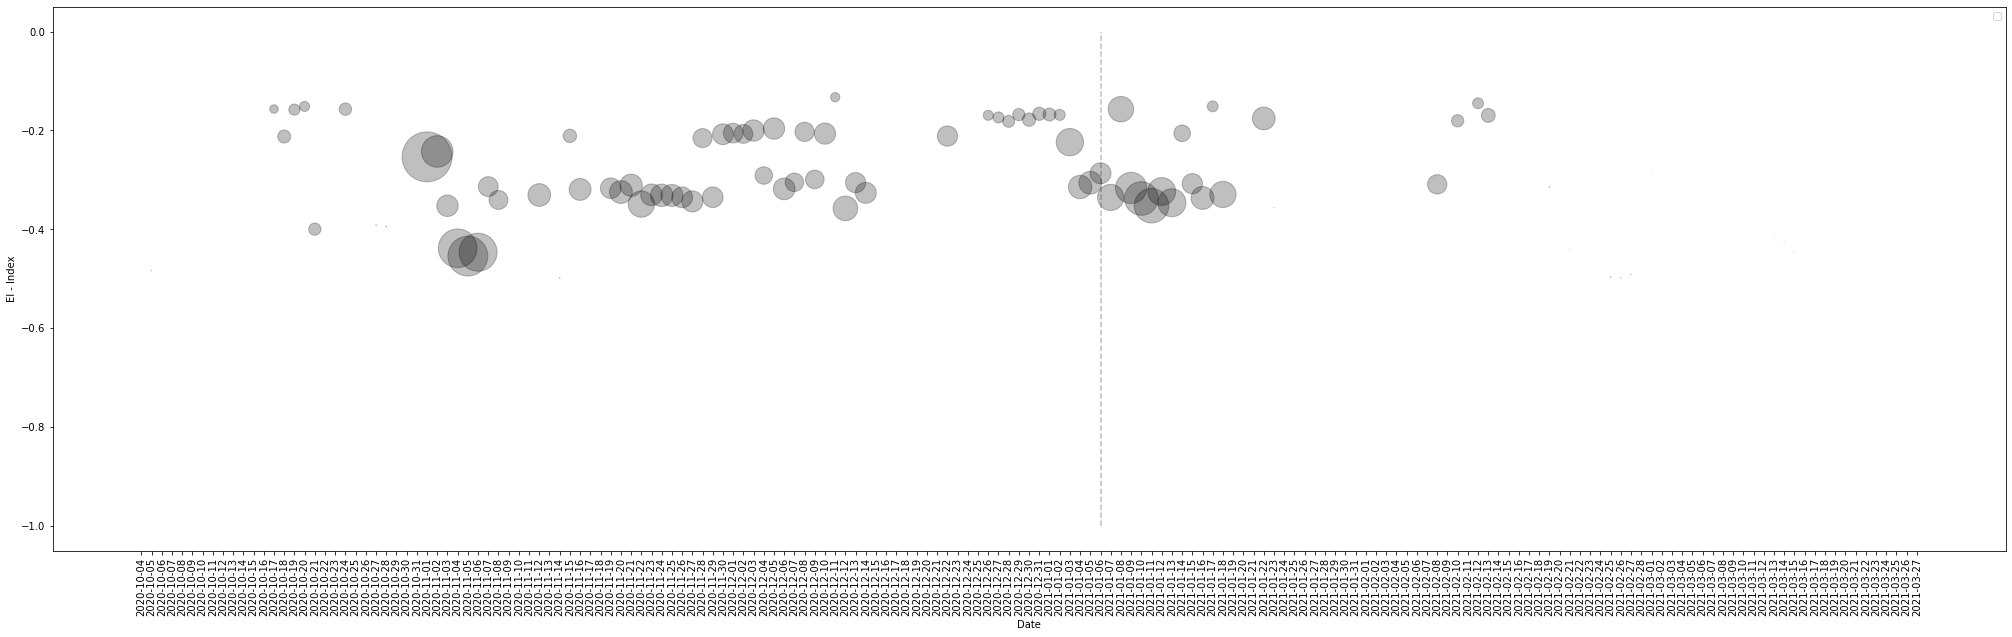

In [64]:
agg_plotter(0.5,2)

No handles with labels found to put in legend.


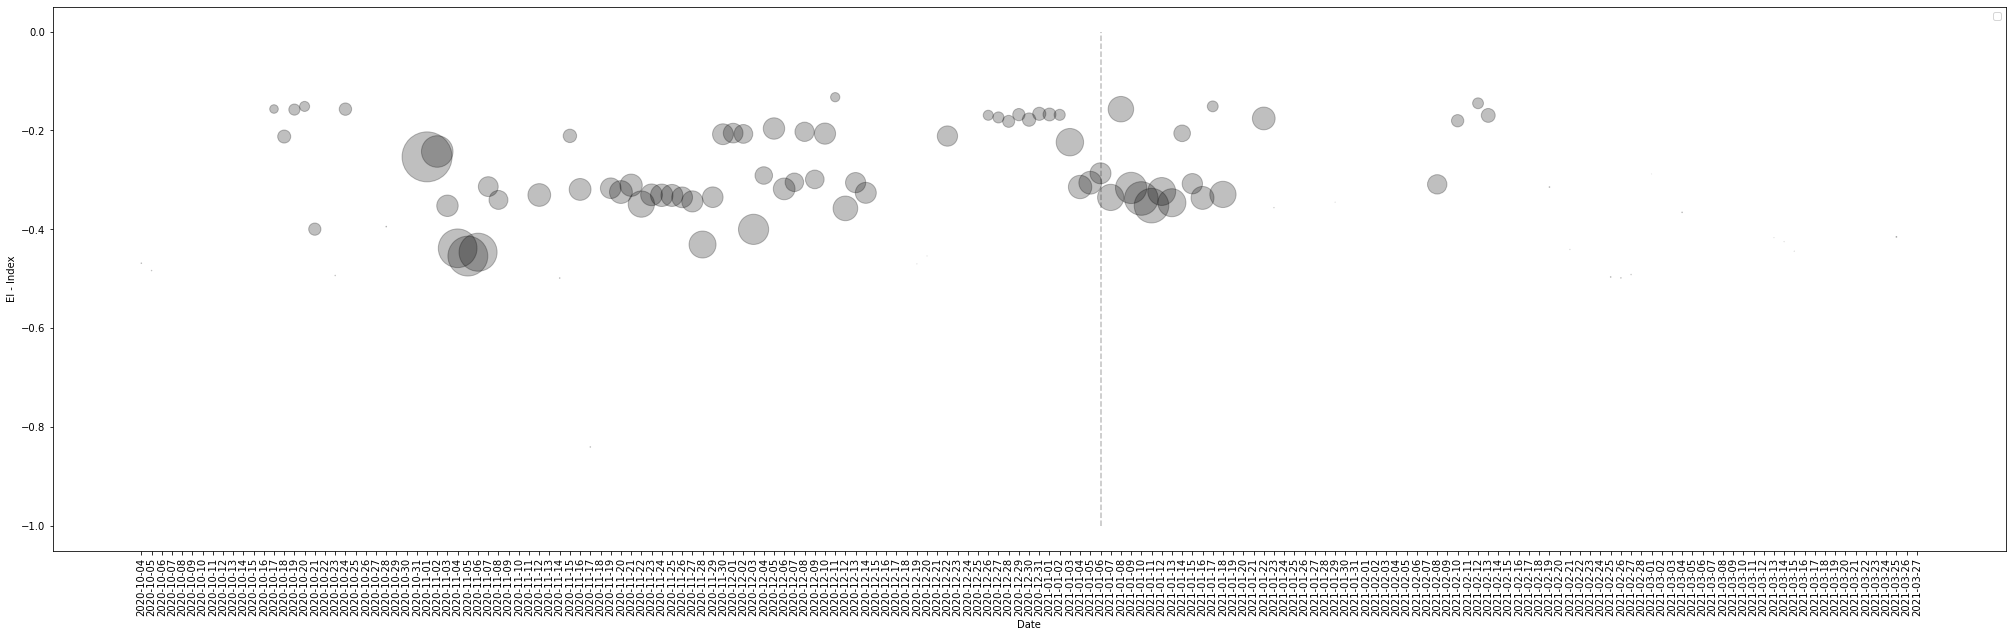

In [29]:
agg_plotter(0.5,3)

No handles with labels found to put in legend.


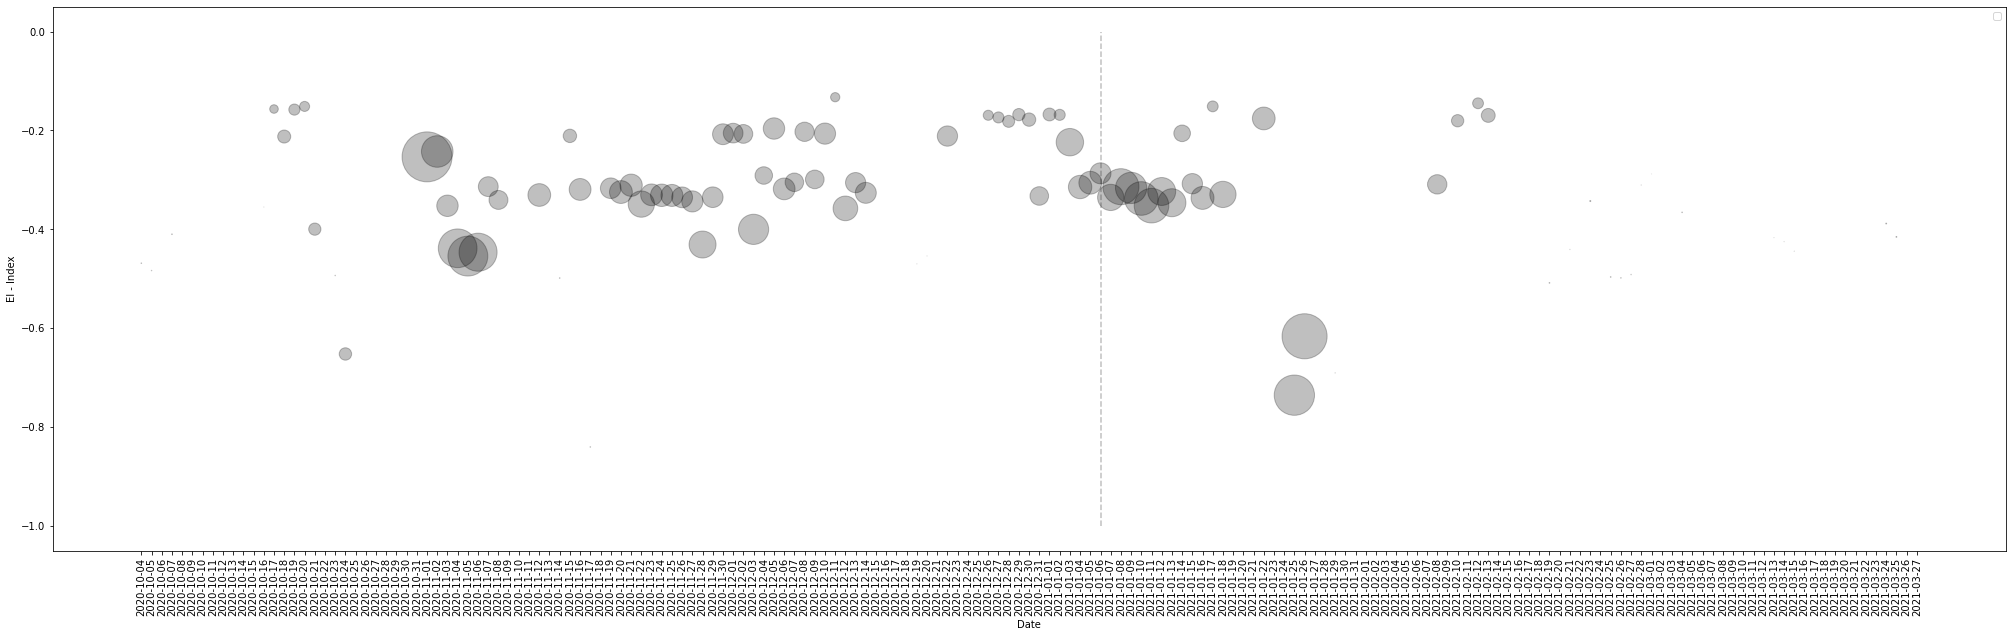

In [30]:
agg_plotter(0.5,4)

No handles with labels found to put in legend.


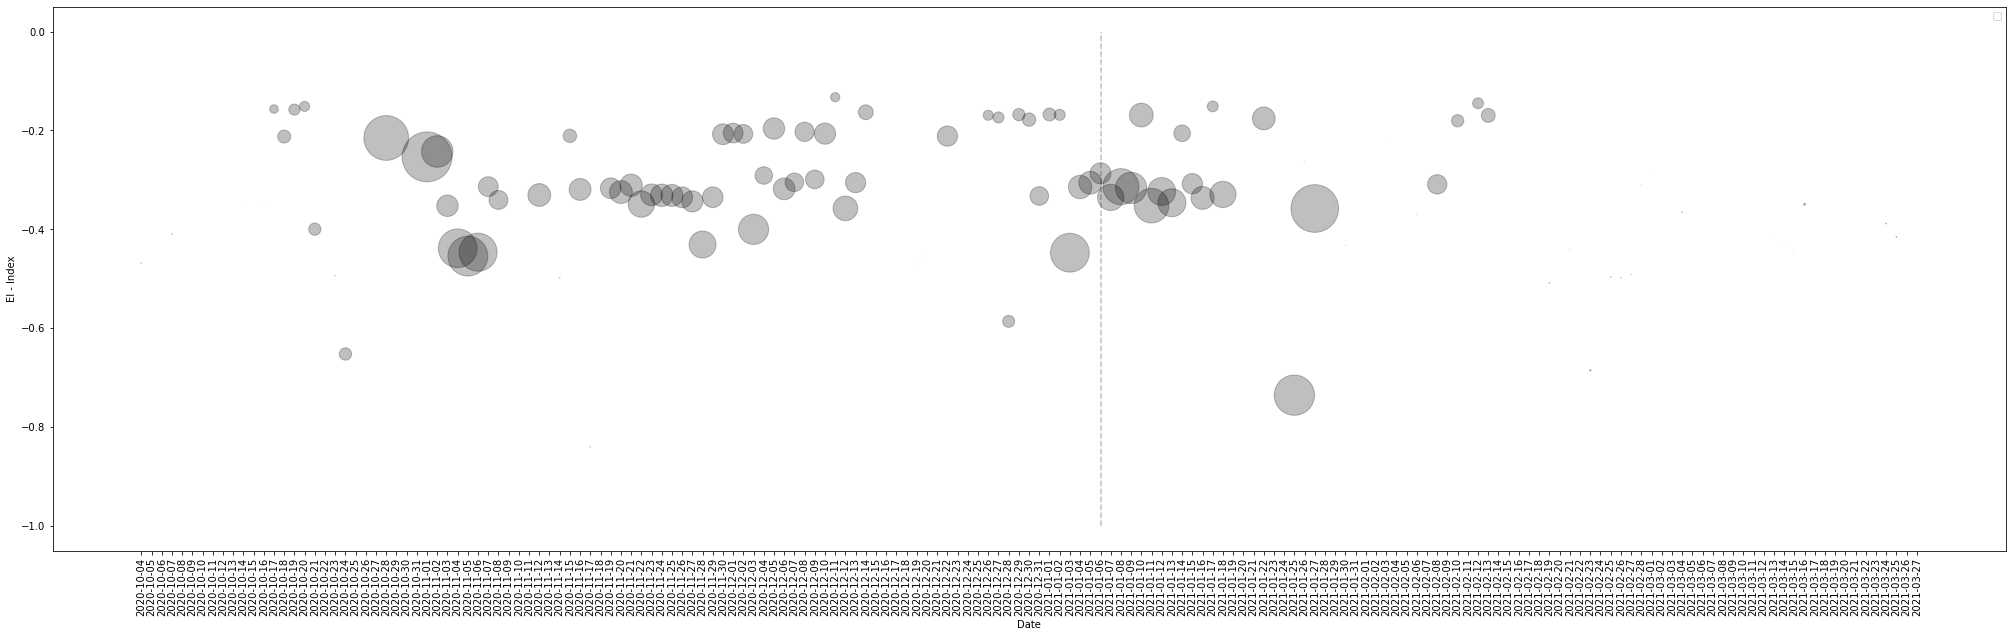

In [31]:
agg_plotter(0.5,5)

No handles with labels found to put in legend.


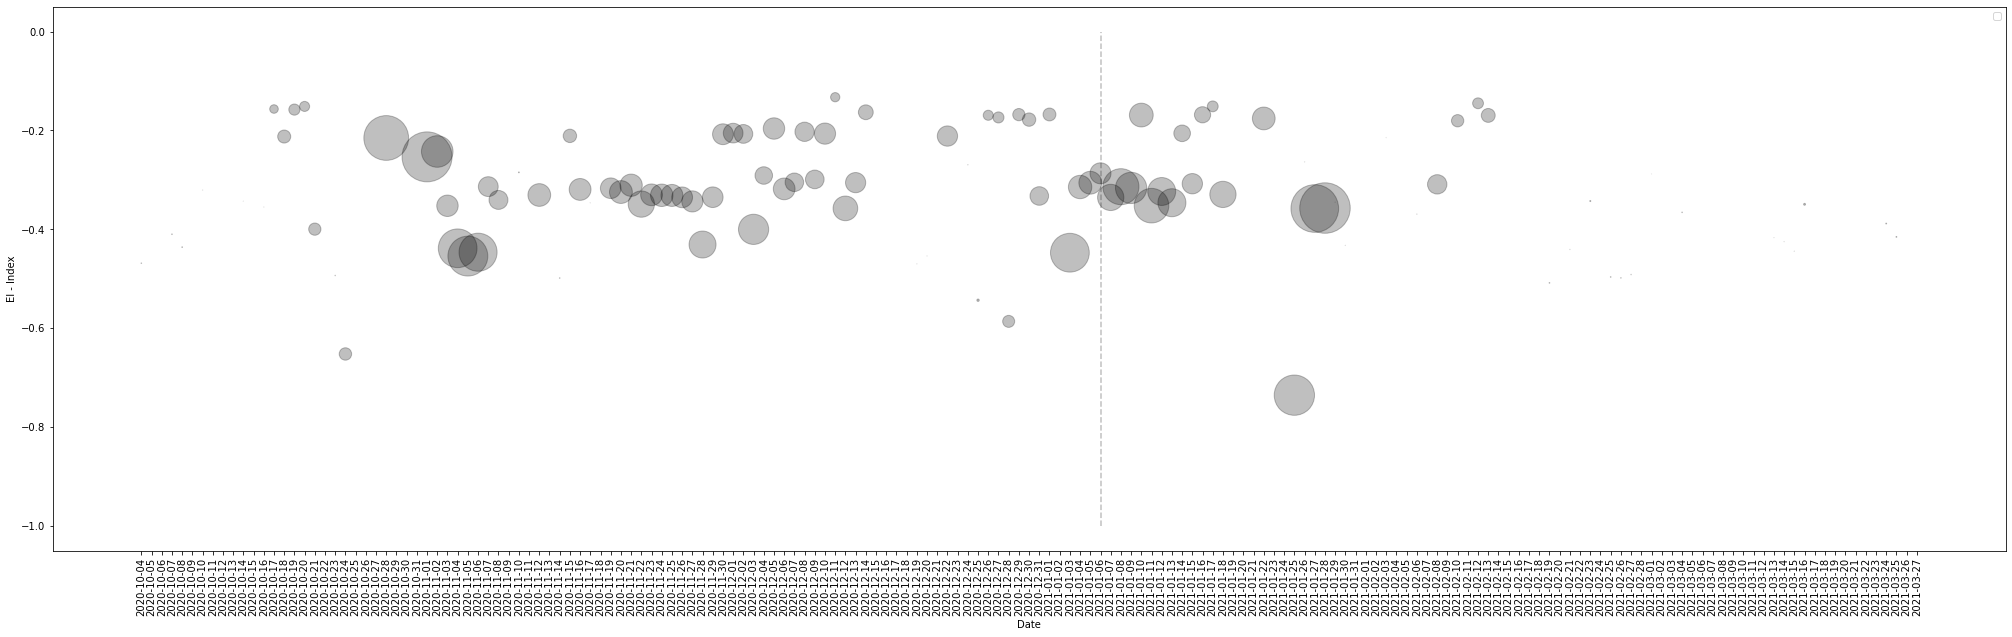

In [32]:
agg_plotter(0.5,6)

No handles with labels found to put in legend.


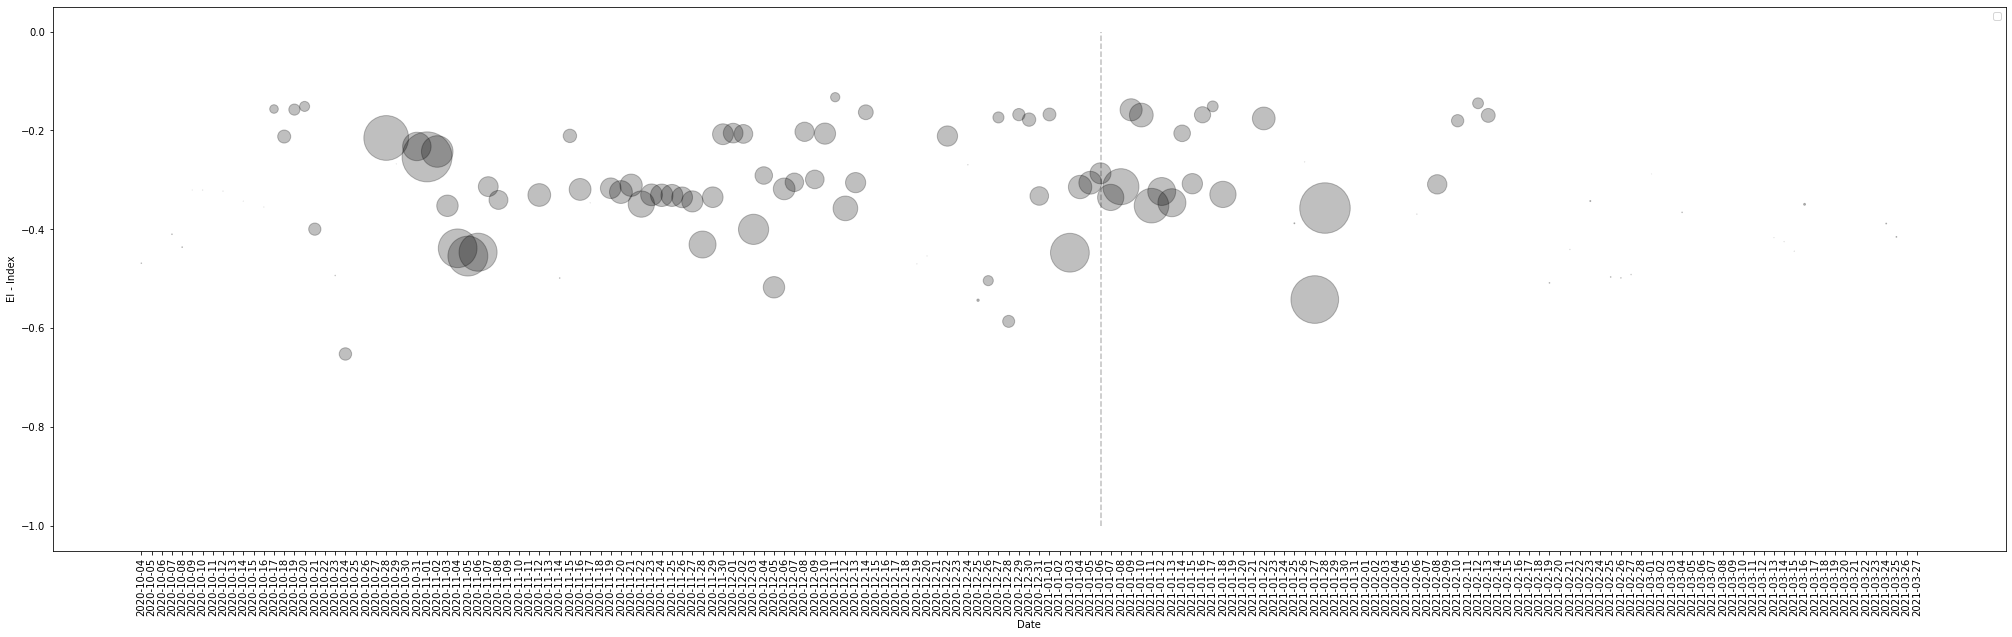

In [33]:
agg_plotter(0.5,7)

No handles with labels found to put in legend.


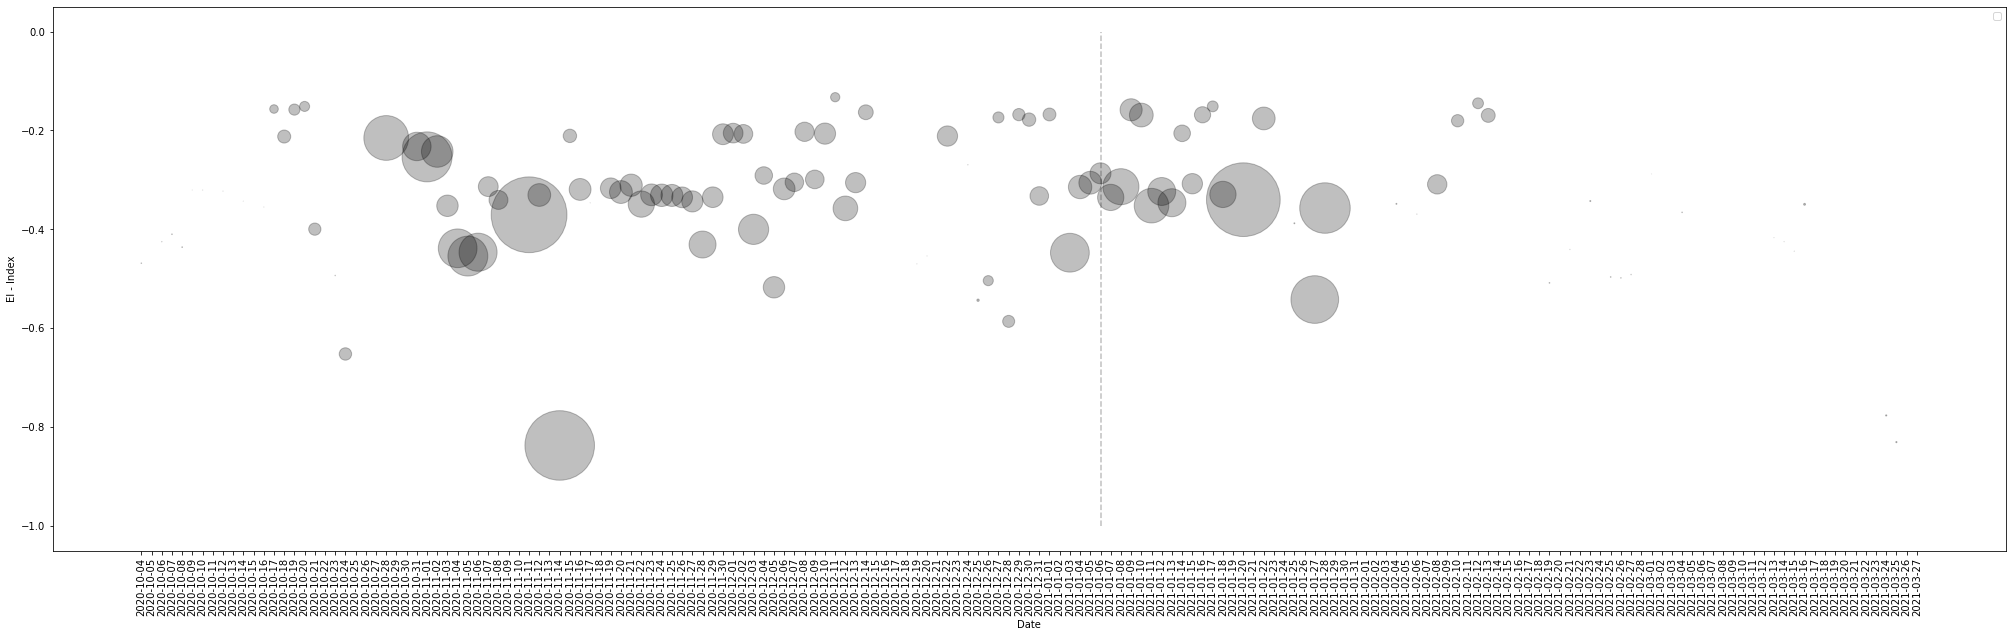

In [65]:
agg_plotter(0.5,8)

No handles with labels found to put in legend.


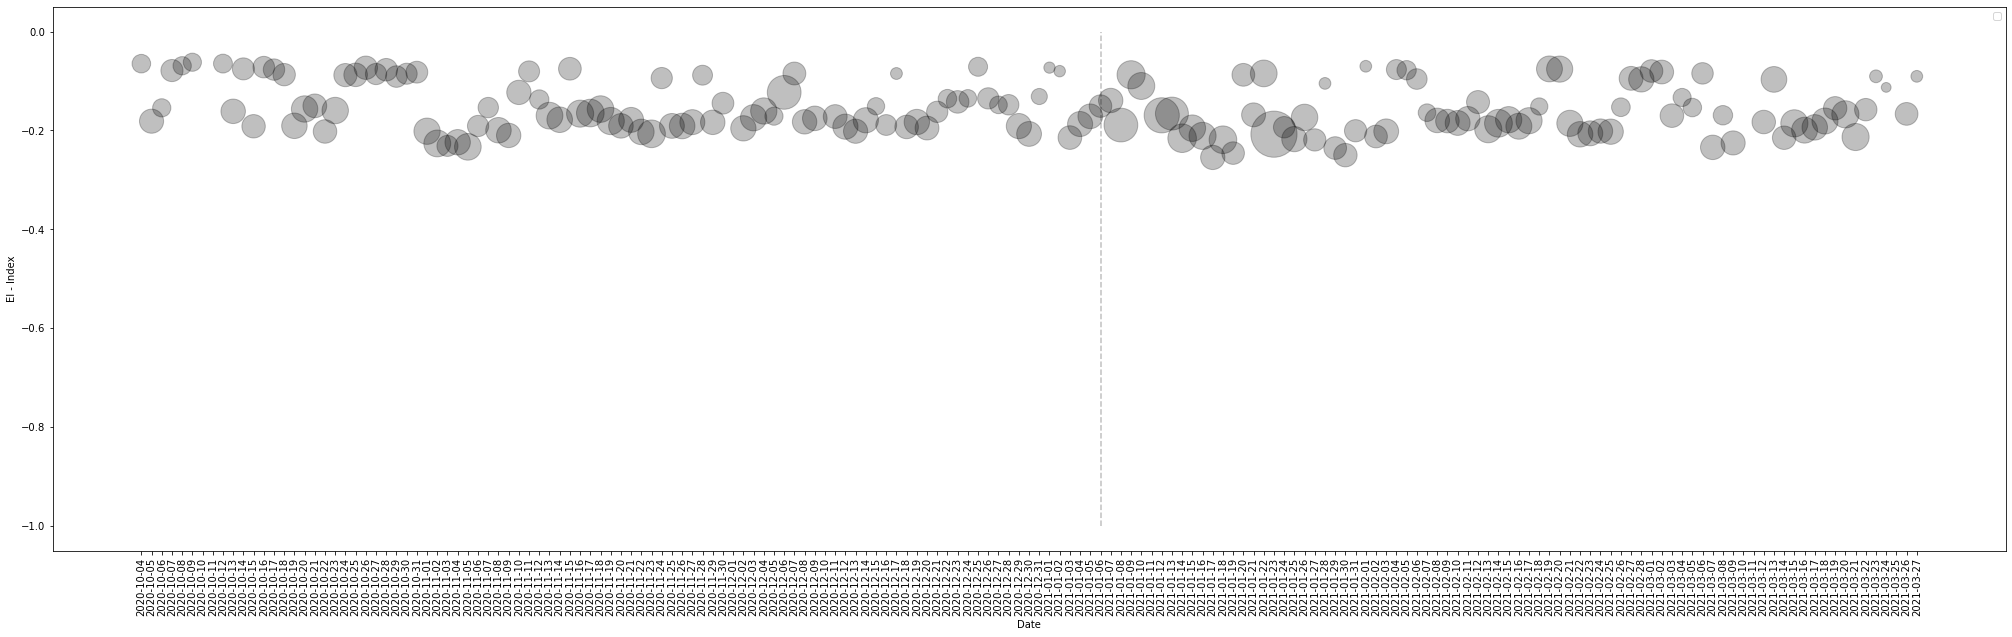

In [66]:
agg_plotter(1,2)

No handles with labels found to put in legend.


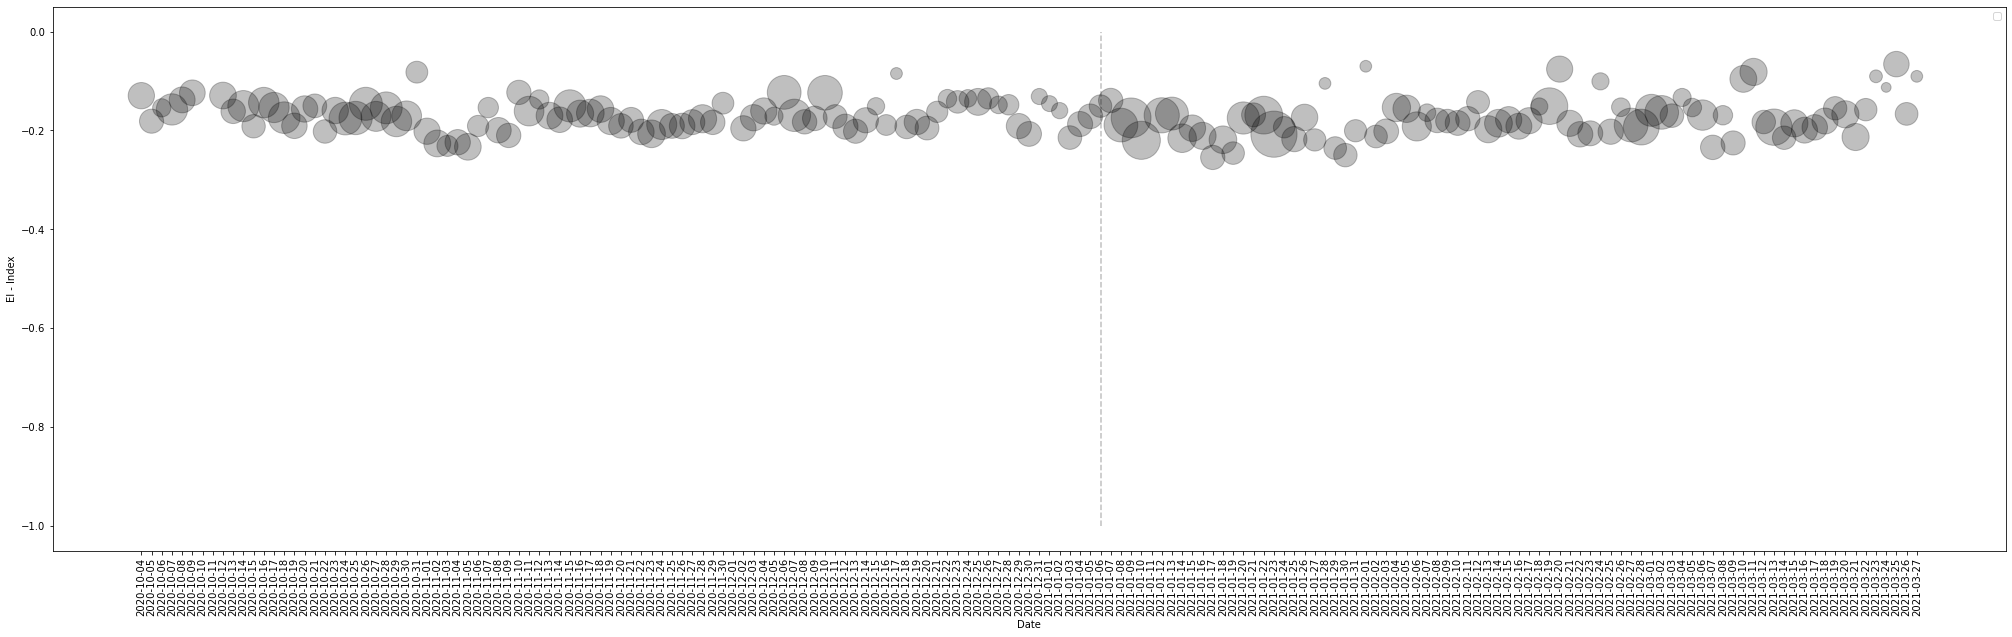

In [34]:
agg_plotter(1,3)

No handles with labels found to put in legend.


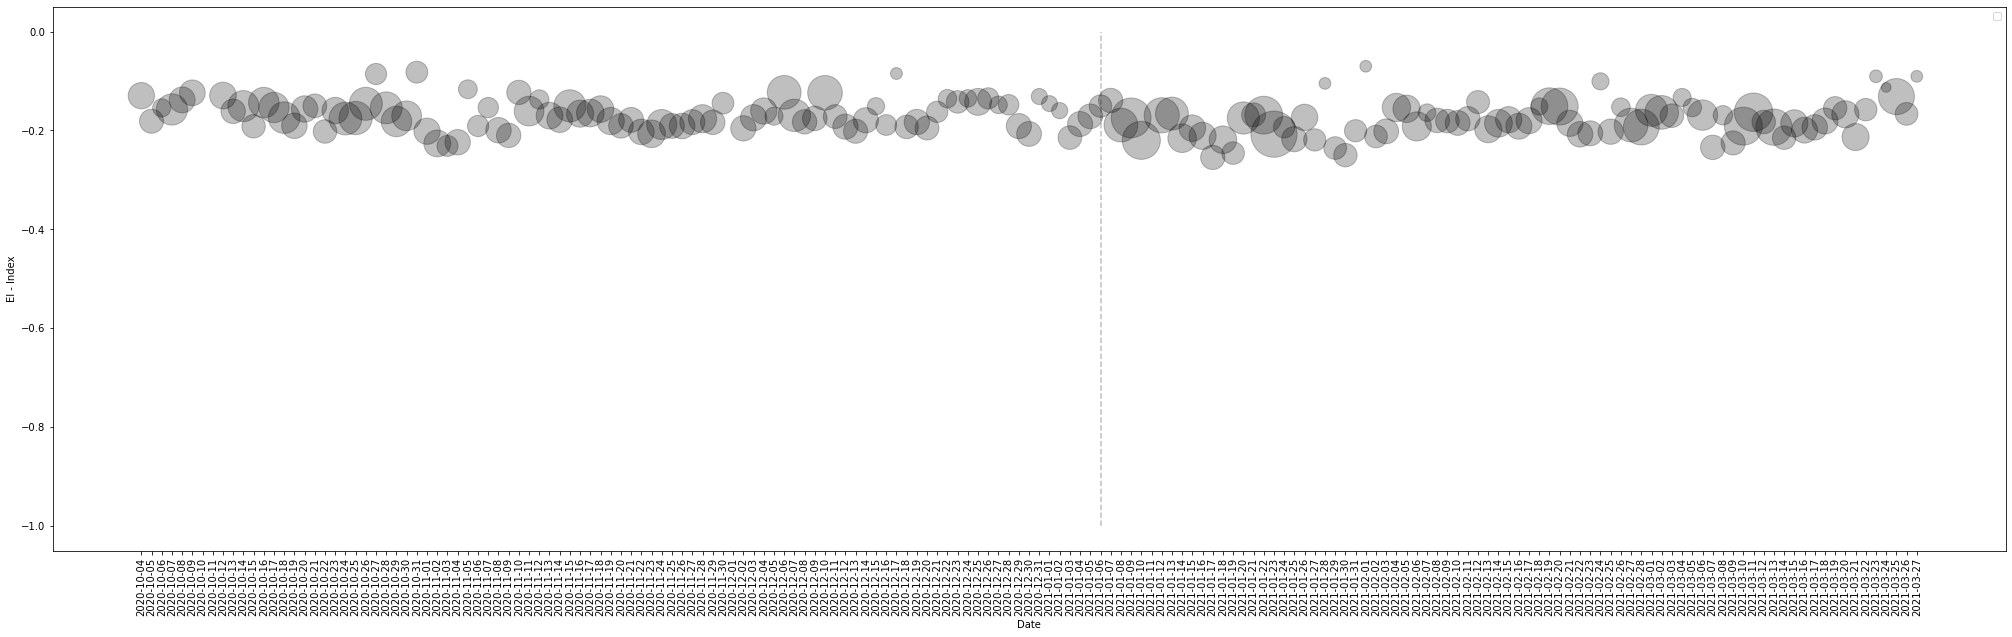

In [35]:
agg_plotter(1,4)

No handles with labels found to put in legend.


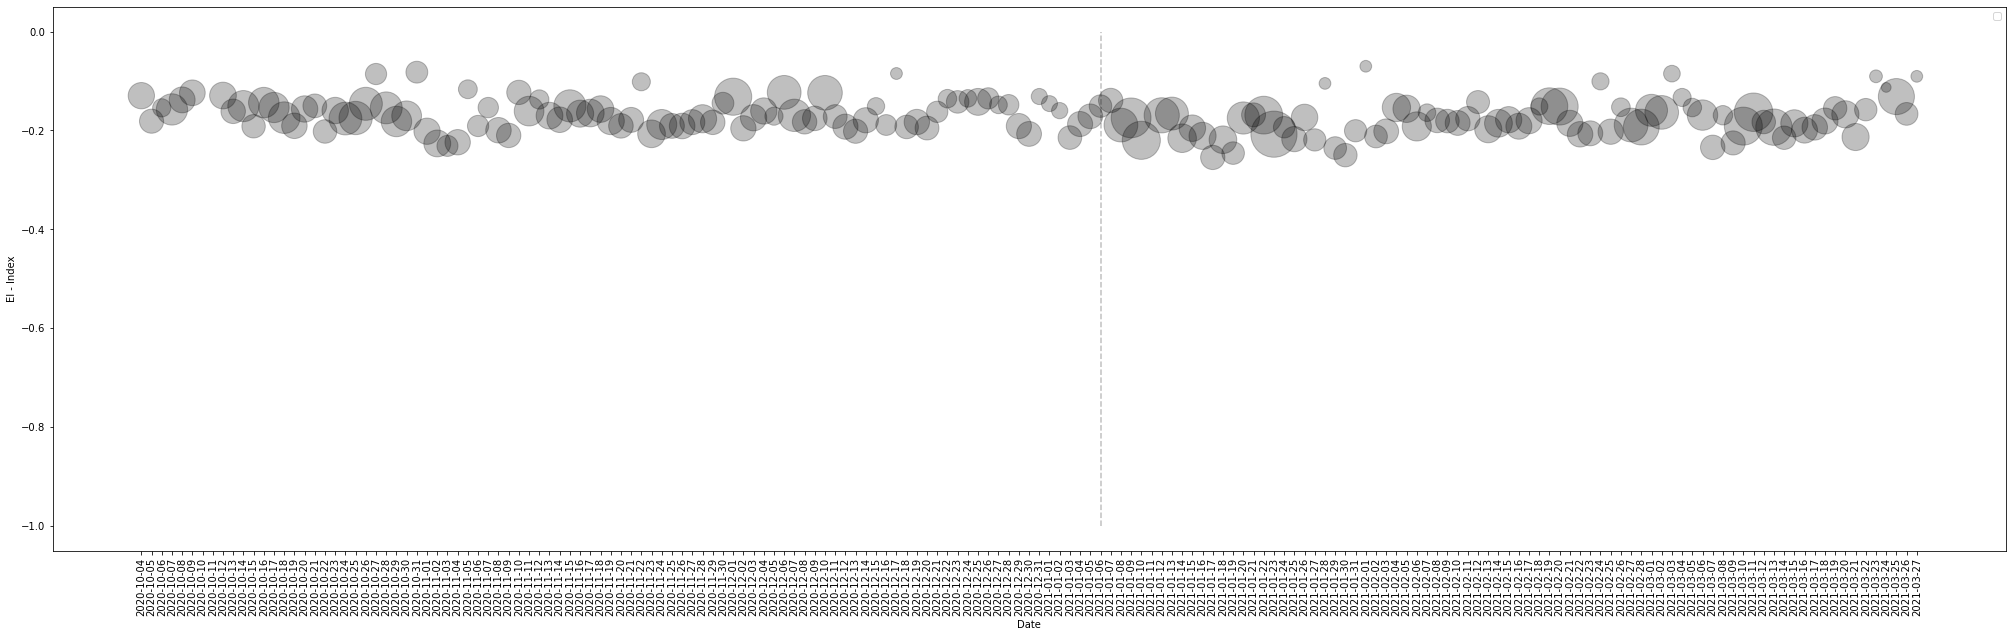

In [36]:
agg_plotter(1,5)

No handles with labels found to put in legend.


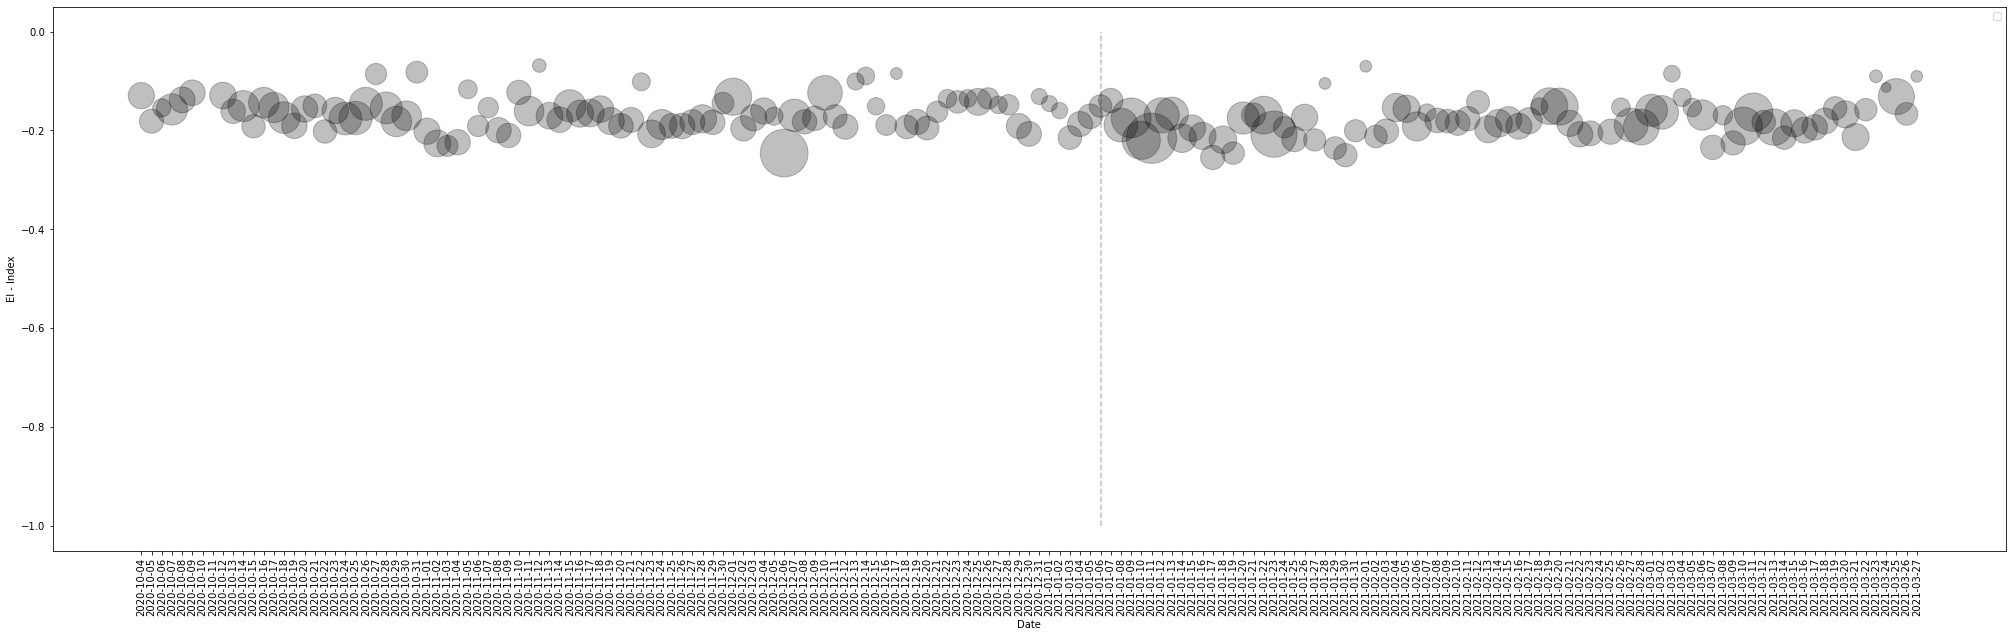

In [37]:
agg_plotter(1,6)

No handles with labels found to put in legend.


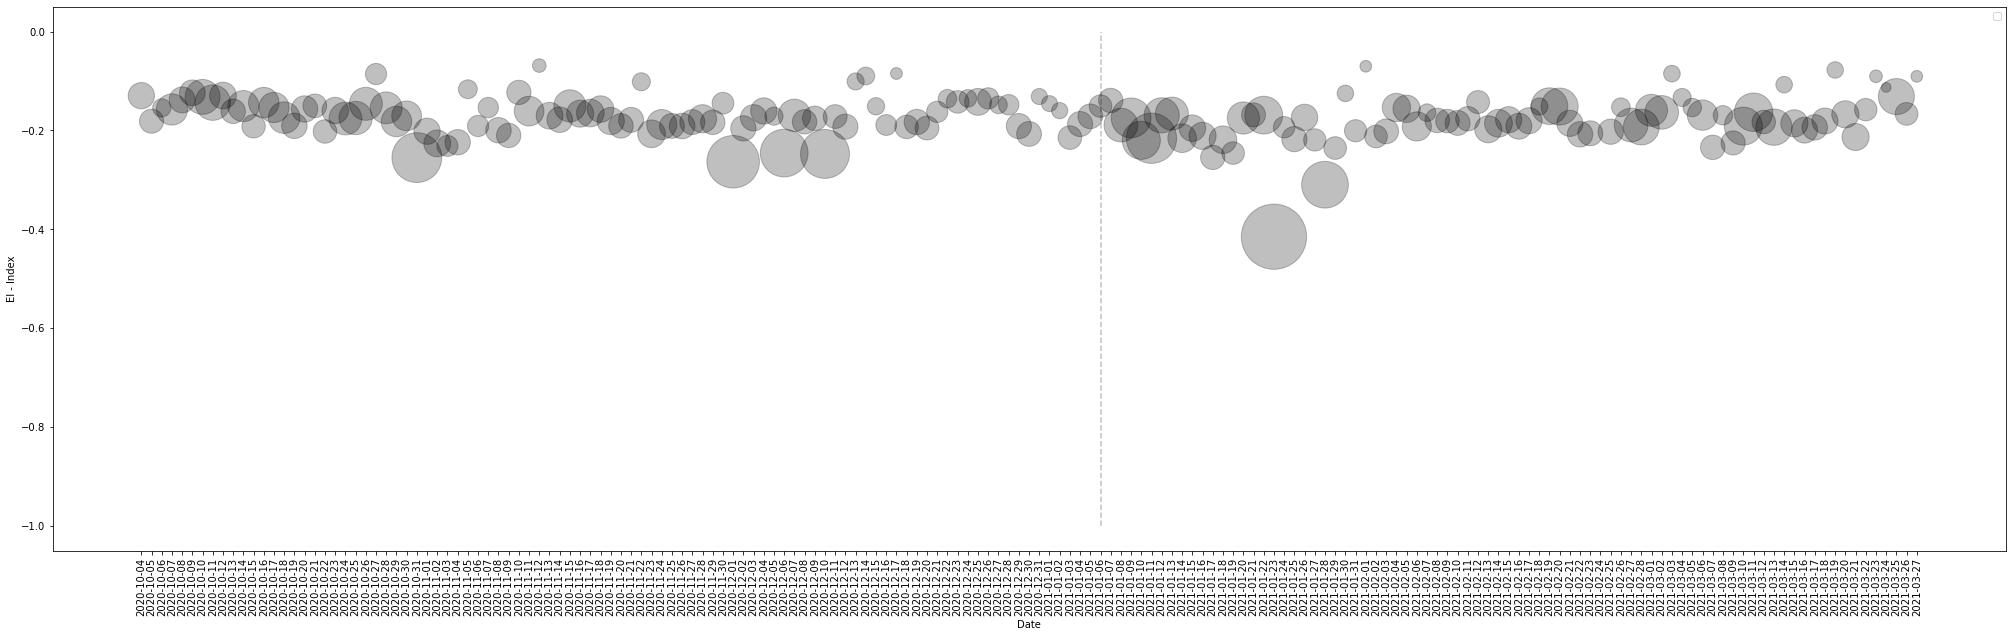

In [38]:
agg_plotter(1,7)

No handles with labels found to put in legend.


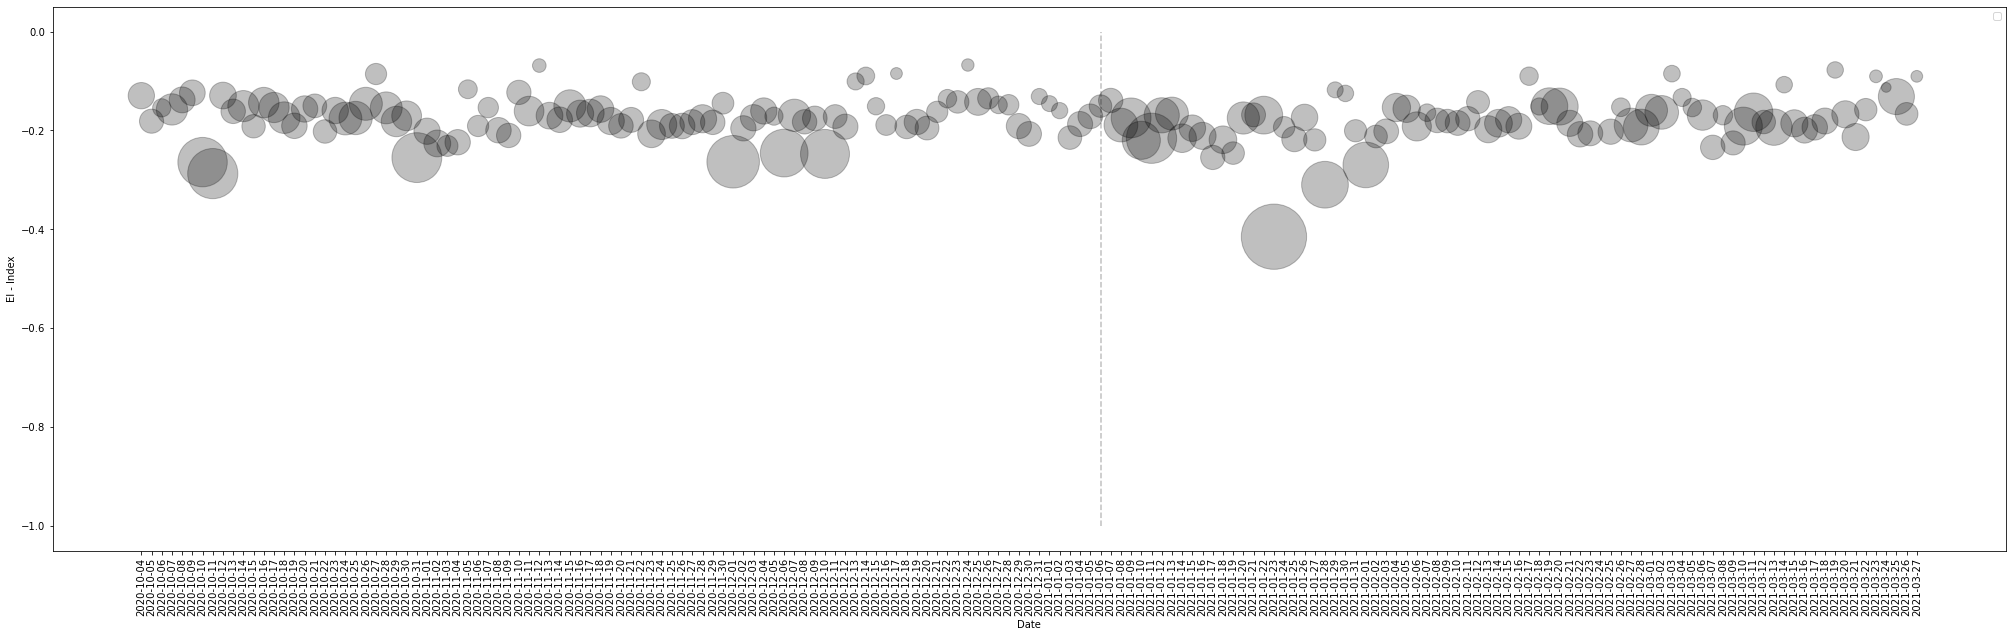

In [67]:
agg_plotter(1,8)

No handles with labels found to put in legend.


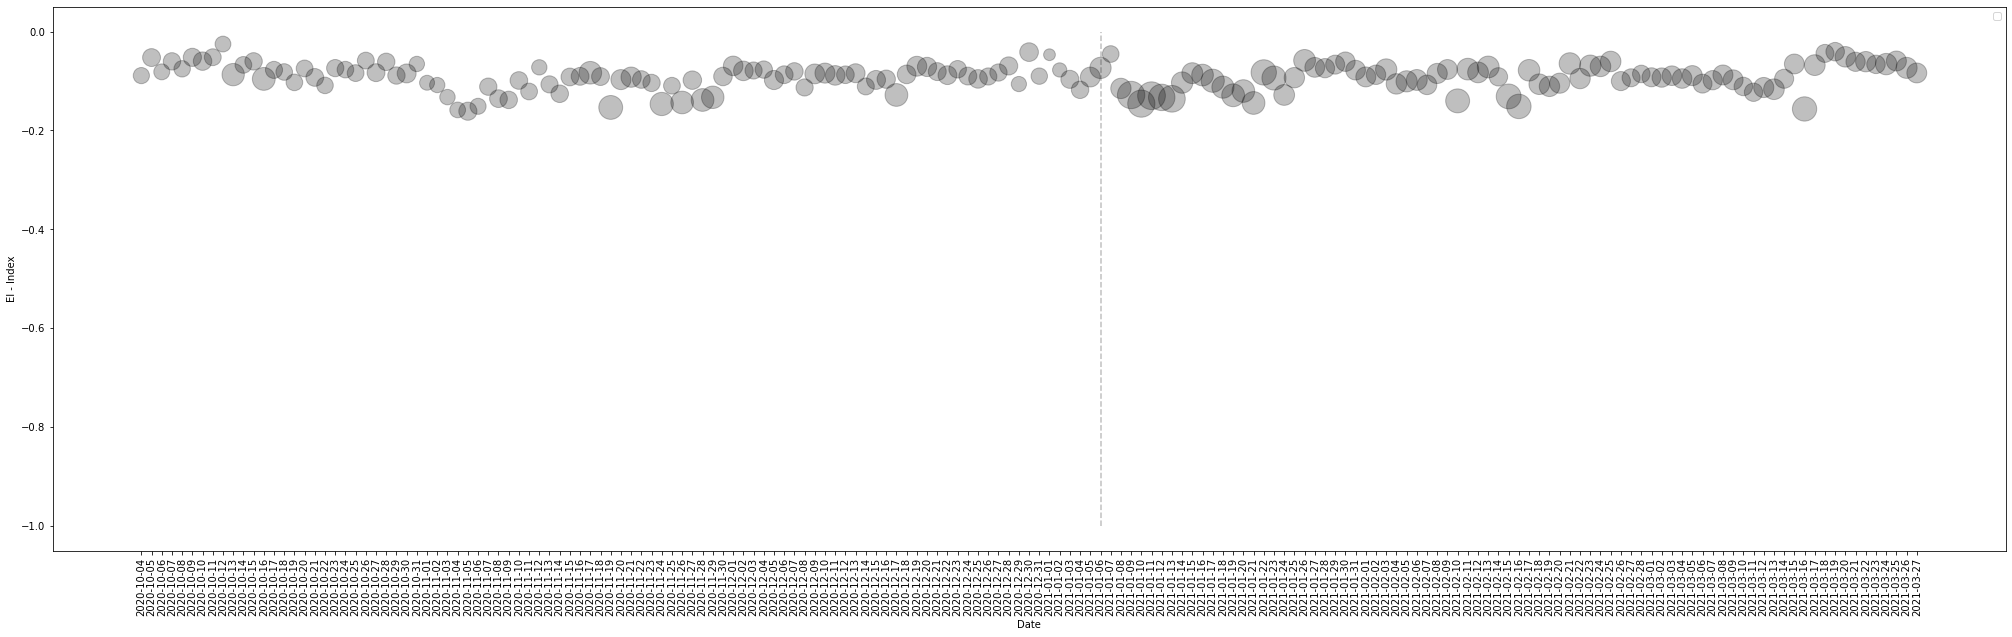

In [68]:
agg_plotter(2,2)

No handles with labels found to put in legend.


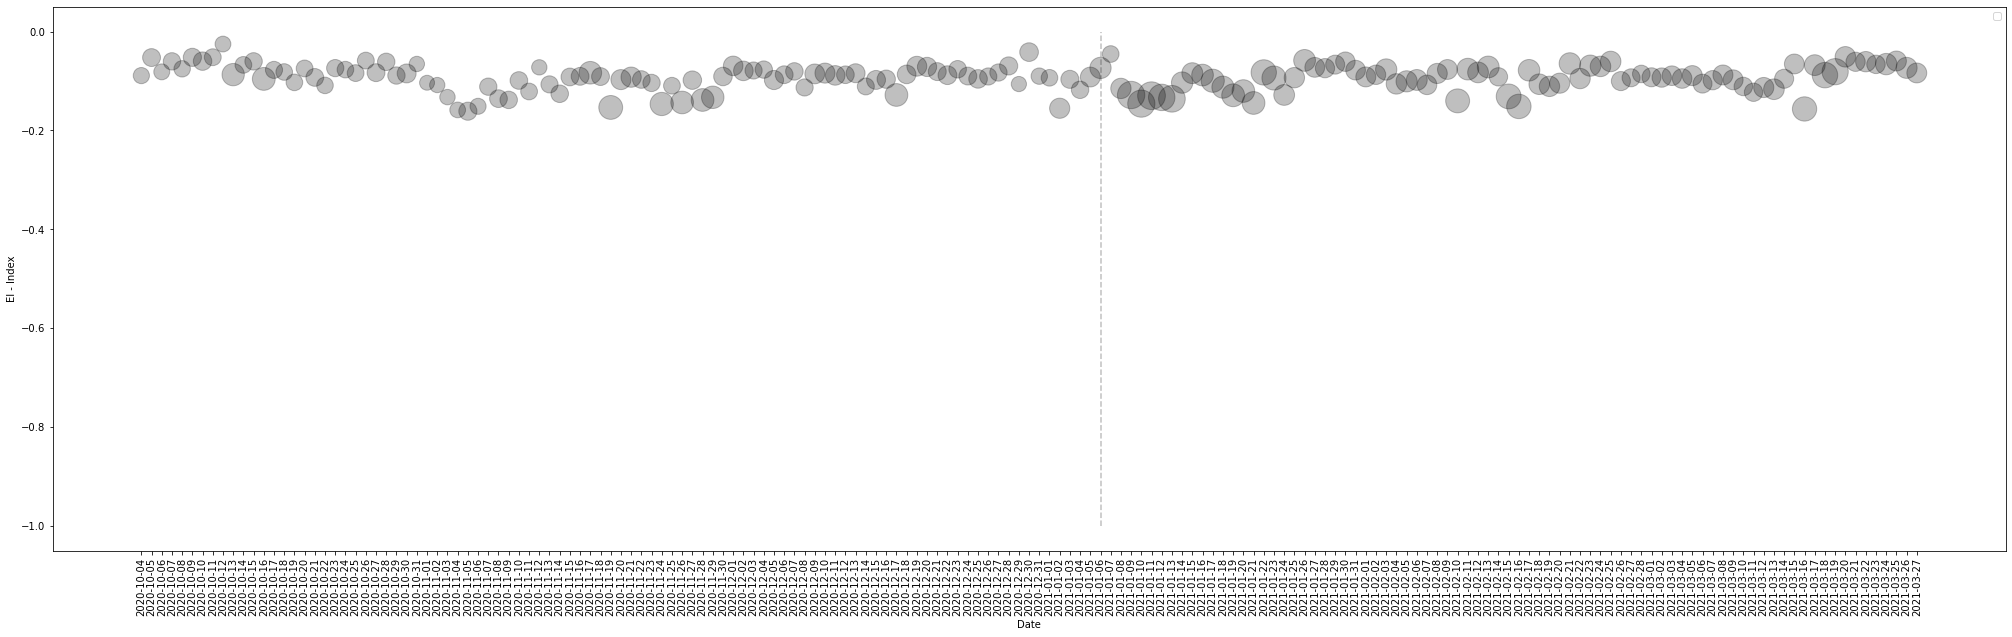

In [39]:
agg_plotter(2,3)

No handles with labels found to put in legend.


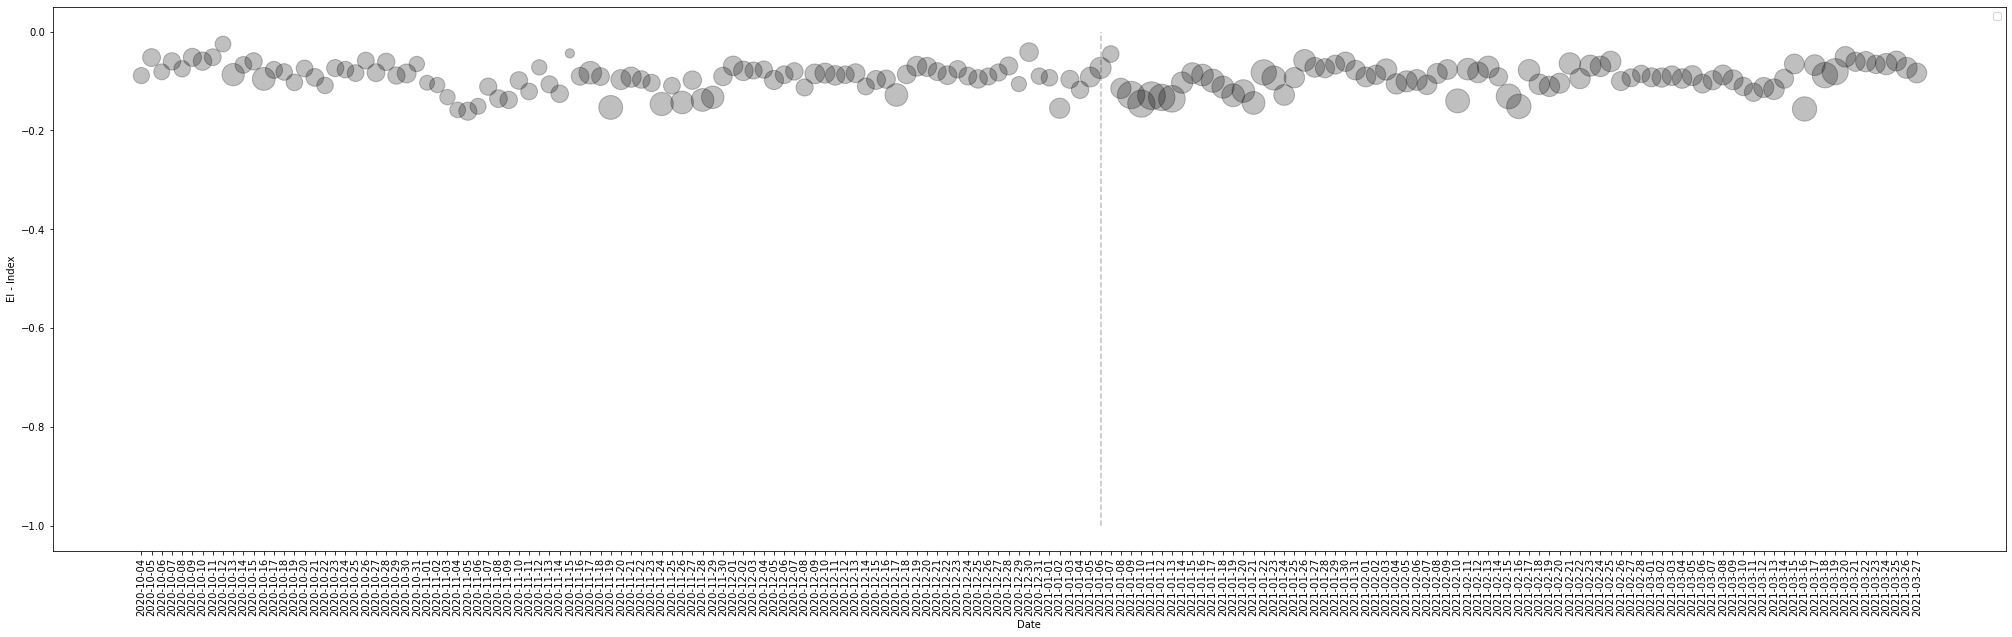

In [40]:
agg_plotter(2,4)

No handles with labels found to put in legend.


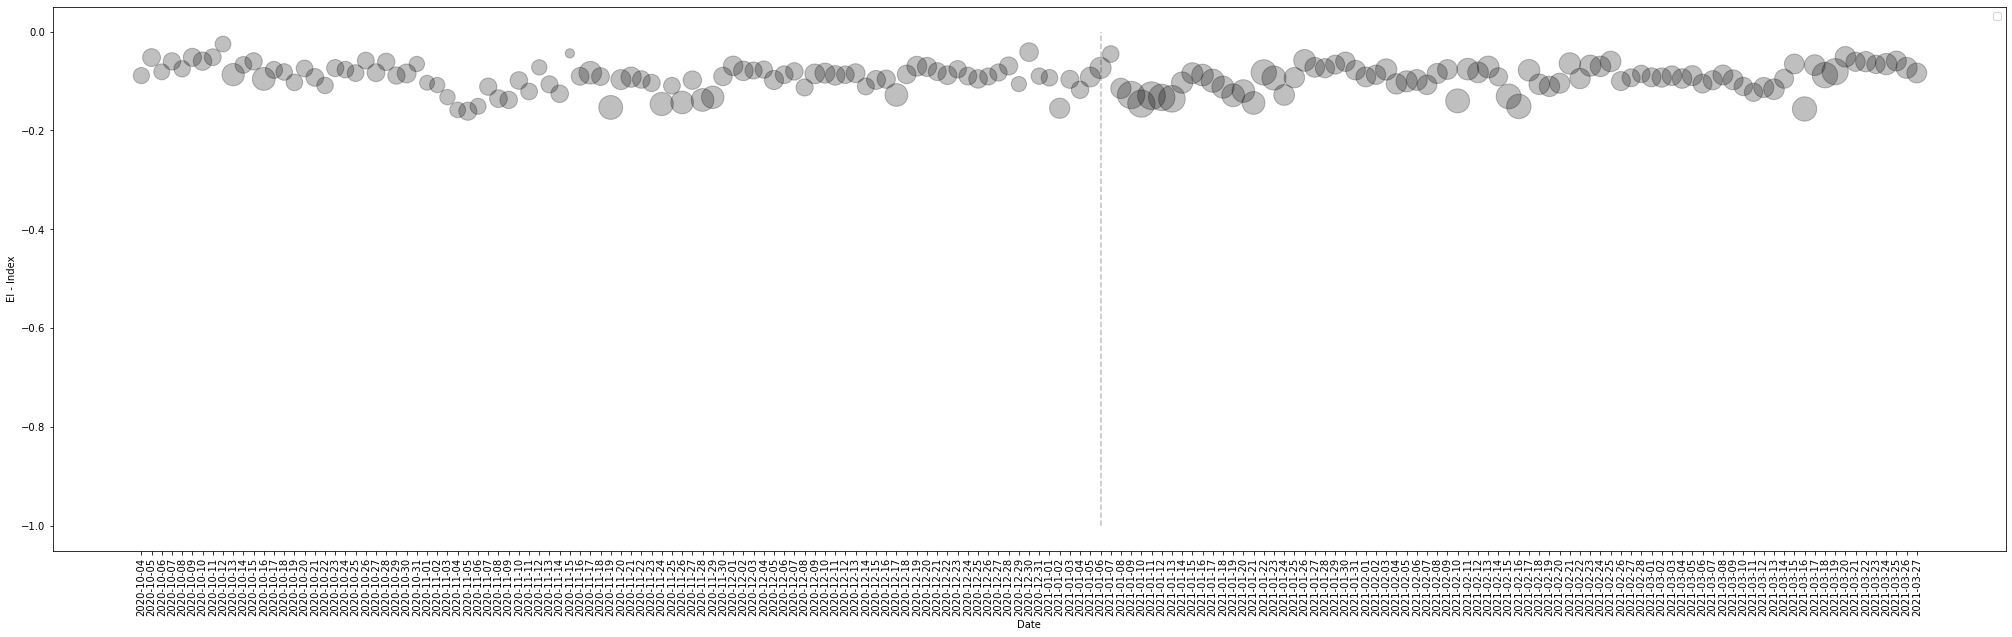

In [41]:
agg_plotter(2,5)

No handles with labels found to put in legend.


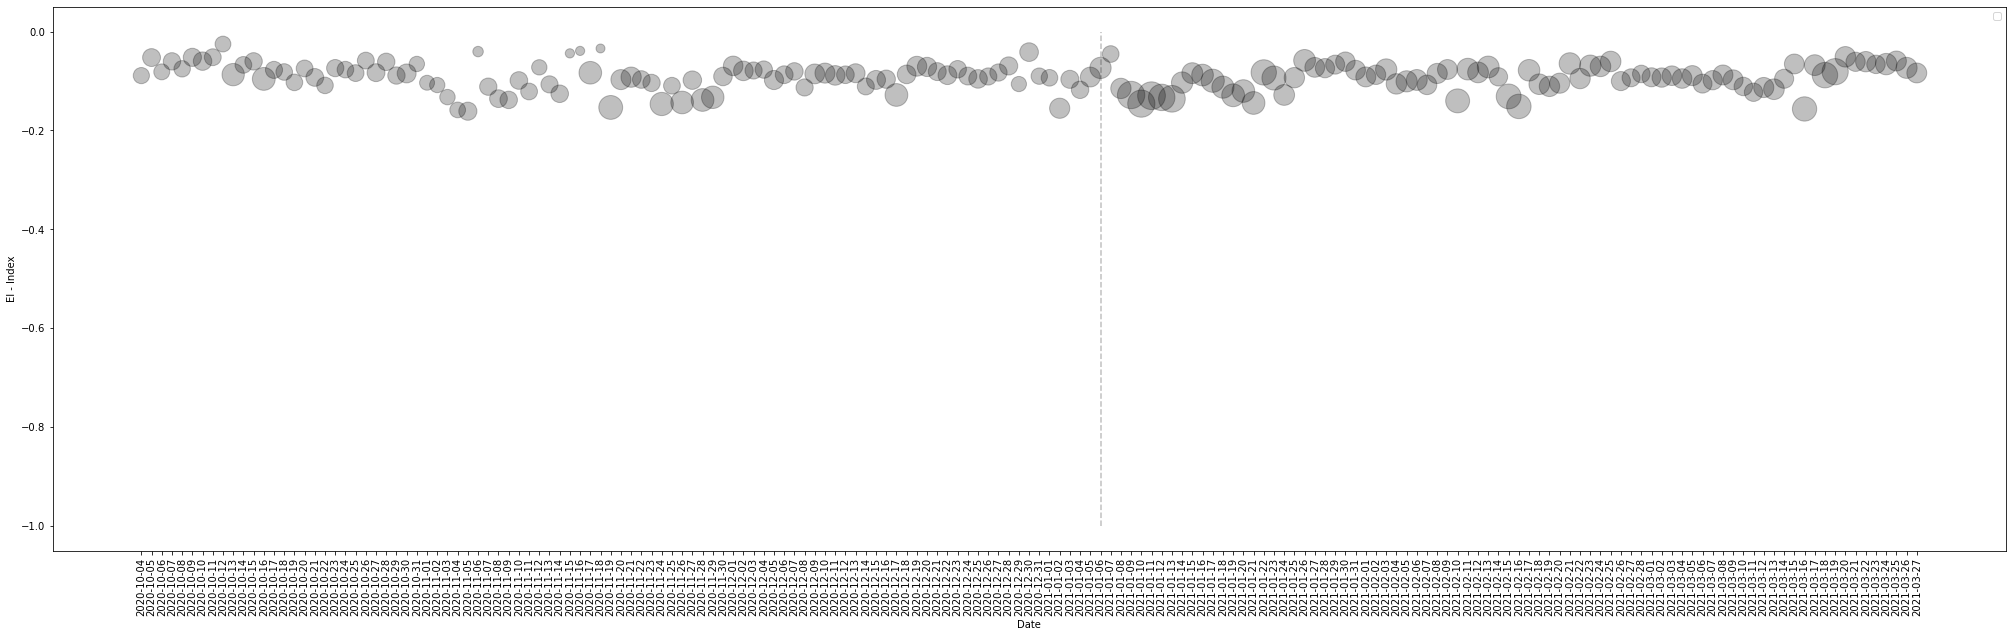

In [42]:
agg_plotter(2,6)

No handles with labels found to put in legend.


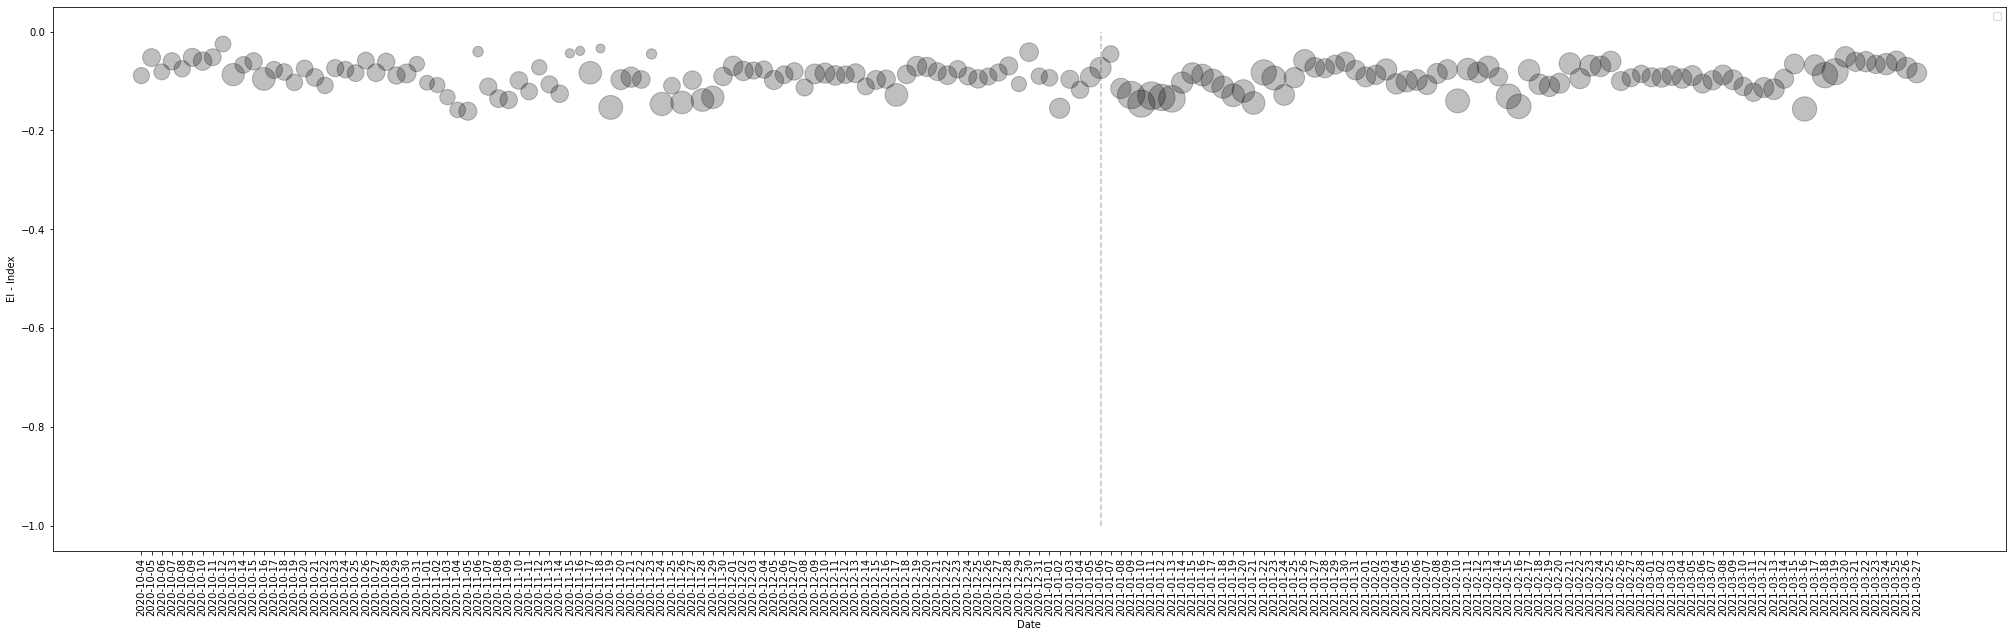

In [43]:
agg_plotter(2,7)

No handles with labels found to put in legend.


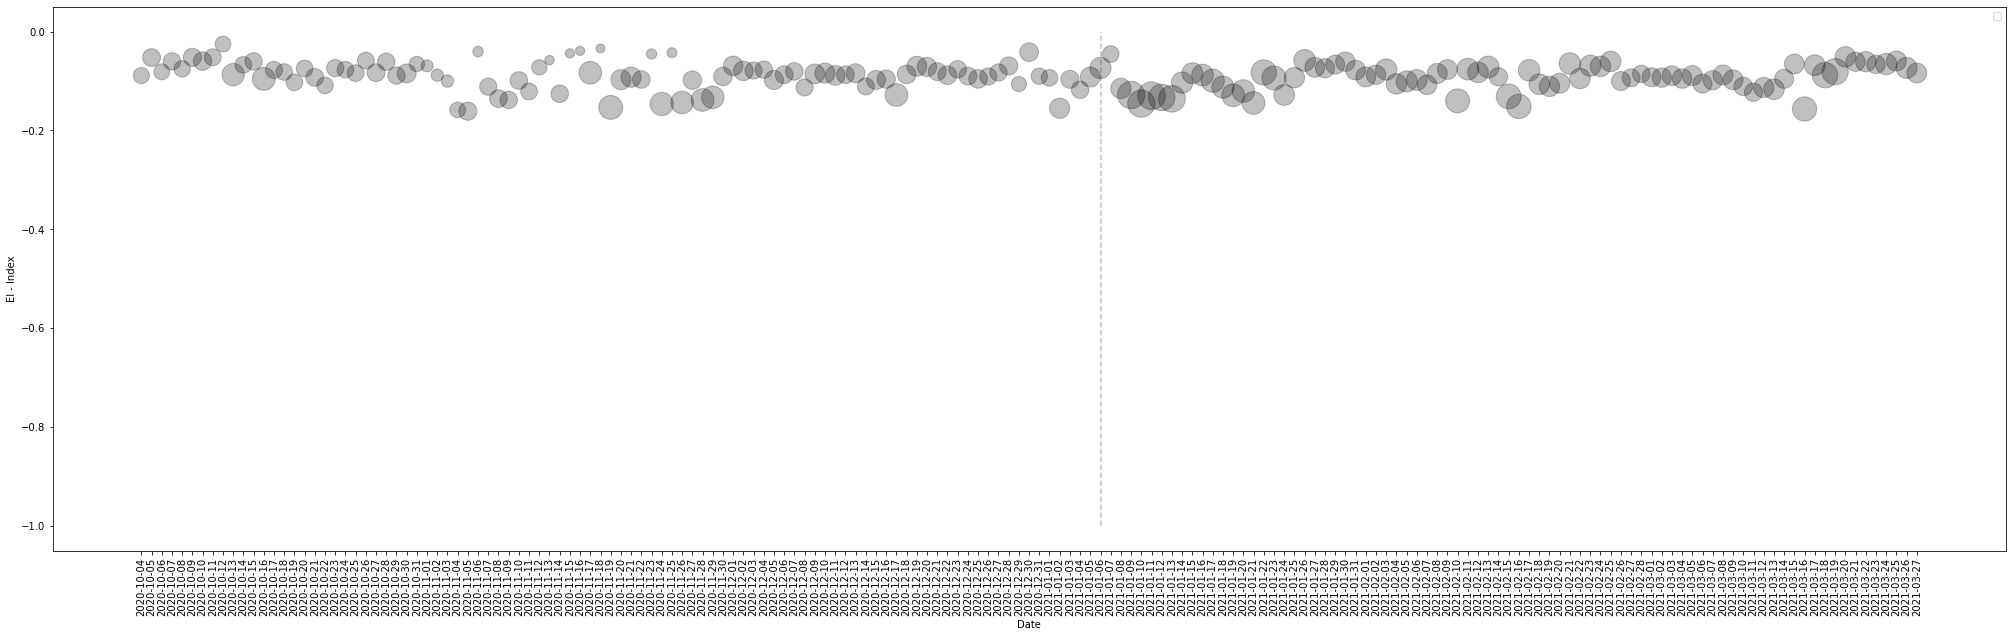

In [69]:
agg_plotter(2,8)

No handles with labels found to put in legend.


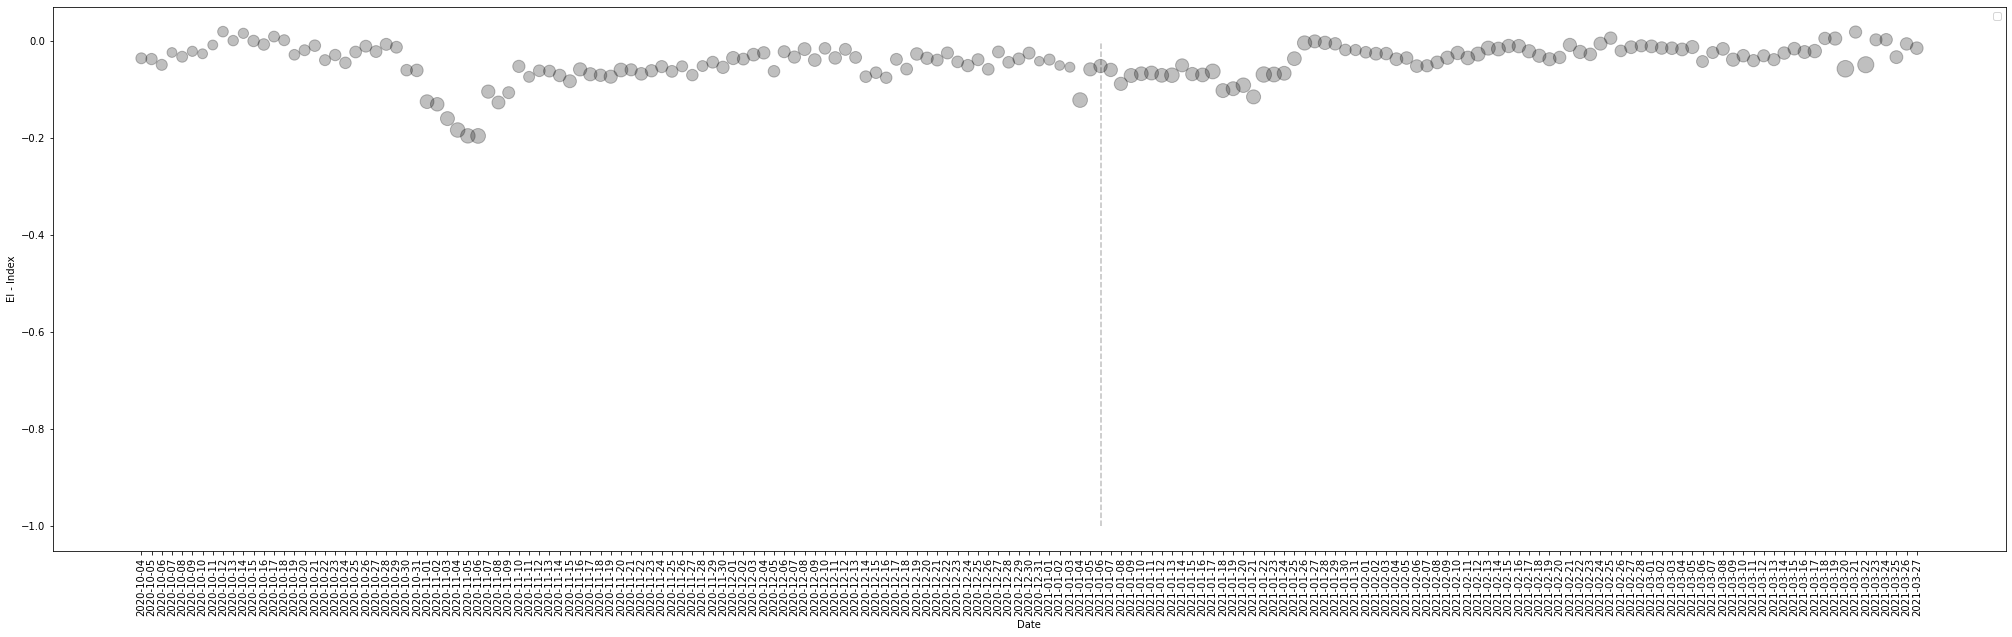

In [70]:
agg_plotter(5,2)

No handles with labels found to put in legend.


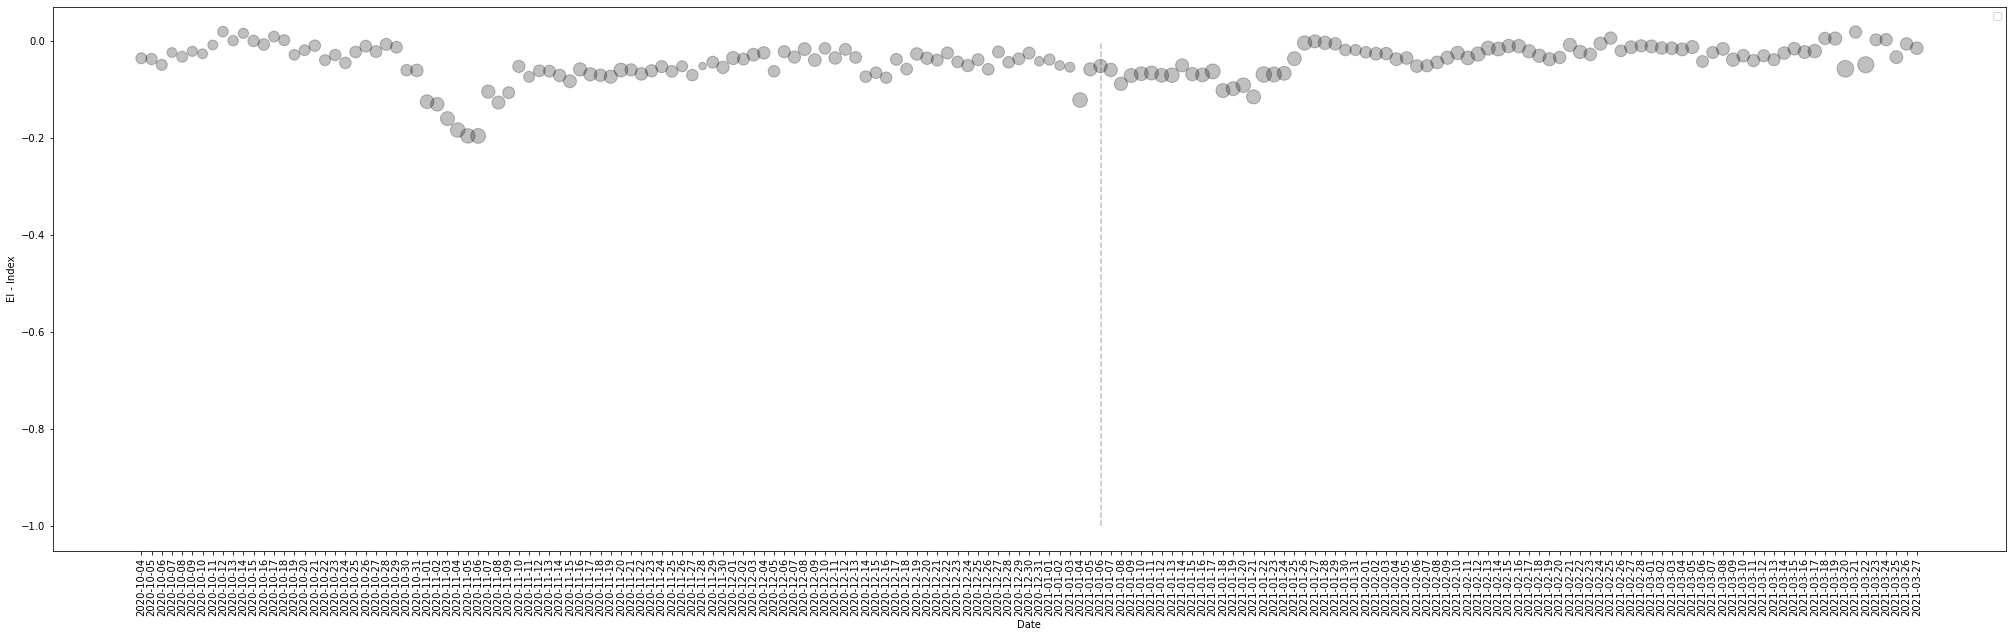

In [74]:
agg_plotter(5,3)

No handles with labels found to put in legend.


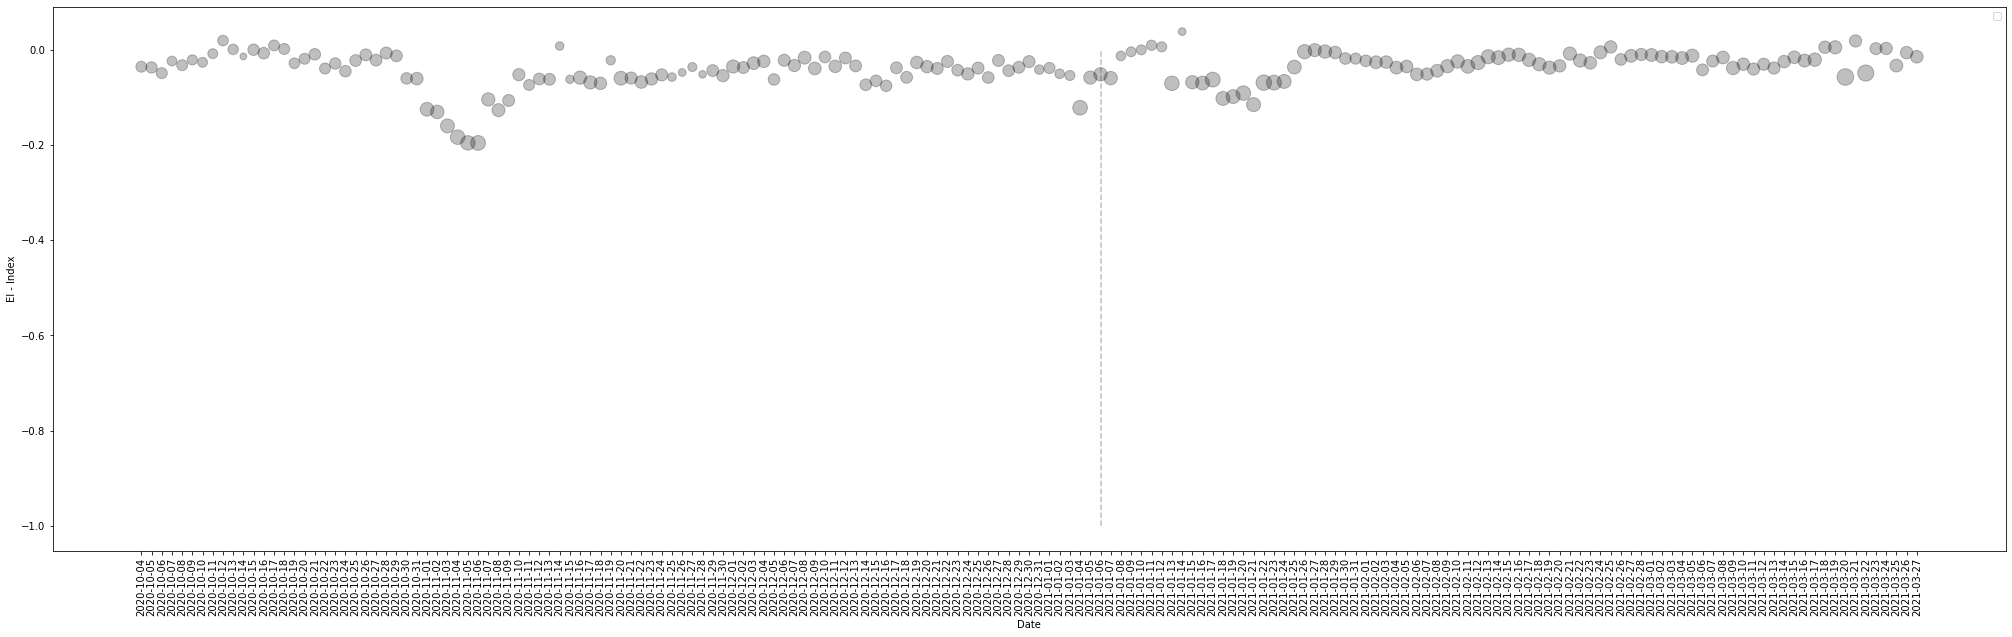

In [45]:
agg_plotter(5,4)

No handles with labels found to put in legend.


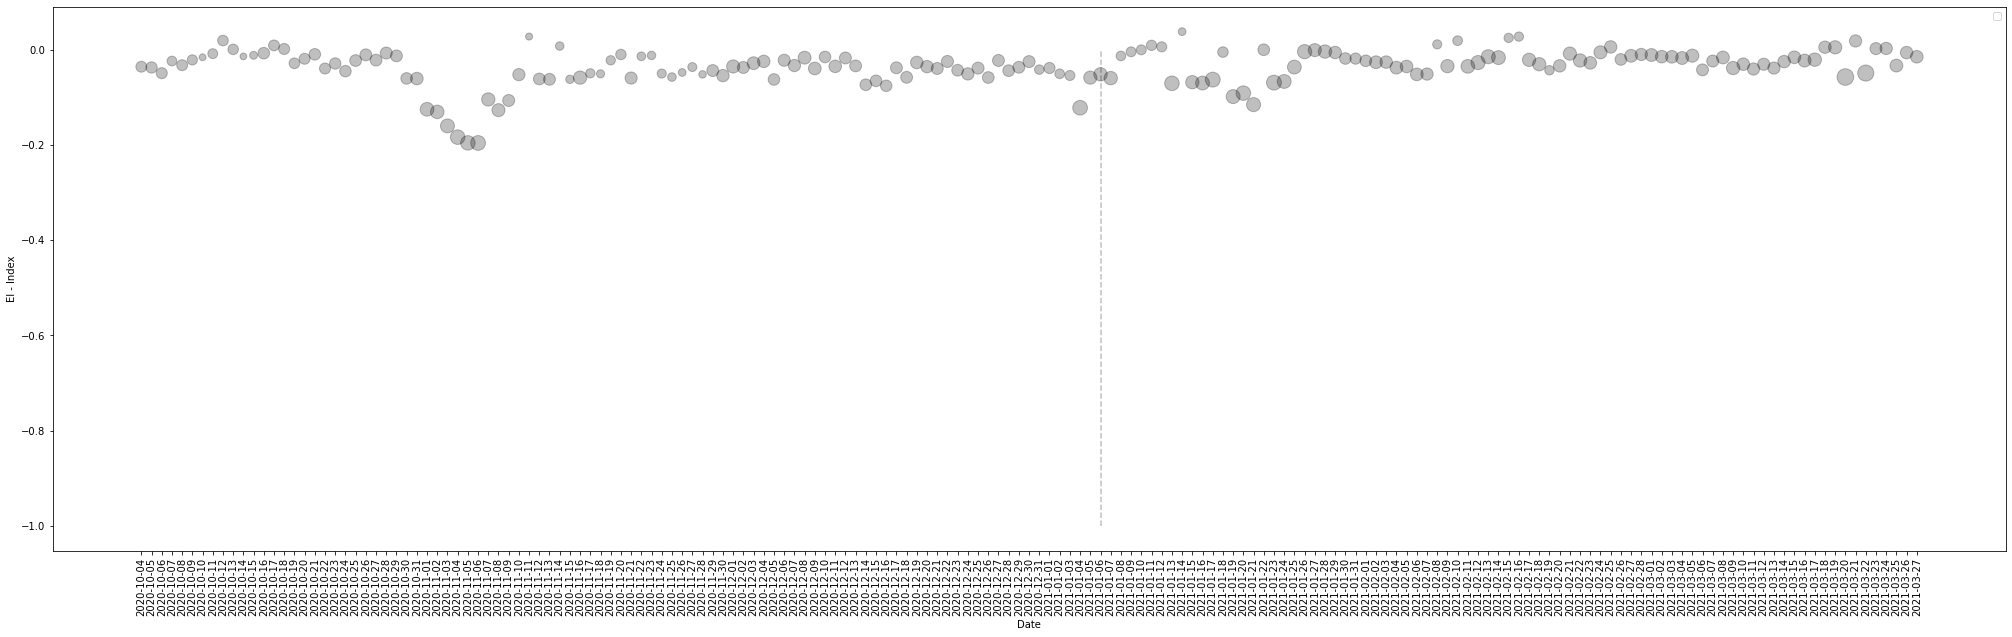

In [46]:
agg_plotter(5,5)

No handles with labels found to put in legend.


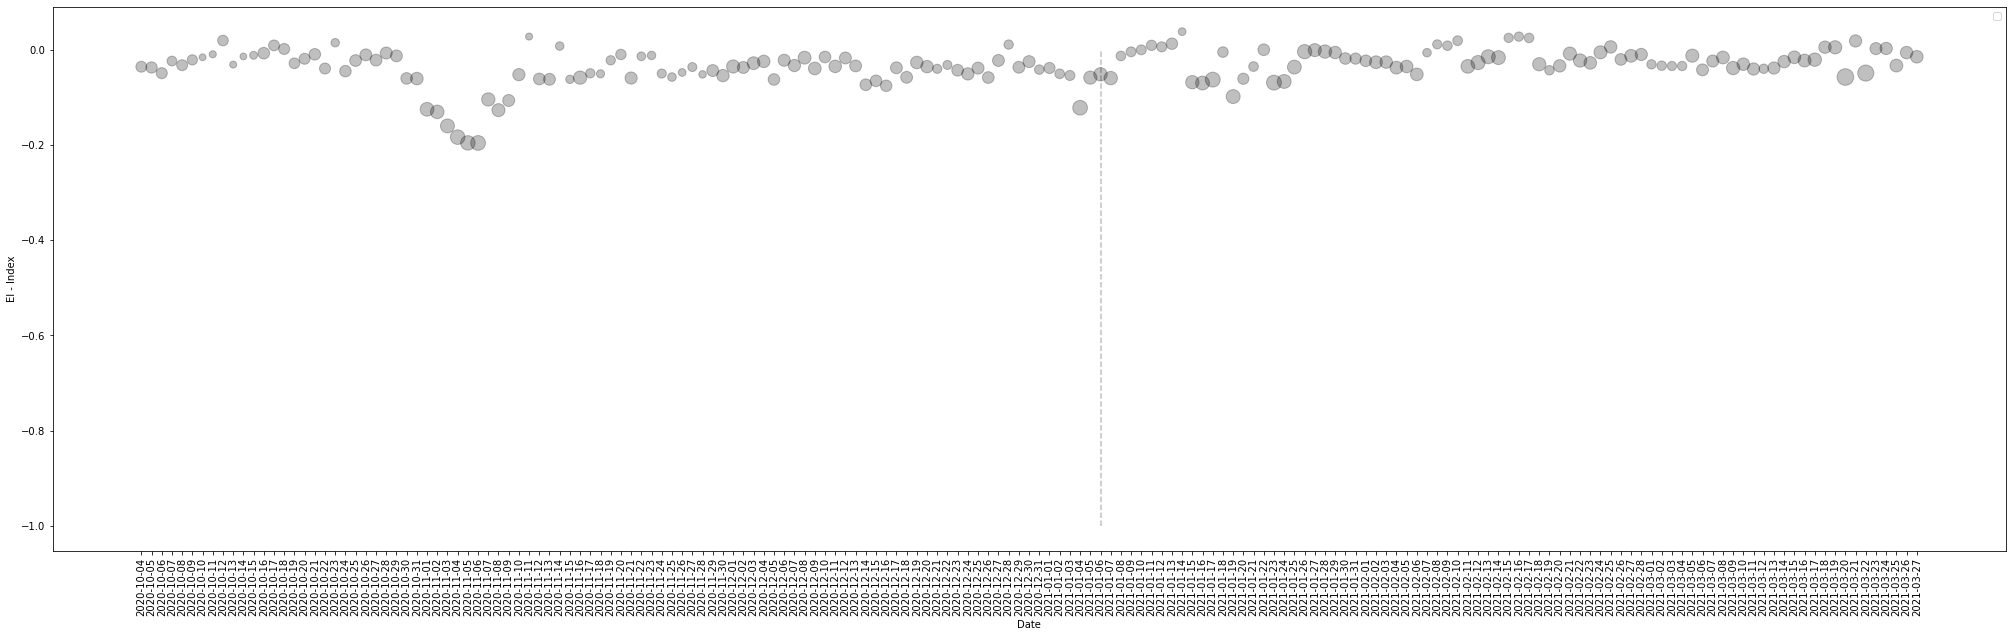

In [47]:
agg_plotter(5,6)

No handles with labels found to put in legend.


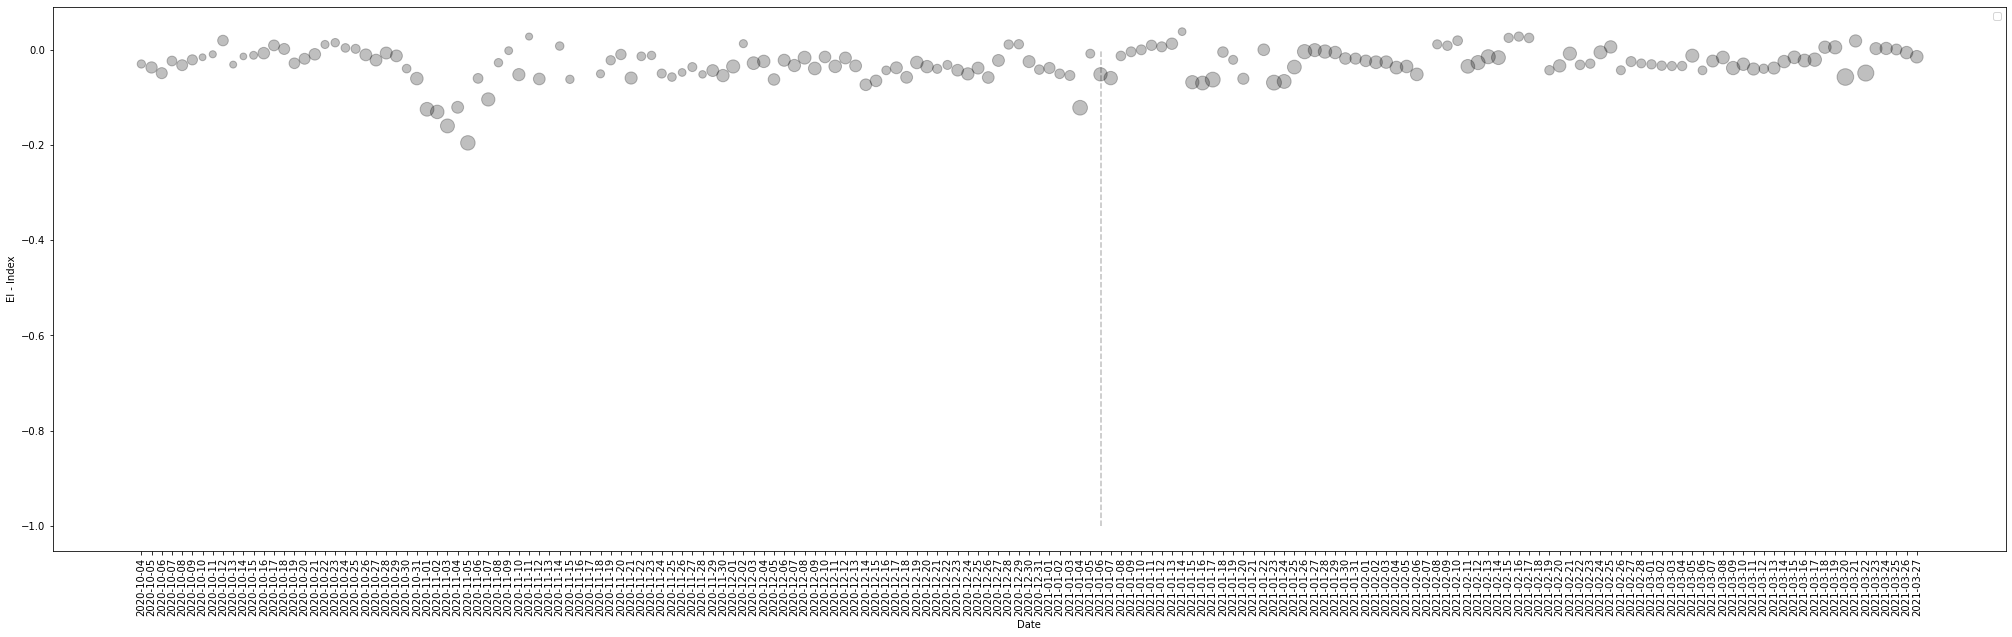

In [48]:
agg_plotter(5,7)

No handles with labels found to put in legend.


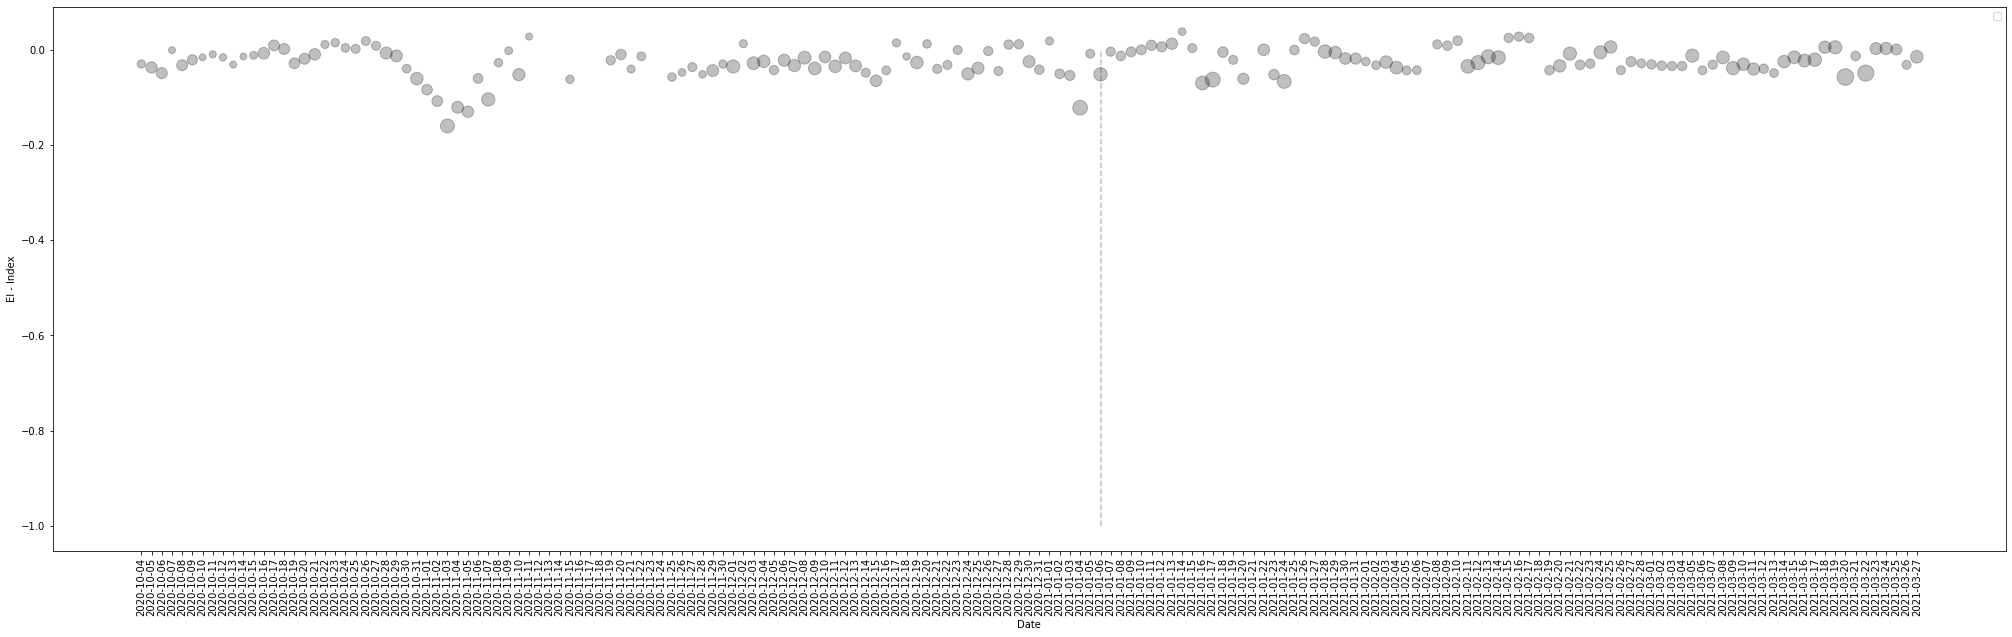

In [71]:
agg_plotter(5,8)

No handles with labels found to put in legend.


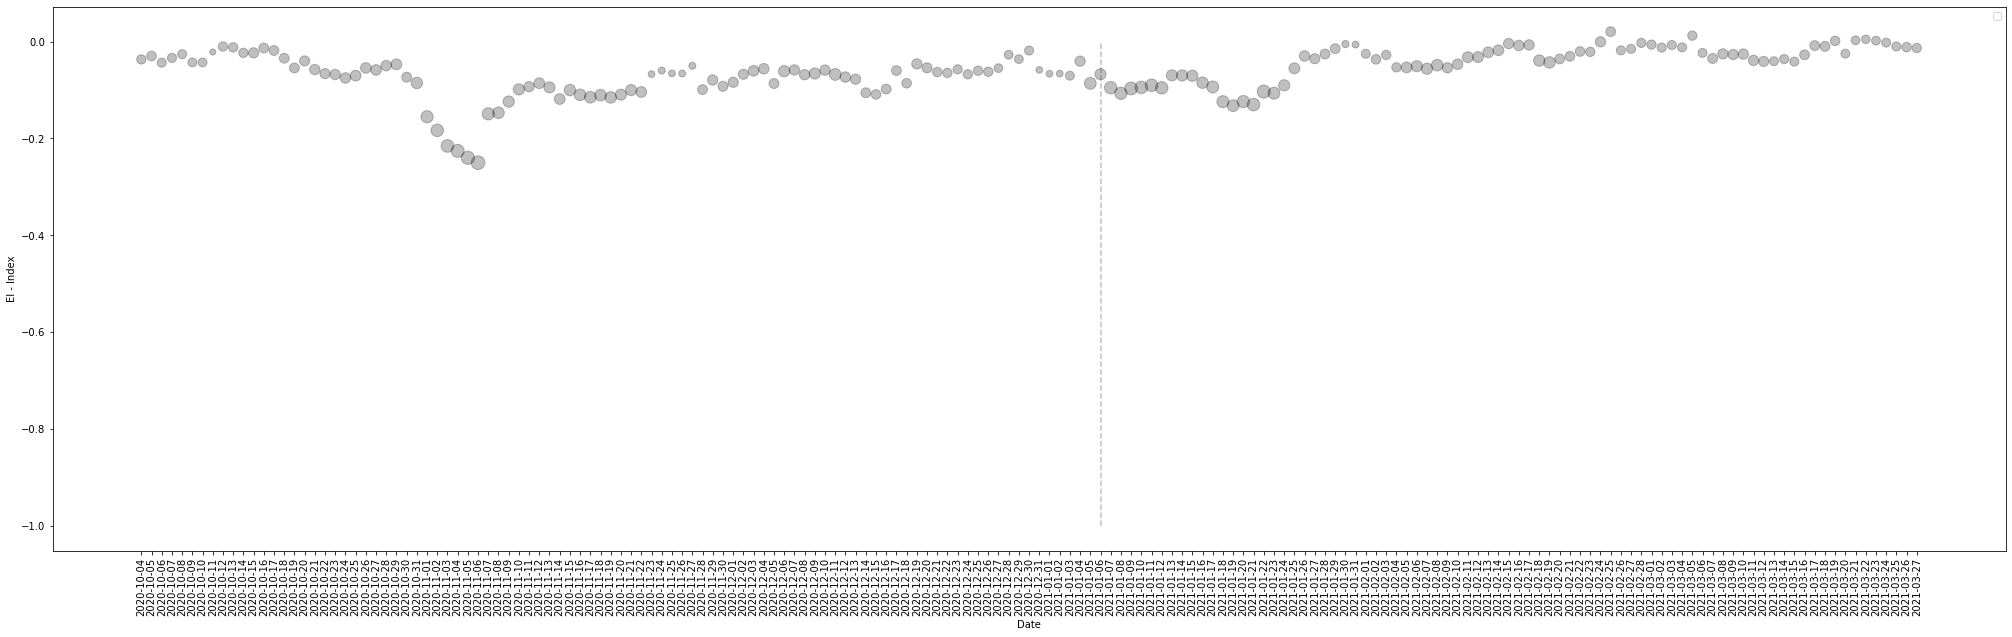

In [72]:
agg_plotter(10,2)

No handles with labels found to put in legend.


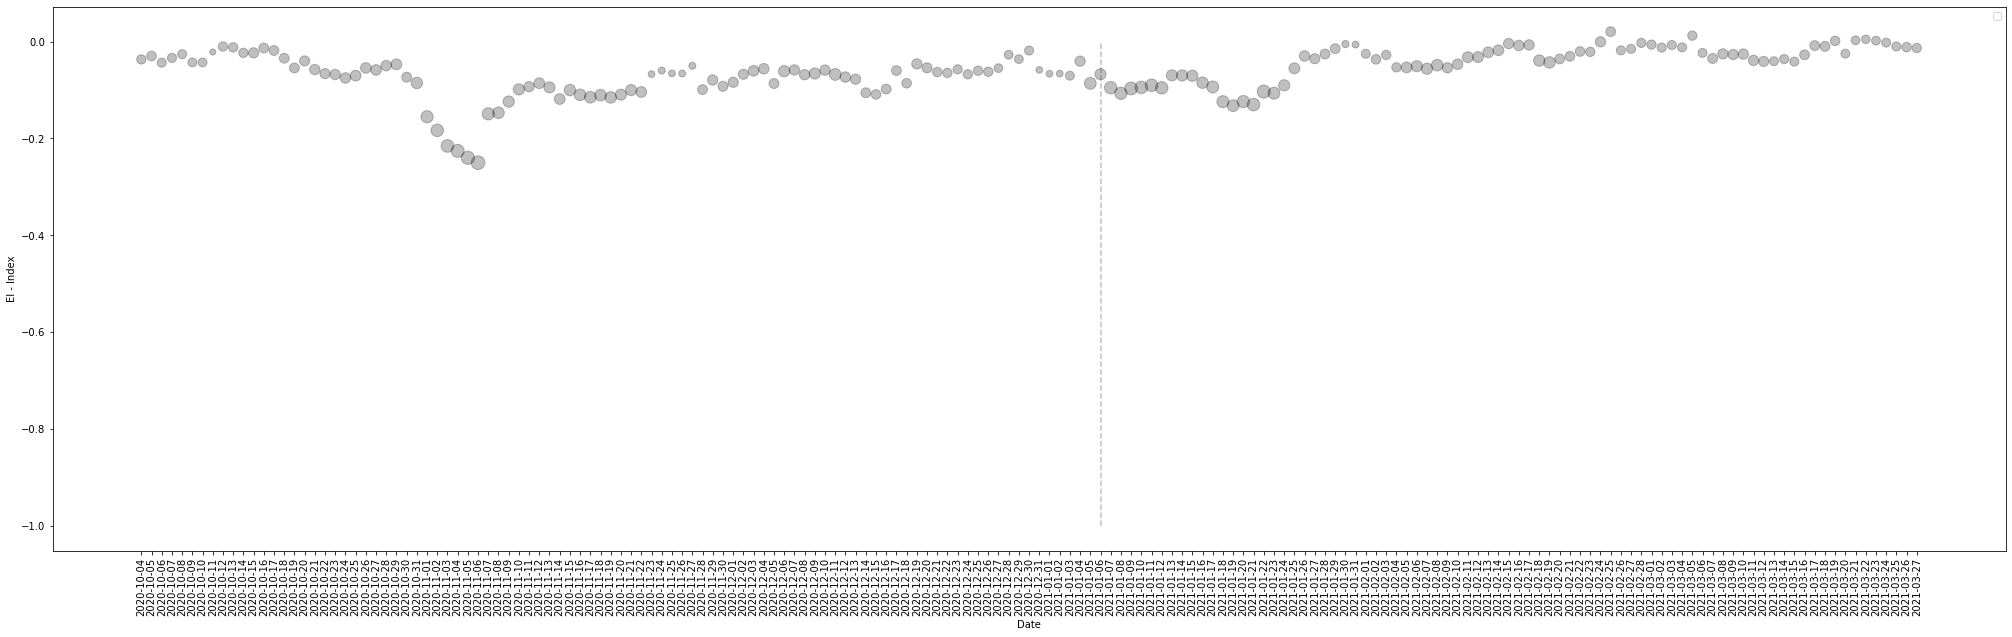

In [49]:
agg_plotter(10,3)

No handles with labels found to put in legend.


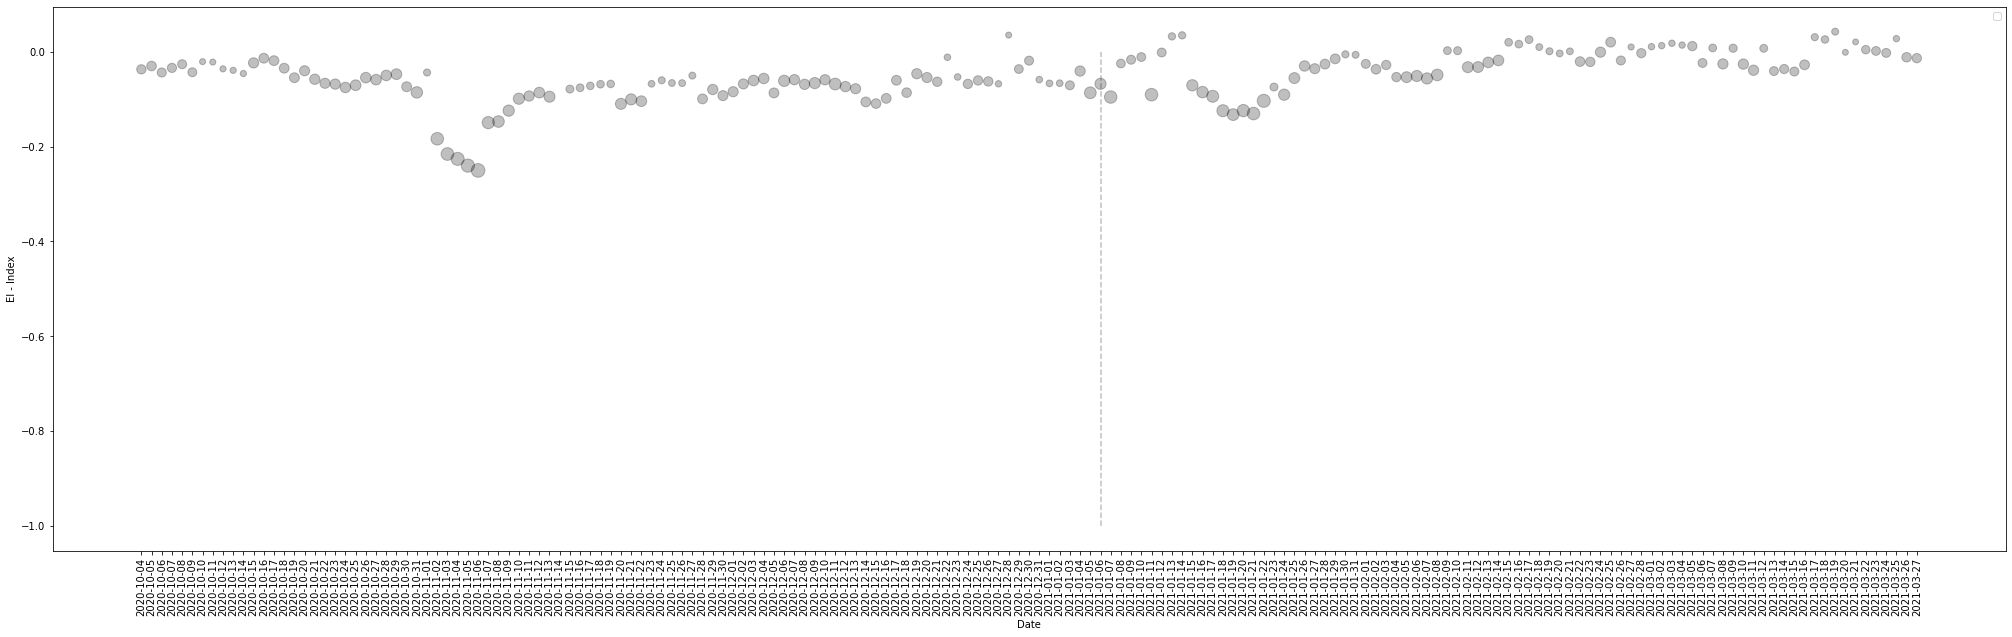

In [50]:
agg_plotter(10,4)

No handles with labels found to put in legend.


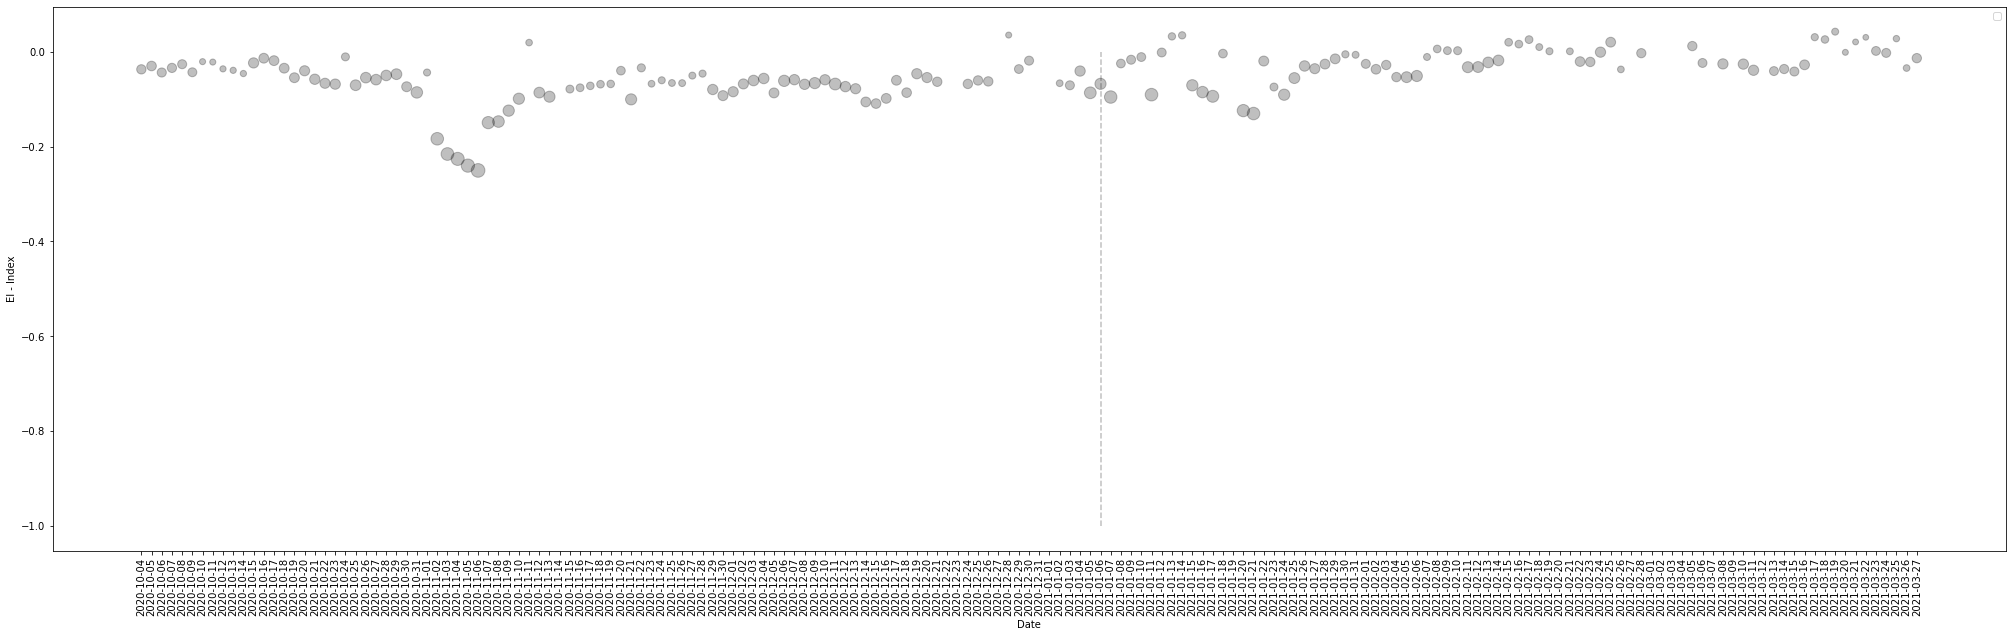

In [51]:
agg_plotter(10,5)

No handles with labels found to put in legend.


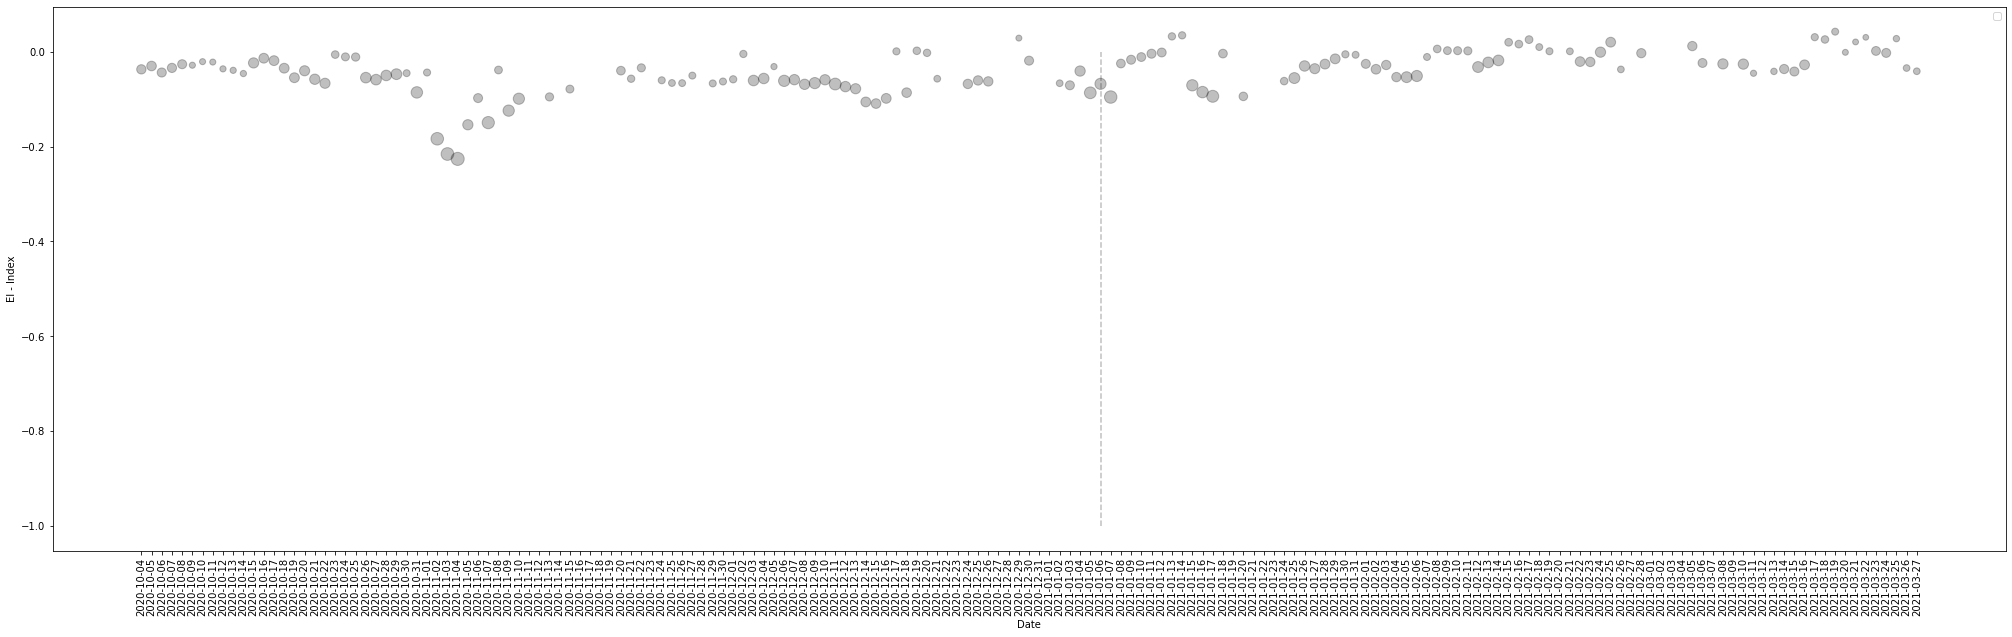

In [52]:
agg_plotter(10,6)

No handles with labels found to put in legend.


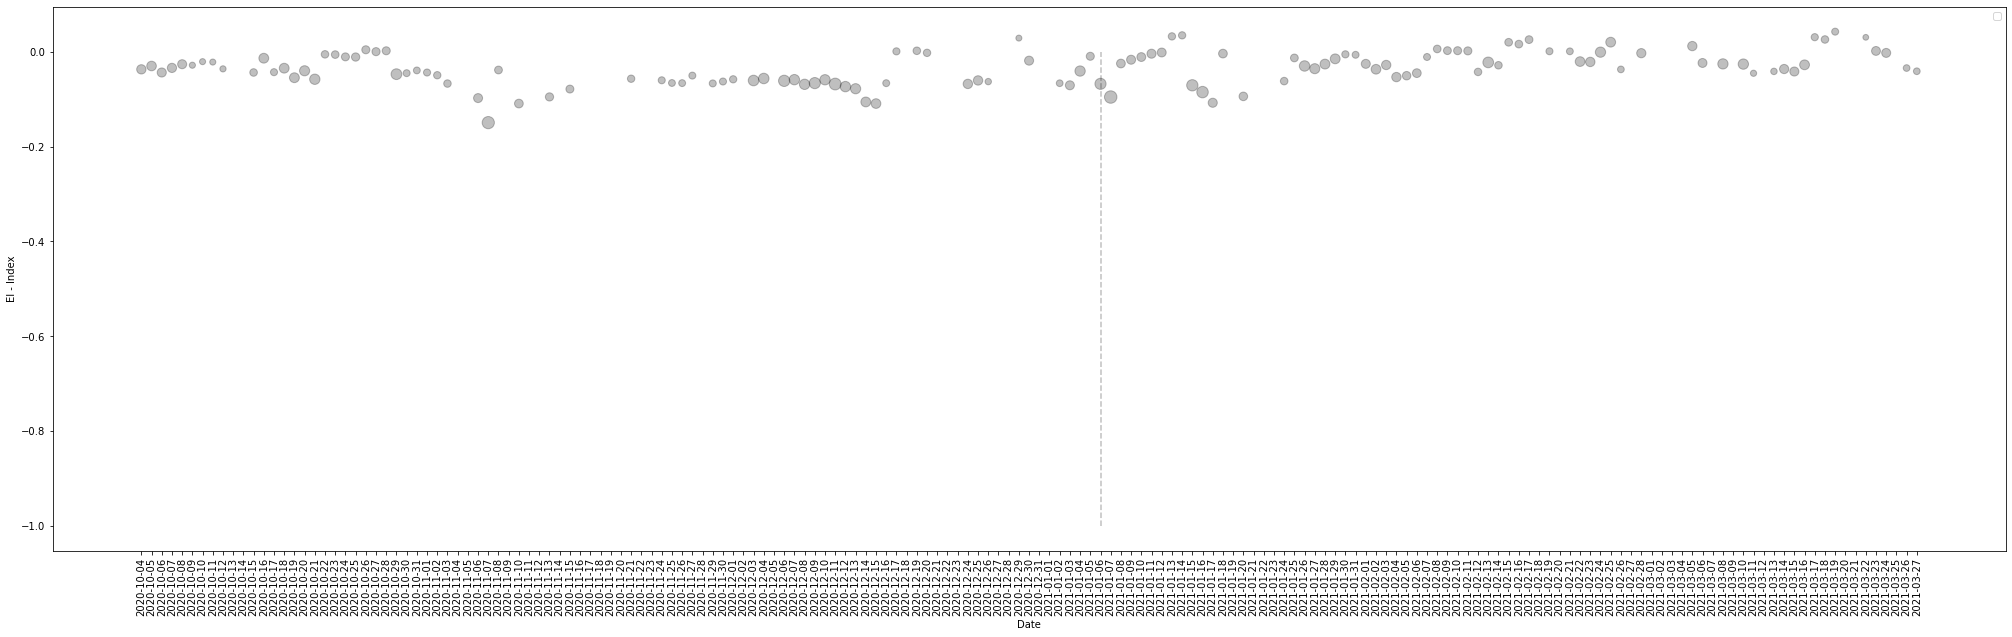

In [53]:
agg_plotter(10,7)

No handles with labels found to put in legend.


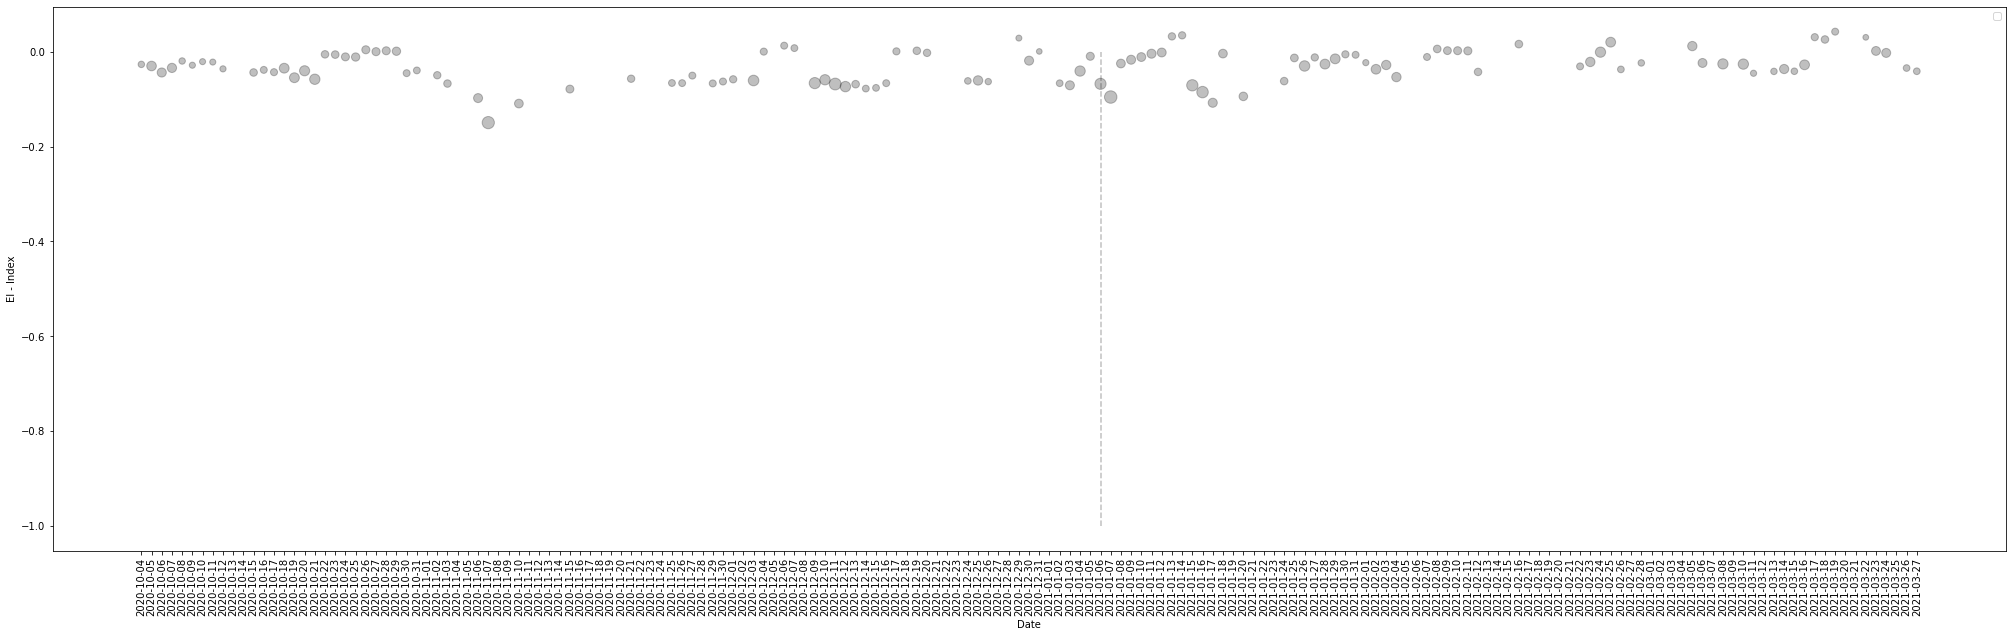

In [73]:
agg_plotter(10,8)

In [ ]:
j=1
k=21
# r=5
r=10
# n=5
# n=10
# n=15
n=25

date = '2021-01-06'

ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
# top_50 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(50)
# top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
# top_125 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(125)
top_250 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(250)
comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
# top_ns_50 = comm_sub_pairs.loc[top_50.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
# top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
# top_ns_125 = comm_sub_pairs.loc[top_125.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
top_ns_250 = comm_sub_pairs.loc[top_250.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)

# top_ns_50
# print(top_ns_75)
# print(top_ns_125)
print(top_ns_250)

In [ ]:
comm_sub_pairs.loc[top_250.index].groupby('Source_Level').apply(lambda x: x.sum()).sort_values(by='Count', ascending=False).head(150)

In [109]:
r=10

In [ ]:
politics_tl = []
politics_ei = []
politics_dt = []
n=1
# n=10
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['politics']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        politics_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        politics_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        politics_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
guns_tl = []
guns_ei = []
guns_dt = []
n=5
# n=10
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['guns']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        guns_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        guns_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        guns_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
conspiracy_tl = []
conspiracy_ei = []
conspiracy_dt = []
n=3
# n=10
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['conspiracy']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        conspiracy_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        conspiracy_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        conspiracy_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
conservative_tl = []
conservative_ei = []
conservative_dt = []
n=1
# n=10
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['conservative']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        conservative_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        conservative_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        conservative_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
wallstreetbets_tl = []
wallstreetbets_ei = []
wallstreetbets_dt = []
n=1
# n=10
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['wallstreetbets']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        wallstreetbets_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        wallstreetbets_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        wallstreetbets_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
ukpolitics_tl = []
ukpolitics_ei = []
ukpolitics_dt = []
n=3
# n=10
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['ukpolitics']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        ukpolitics_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        ukpolitics_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        ukpolitics_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
democrats_tl = []
democrats_ei = []
democrats_dt = []
n=15
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(300)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['democrats']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        democrats_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        democrats_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        democrats_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
wayofthebern_tl = []
wayofthebern_ei = []
wayofthebern_dt = []
n=15
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(300)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['wayofthebern']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        wayofthebern_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        wayofthebern_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        wayofthebern_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
neoliberal_tl = []
neoliberal_ei = []
neoliberal_dt = []
n=2
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(300)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['neoliberal']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        neoliberal_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        neoliberal_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        neoliberal_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
joebiden_tl = []
joebiden_ei = []
joebiden_dt = []
n=3
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(250)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['joebiden']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        joebiden_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        joebiden_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        joebiden_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
genzedong_tl = []
genzedong_ei = []
genzedong_dt = []
n=3
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(250)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['genzedong']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        genzedong_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        genzedong_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        genzedong_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
news_tl = []
news_ei = []
news_dt = []
n=3
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['news']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        news_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        news_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        news_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
teenagers_tl = []
teenagers_ei = []
teenagers_dt = []
n=2
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['teenagers']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        teenagers_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        teenagers_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        teenagers_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
distantsocializing_tl = []
distantsocializing_ei = []
distantsocializing_dt = []
n=3
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['distantsocializing']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        distantsocializing_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        distantsocializing_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        distantsocializing_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
formula1_tl = []
formula1_ei = []
formula1_dt = []
n=10
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['formula1']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        formula1_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        formula1_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        formula1_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
cryptocurrency_tl = []
cryptocurrency_ei = []
cryptocurrency_dt = []
n=10
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['cryptocurrency']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        cryptocurrency_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        cryptocurrency_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        cryptocurrency_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
bitcoin_tl = []
bitcoin_ei = []
bitcoin_dt = []
n=5
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['bitcoin']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        bitcoin_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        bitcoin_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        bitcoin_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
soccer_tl = []
soccer_ei = []
soccer_dt = []
n=1
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['soccer']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        soccer_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        soccer_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        soccer_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
publicfreakout_tl = []
publicfreakout_ei = []
publicfreakout_dt = []
n=3
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['publicfreakout']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        publicfreakout_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        publicfreakout_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        publicfreakout_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
dankmemes_tl = []
dankmemes_ei = []
dankmemes_dt = []
n=3
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['dankmemes']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        dankmemes_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        dankmemes_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        dankmemes_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
memes_tl = []
memes_ei = []
memes_dt = []
n=1
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['memes']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        memes_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        memes_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        memes_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
cringetopia_tl = []
cringetopia_ei = []
cringetopia_dt = []
n=3
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['cringetopia']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        cringetopia_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        cringetopia_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        cringetopia_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
changemyview_tl = []
changemyview_ei = []
changemyview_dt = []
n=10
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(300)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['changemyview']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        changemyview_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        changemyview_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        changemyview_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
nfl_tl = []
nfl_ei = []
nfl_dt = []
n=1
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['nfl']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        nfl_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        nfl_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        nfl_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
nba_tl = []
nba_ei = []
nba_dt = []
n=2
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['nba']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        nba_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        nba_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        nba_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
askreddit_tl = []
askreddit_ei = []
askreddit_dt = []
n=1
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['askreddit']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        askreddit_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        askreddit_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        askreddit_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

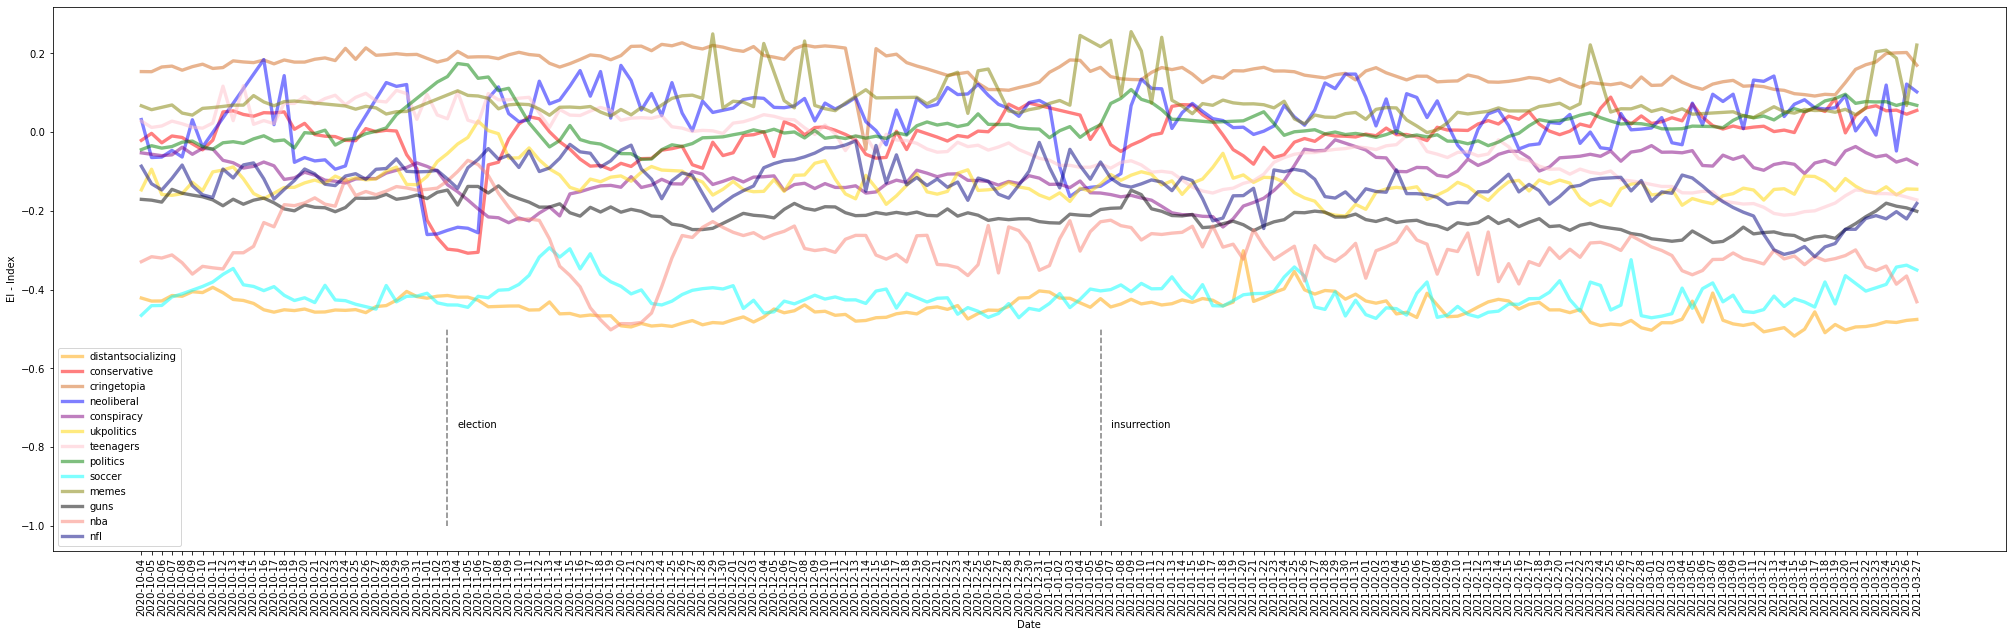

In [211]:
fig = plt.figure(figsize=(35,10))
plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)
# plt.plot(wallstreetbets_dt, wallstreetbets_ei, c='gold', lw=3.333, alpha=0.5, label='wallstreetbets')
# plt.plot(publicfreakout_dt, publicfreakout_ei, c='gold', lw=3.333, alpha=0.5, label='publicfreakout') 
# plt.plot(cryptocurrency_dt, cryptocurrency_ei, c='gold', lw=3.333, alpha=0.5, label='cryptocurrency') 
# plt.plot(dankmemes_dt, dankmemes_ei, c='blue', lw=3.333, alpha=0.5, label='dankmemes')
# plt.plot(askreddit_dt, askreddit_ei, c='blue', lw=3.333, alpha=0.5, label='askreddit')
# plt.plot(formula1_dt, formula1_ei, c='orange', lw=3.333, alpha=0.5, label='formula1')
# plt.plot(bitcoin_dt, bitcoin_ei, c='gold', lw=3.333, alpha=0.5, label='bitcoin') 
plt.plot(distantsocializing_dt, distantsocializing_ei, c='orange', lw=3.333, alpha=0.5, label='distantsocializing')
plt.plot(conservative_dt, conservative_ei, c='red', lw=3.333, alpha=0.5, label='conservative')
plt.plot(cringetopia_dt, cringetopia_ei, c='chocolate', lw=3.333, alpha=0.5, label='cringetopia')
plt.plot(neoliberal_dt, neoliberal_ei, c='blue', lw=3.333, alpha=0.5, label='neoliberal')
plt.plot(conspiracy_dt, conspiracy_ei, c='purple', lw=3.333, alpha=0.5, label='conspiracy')
plt.plot(ukpolitics_dt, ukpolitics_ei, c='gold', lw=3.333, alpha=0.5, label='ukpolitics')
plt.plot(teenagers_dt, teenagers_ei, c='pink', lw=3.333, alpha=0.5, label='teenagers')
plt.plot(politics_dt, politics_ei, c='green', lw=3.333, alpha=0.5, label='politics')
plt.plot(soccer_dt, soccer_ei, c='aqua', lw=3.333, alpha=0.5, label='soccer')
plt.plot(memes_dt, memes_ei, c='olive', lw=3.333, alpha=0.5, label='memes')
plt.plot(guns_dt, guns_ei, c='black', lw=3.333, alpha=0.5, label='guns')
plt.plot(nba_dt, nba_ei, c='salmon', lw=3.333, alpha=0.5, label='nba')
plt.plot(nfl_dt, nfl_ei, c='navy', lw=3.333, alpha=0.5, label='nfl')

plt.plot(['2020-11-03','2020-11-03'], [-1,-0.5], alpha=0.5, c='black', ls='--')
plt.plot(['2021-01-06','2021-01-06'], [-1,-0.5], alpha=0.5, c='black', ls='--')
plt.text('2021-01-07', -0.75, 'insurrection')
plt.text('2020-11-04', -0.75, 'election')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('EI - Index')
plt.legend()

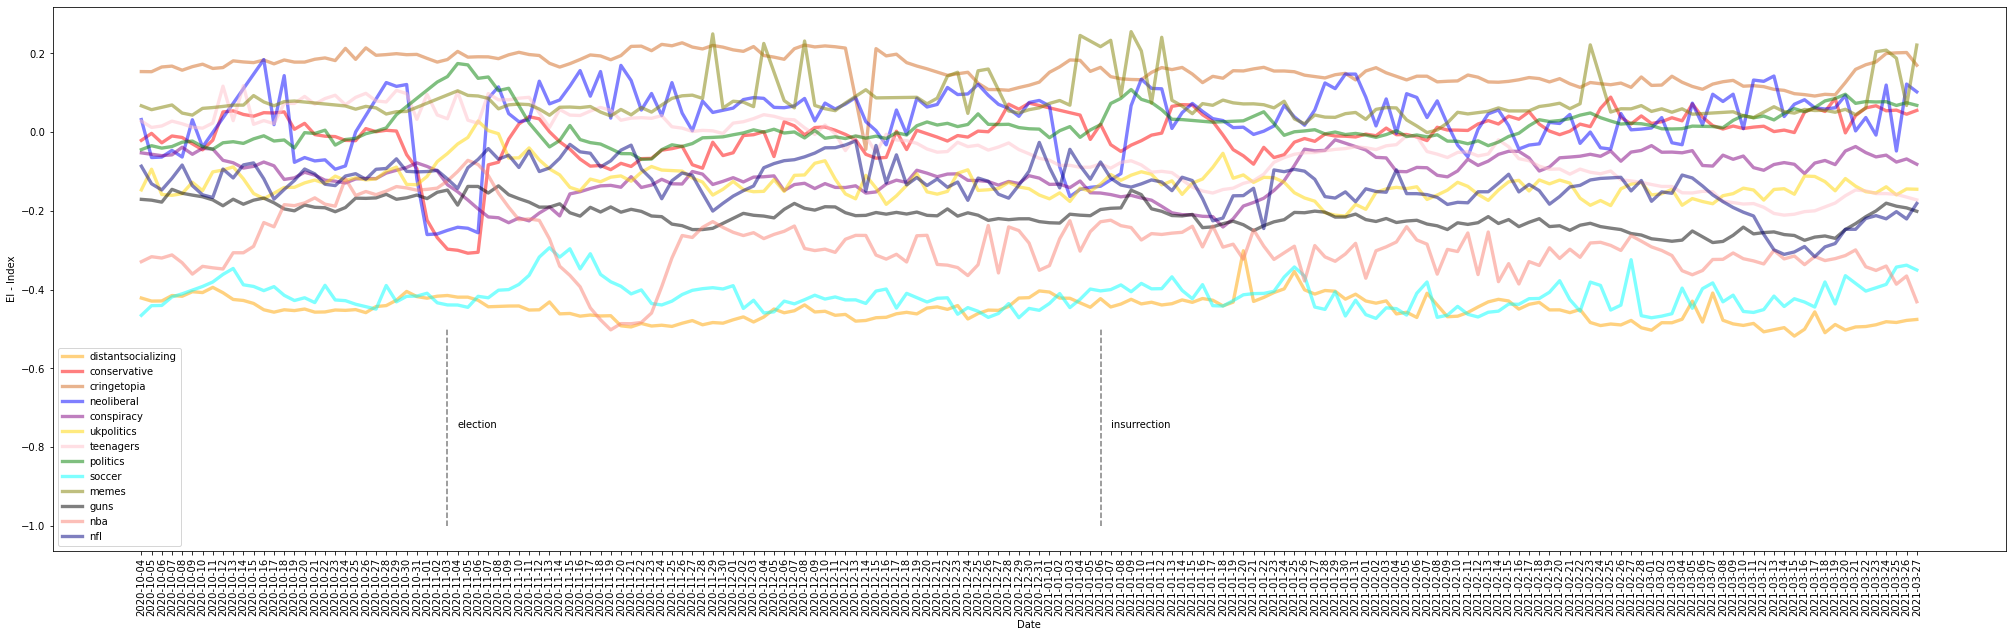

In [ ]:
fig = plt.figure(figsize=(35,10))
plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)
# plt.plot(wallstreetbets_dt, wallstreetbets_ei, c='gold', lw=3.333, alpha=0.5, label='wallstreetbets')
# plt.plot(publicfreakout_dt, publicfreakout_ei, c='gold', lw=3.333, alpha=0.5, label='publicfreakout') 
# plt.plot(cryptocurrency_dt, cryptocurrency_ei, c='gold', lw=3.333, alpha=0.5, label='cryptocurrency') 
# plt.plot(dankmemes_dt, dankmemes_ei, c='blue', lw=3.333, alpha=0.5, label='dankmemes')
# plt.plot(askreddit_dt, askreddit_ei, c='blue', lw=3.333, alpha=0.5, label='askreddit')
# plt.plot(formula1_dt, formula1_ei, c='orange', lw=3.333, alpha=0.5, label='formula1')
# plt.plot(bitcoin_dt, bitcoin_ei, c='gold', lw=3.333, alpha=0.5, label='bitcoin') 
plt.plot(distantsocializing_dt, distantsocializing_ei, c='orange', lw=3.333, alpha=0.5, label='distantsocializing')
plt.plot(conservative_dt, conservative_ei, c='red', lw=3.333, alpha=0.5, label='conservative')
plt.plot(cringetopia_dt, cringetopia_ei, c='chocolate', lw=3.333, alpha=0.5, label='cringetopia')
plt.plot(neoliberal_dt, neoliberal_ei, c='blue', lw=3.333, alpha=0.5, label='neoliberal')
plt.plot(conspiracy_dt, conspiracy_ei, c='purple', lw=3.333, alpha=0.5, label='conspiracy')
plt.plot(ukpolitics_dt, ukpolitics_ei, c='gold', lw=3.333, alpha=0.5, label='ukpolitics')
plt.plot(teenagers_dt, teenagers_ei, c='pink', lw=3.333, alpha=0.5, label='teenagers')
plt.plot(politics_dt, politics_ei, c='green', lw=3.333, alpha=0.5, label='politics')
plt.plot(soccer_dt, soccer_ei, c='aqua', lw=3.333, alpha=0.5, label='soccer')
plt.plot(memes_dt, memes_ei, c='olive', lw=3.333, alpha=0.5, label='memes')
plt.plot(guns_dt, guns_ei, c='black', lw=3.333, alpha=0.5, label='guns')
plt.plot(nba_dt, nba_ei, c='salmon', lw=3.333, alpha=0.5, label='nba')
plt.plot(nfl_dt, nfl_ei, c='navy', lw=3.333, alpha=0.5, label='nfl')

plt.plot(['2020-11-03','2020-11-03'], [-1,-0.5], alpha=0.5, c='black', ls='--')
plt.plot(['2021-01-06','2021-01-06'], [-1,-0.5], alpha=0.5, c='black', ls='--')
plt.text('2021-01-07', -0.75, 'insurrection')
plt.text('2020-11-04', -0.75, 'election')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('EI - Index')
plt.legend()

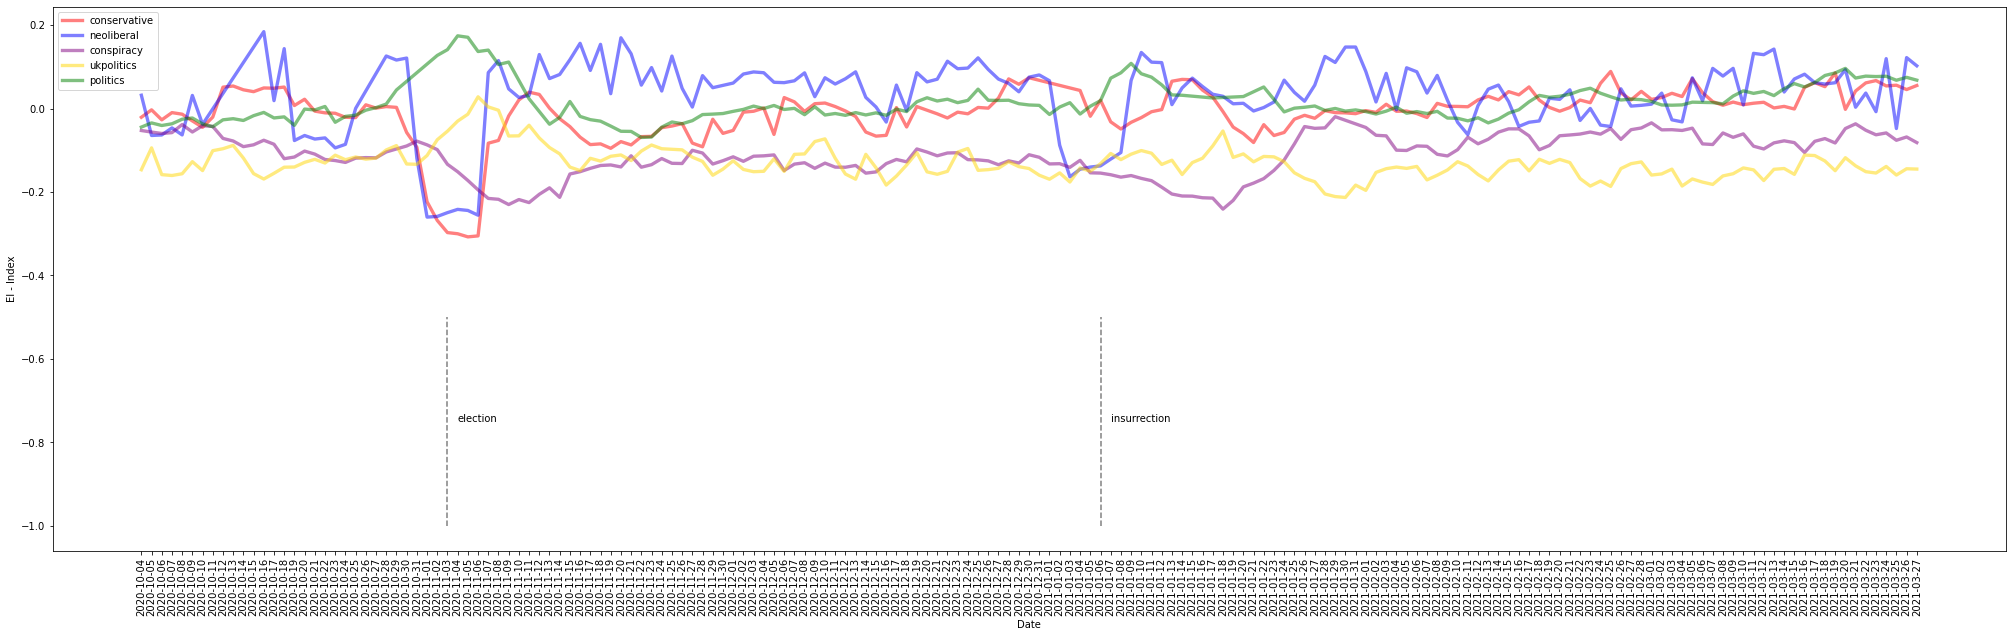

In [212]:
fig = plt.figure(figsize=(35,10))
plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)
plt.plot(conservative_dt, conservative_ei, c='red', lw=3.333, alpha=0.5, label='conservative')
plt.plot(neoliberal_dt, neoliberal_ei, c='blue', lw=3.333, alpha=0.5, label='neoliberal')
plt.plot(conspiracy_dt, conspiracy_ei, c='purple', lw=3.333, alpha=0.5, label='conspiracy')
plt.plot(ukpolitics_dt, ukpolitics_ei, c='gold', lw=3.333, alpha=0.5, label='ukpolitics')
plt.plot(politics_dt, politics_ei, c='green', lw=3.333, alpha=0.5, label='politics')

plt.plot(['2020-11-03','2020-11-03'], [-1,-0.5], alpha=0.5, c='black', ls='--')
plt.plot(['2021-01-06','2021-01-06'], [-1,-0.5], alpha=0.5, c='black', ls='--')
plt.text('2021-01-07', -0.75, 'insurrection')
plt.text('2020-11-04', -0.75, 'election')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('EI - Index')
plt.legend()